# Primary Sentiment Annotation

# Import existed dataset from Kaggle to validate model accuracy

## Dataset1

In [ ]:
import pandas as pd
import re

# Load the dataset
df_kaggle_train = pd.read_csv('/content/twitter_training.csv', encoding='ISO-8859-1', header=None)
df_kaggle_train.head()

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
df_kaggle_train.columns = ['id', 'entity', 'polarity', 'text']
df_kaggle_train.head()

,id,entity,polarity,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
df_kaggle_train.value_counts('polarity')

,count
polarity,
Negative,22542
Positive,20832
Neutral,18318
Irrelevant,12990


In [ ]:
df_kaggle_train['polarity'].replace({'Irrelevant': 'Neutral'}, inplace=True)

In [ ]:
df_kaggle_train.value_counts('polarity')

,count
polarity,
Neutral,31308
Negative,22542
Positive,20832


In [ ]:
import random
# Define a method to randomly sample one sentence from every 6-row group
def sample_sentences(data, group_size=6):
    sampled_data = []
    for i in range(0, len(data), group_size):
        group = data.iloc[i:i+group_size]
        sampled_row = group.sample(n=1, random_state=random.randint(0, 1000))
        sampled_data.append(sampled_row)
    return pd.concat(sampled_data).reset_index(drop=True)

kaggle_train_sample = sample_sentences(df_kaggle_train)

In [ ]:
kaggle_train_sample.value_counts('polarity')

,count
polarity,
Neutral,5218
Negative,3757
Positive,3472


In [ ]:
import pandas as pd
import re

df_kaggle_test = pd.read_csv('/content/twitter_validation.csv', encoding='ISO-8859-1', header=None)
df_kaggle_test.head()

,0,1,2,3
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [ ]:
df_kaggle_test.columns = ['id', 'entity', 'polarity', 'text']
df_kaggle_test.head()

,id,entity,polarity,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [ ]:
df_kaggle_test['polarity'].replace({'Irrelevant': 'Neutral'}, inplace=True)

In [ ]:
df_kaggle_test.value_counts('polarity')

,count
polarity,
Neutral,457
Positive,277
Negative,266


In [ ]:

!pip install contractions
import re
import string
import contractions
import nltk
import gensim
from gensim.utils import simple_preprocess
#import spacy
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 6.2 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
def clean_text_data_with_emoji(df, target_column):
    """
    Clean the text data in the specified column of the DataFrame.

    Parameters:
    df (pd.DataFrame): The input DataFrame containing the text data.
    target_column (str): The name of the column to clean.

    Returns:
    pd.DataFrame: The cleaned DataFrame with the specified column preprocessed.
    """

    # Drop data with missing values in the target column
    df = df.dropna(subset=[target_column])

    # Drop duplicate review content
    df = df.drop_duplicates(subset=[target_column])

    # Remove invalid encoded characters (such as “�”)
    df[target_column] = df[target_column].map(lambda x: re.sub(r'[�]', '', x))

    # Remove websites (URLs)
    df[target_column] = df[target_column].map(lambda x: re.sub(r'http://\S+|https://\S+', '', x))

    # Remove @ mentions
    df[target_column] = df[target_column].map(lambda x: re.sub(r'@\w+', '', x))

    # Remove hashtags
    df[target_column] = df[target_column].map(lambda x: re.sub(r'#\w+', '', x))

    # Remove extra spaces
    df[target_column] = df[target_column].map(lambda x: re.sub(r'\s{2,}', " ", x))

    return df

def clean_text_data_without_emoji(df, target_column):
    """
    Clean the text data in the specified column of the DataFrame.

    Parameters:
    df (pd.DataFrame): The input DataFrame containing the text data.
    target_column (str): The name of the column to clean.

    Returns:
    pd.DataFrame: The cleaned DataFrame with the specified column preprocessed.
    """

    # Drop data with missing values in the target column
    df = df.dropna(subset=[target_column])

    # Drop duplicate review content
    df = df.drop_duplicates(subset=[target_column])

    # Convert the relevant column to lowercase
    df[target_column] = df[target_column].str.lower()

    # Remove contractions
    df[target_column] = df[target_column].map(lambda x: contractions.fix(x))

    # Remove invalid encoded characters (such as “�”)
    df[target_column] = df[target_column].map(lambda x: re.sub(r'[�]', '', x))

    # Remove websites (URLs)
    df[target_column] = df[target_column].map(lambda x: re.sub(r'http://\S+|https://\S+', '', x))

    # Remove emojis
    emoj = re.compile("["
                      u"\U0001F600-\U0001F64F"  # emoticons
                      u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                      u"\U0001F680-\U0001F6FF"  # transport & map symbols
                      u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                      u"\U00002500-\U00002BEF"  # chinese char
                      u"\U00002702-\U000027B0"
                      u"\U000024C2-\U0001F251"
                      u"\U0001f926-\U0001f937"
                      u"\U00010000-\U0010ffff"
                      u"\u2640-\u2642"
                      u"\u2600-\u2B55"
                      u"\u200d"
                      u"\u23cf"
                      u"\u23e9"
                      u"\u231a"
                      u"\ufe0f"  # dingbats
                      u"\u3030"
                      "]+", re.UNICODE)
    df[target_column] = df[target_column].map(lambda x: re.sub(emoj, '', x))

    # Remove @ mentions
    df[target_column] = df[target_column].map(lambda x: re.sub(r'@\w+', '', x))

    # Remove hashtags
    df[target_column] = df[target_column].map(lambda x: re.sub(r'#\w+', '', x))

    # Remove non-word characters (e.g., numbers, special characters)
    df[target_column] = df[target_column].str.replace("[^A-Za-z]", " ", regex=True)

    # Remove extra spaces
    df[target_column] = df[target_column].map(lambda x: re.sub(r'\s{2,}', " ", x))

    # Replace 'ps' with 'playstation'
    df[target_column] = df[target_column].str.replace('ps', 'playstation')

    # Remove punctuation
    df[target_column] = df[target_column].map(lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x))

    return df

In [ ]:
cleaned_df_kaggle_train_with_emoji = clean_text_data_with_emoji(kaggle_train_sample, 'text')
cleaned_df_kaggle_test_with_emoji = clean_text_data_with_emoji(df_kaggle_test, 'text')
cleaned_df_kaggle_train = clean_text_data_without_emoji(kaggle_train_sample, 'text')
cleaned_df_kaggle_test = clean_text_data_without_emoji(df_kaggle_test, 'text')

In [ ]:
cleaned_df_kaggle_train_with_emoji.head()

,id,entity,polarity,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
2,2403,Borderlands,Neutral,"Rock-Hard La Varlope, RARE & POWERFUL, HANDSOM..."
3,2404,Borderlands,Positive,that was the first borderlands session in a lo...
4,2405,Borderlands,Negative,For the biggest male dissappoinment in my life...


In [ ]:
cleaned_df_kaggle_train.head()

,id,entity,polarity,text
0,2401,Borderlands,Positive,i am coming to the borders and i will kill you...
1,2402,Borderlands,Positive,so i spent a couple of hours doing something f...
2,2403,Borderlands,Neutral,rock hard la varlope rare powerful handsome ja...
3,2404,Borderlands,Positive,that was the first borderlands session in a lo...
4,2405,Borderlands,Negative,for the biggest male dissappoinment in my life...


In [ ]:
!pip install symspellpy
from symspellpy import SymSpell, Verbosity

# Initialize SymSpell object
sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)

# Load the dictionary file
dictionary_path = "/content/frequency_dictionary_en_82_765.txt"
sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)

# Optionally, you can load a bigram dictionary for phrase correction
bigram_path = "/content/frequency_bigramdictionary_en_243_342.txt"
sym_spell.load_bigram_dictionary(bigram_path, term_index=0, count_index=1)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 kB 1.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 23.1 MB/s eta 0:00:00
  Created wheel for editdistpy: filename=editdistpy-0.1.4-cp310-cp310-linux_x86_64.whl size=187477 sha256=bf323330464f787e1cad06e01120840dfdba321df654bd7f74b87ed01ee0089c
  Stored in directory: /root/.cache/pip/wheels/4c/0f/10/c20d67cd765ee5b3666d759a307241bba0663135d6ee1c0072
Successfully built editdistpy


True

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim.models.phrases import Phrases, Phraser
from nltk.stem import WordNetLemmatizer
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(df, target_column):
    # Step 1: Tokenize the words
    words = df[target_column].tolist()
    word_tokens = [word_tokenize(review) for review in words]

    # Step 2: Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatised = []
    for review in word_tokens:
        n_lemmatised = [lemmatizer.lemmatize(w) for w in review]
        v_lemmatised = [lemmatizer.lemmatize(w, 'v') for w in n_lemmatised]
        r_lemmatised = [lemmatizer.lemmatize(w, 'r') for w in v_lemmatised]
        a_lemmatised = [lemmatizer.lemmatize(w, 'a') for w in r_lemmatised]
        lemmatised.append(a_lemmatised)

    # Step 3: Remove stopwords
    stop_words = set(stopwords.words("english"))
    tokens_without_stopwords = [
        [w for w in review if w.lower() not in stop_words]
        for review in lemmatised
    ]

    # Step 4: Spell correction using SymSpell with both unigram and bigram dictionaries
    tokens_corrected = []
    for review in tokens_without_stopwords:
        corrected_review = []
        for word in review:
            suggestions = sym_spell.lookup(word, Verbosity.CLOSEST, max_edit_distance=2)
            corrected_word = suggestions[0].term if suggestions else word
            corrected_review.append(corrected_word)

        # Correct phrases using the bigram dictionary
        corrected_review = sym_spell.lookup_compound(" ".join(corrected_review), max_edit_distance=2)
        tokens_corrected.append(corrected_review[0].term.split())

    # Step 5: Create bigram and trigram models
    bigram = Phrases(tokens_corrected, min_count=3, threshold=10)
    trigram = Phrases(bigram[tokens_corrected], min_count=3, threshold=10)
    bigram_mod = Phraser(bigram)
    trigram_mod = Phraser(trigram)

    # Step 6: Form Bigrams and Trigrams
    tokens_with_bigrams = [bigram_mod[review] for review in tokens_corrected]
    tokens_with_trigrams = [trigram_mod[bigram_mod[review]] for review in tokens_corrected]

    # Step 7: Rejoin tokens into strings
    rejoin = []
    for review in tokens_with_trigrams:
        x = " ".join(review)  # Join tokens back into a single string
        x = x.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
        rejoin.append(x)

    # Step 8: Add the processed text back to the DataFrame
    df['filtered_text'] = rejoin

    return df


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
processed_kaggle_train = preprocess_text(cleaned_df_kaggle_train, 'text')
processed_kaggle_train.head()

,id,entity,polarity,text,filtered_text
0,2401,Borderlands,Positive,i am coming to the borders and i will kill you...,come border kill
1,2402,Borderlands,Positive,so i spent a few hours making something for fu...,spendhour make something fun know huge handler...
2,2403,Borderlands,Neutral,rock hard la varlope rare powerful handsome ja...,rock hard la marlowe rare powerful handsome ja...
3,2404,Borderlands,Positive,that i was the first real borderlands session ...,a first real borderland session nice long wait...
4,2405,Borderlands,Negative,for the biggest male dissappoinment in my life...,big male disappointment life comehang year tim...


In [ ]:
processed_kaggle_test = preprocess_text(cleaned_df_kaggle_test, 'text')
processed_kaggle_test.head()

,id,entity,polarity,text,filtered_text
0,3364,Facebook,Neutral,i mentioned on facebook that i was struggling ...,mention facebook a struggle motivation go run ...
1,352,Amazon,Neutral,bbc news amazon boss jeff bezos rejects claims...,bic news amazon box jeff bozos reject claim co...
2,8312,Microsoft,Negative,why do i pay for word when it functions so po...,pay word function poorly chrome book
3,4371,CS-GO,Negative,csgo matchmaking is so full of closet hacking ...,so matchmaking full closet hack truly awful game
4,4433,Google,Neutral,now the president is slapping americans in the...,president slap american face really commit unl...


## Dataset2

In [ ]:
import pandas as pd
import re

# Load the dataset
df_kaggle_train_2 = pd.read_csv('/content/Dataset - Train.csv')
df_kaggle_train_2.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [ ]:
df_kaggle_train_2.columns = ['text', 'entity', 'polarity']
df_kaggle_train_2.head()

,text,entity,polarity
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [ ]:
df_kaggle_train_2.value_counts('polarity')

,count
polarity,
No emotion toward brand or product,5389
Positive emotion,2672
Negative emotion,519
I can't tell,9


In [ ]:
df_kaggle_train_2['polarity'] = df_kaggle_train_2['polarity'].str.strip()

df_kaggle_train_2['polarity'].replace({
    'No emotion toward brand or product': 'Neutral',
    'Positive emotion': 'Positive',
    'Negative emotion': 'Negative',
    'I can\'t tell': 'Neutral'
}, inplace=True)


In [ ]:
df_kaggle_train_2.value_counts('polarity')

,count
polarity,
Neutral,5398
Positive,2672
Negative,519


In [ ]:
cleaned_df_kaggle_train_2_with_emoji = clean_text_data_with_emoji(df_kaggle_train_2, 'text')
cleaned_df_kaggle_train_2 = clean_text_data_without_emoji(df_kaggle_train_2, 'text')

In [ ]:
cleaned_df_kaggle_train_2_with_emoji.head()

,text,entity,polarity
0,. I have a 3G iPhone. After 3 hrs tweeting at ...,iPhone,Negative
1,Know about ? Awesome iPad/iPhone app that you...,iPad or iPhone App,Positive
2,Can not wait for 2 also. They should sale the...,iPad,Positive
3,I hope this year's festival isn't as crashy a...,iPad or iPhone App,Negative
4,"great stuff on Fri : Marissa Mayer (Google), ...",Google,Positive


In [ ]:
cleaned_df_kaggle_train_2.head()

,text,entity,polarity
0,i have a g iphone after hrs tweeting at it wa...,iPhone,Negative
1,know about awesome ipad iphone app that you w...,iPad or iPhone App,Positive
2,can not wait for also they should sale them d...,iPad,Positive
3,i hope this year s festival is not as crashy ...,iPad or iPhone App,Negative
4,great stuff on fri marissa mayer google tim o...,Google,Positive


In [ ]:
processed_kaggle_train_2 = preprocess_text(cleaned_df_kaggle_train_2, 'text')
processed_kaggle_train_2.head()

,text,entity,polarity,filtered_text
0,i have a g iphone after hrs tweeting at it wa...,iPhone,Negative,a iphone or tweet a dead needupgrade plugin st...
1,know about awesome ipad iphone app that you w...,iPad or iPhone App,Positive,know awesome ipad iphone app likely appreciate...
2,can not wait for also they should sale them d...,iPad,Positive,wait also sale
3,i hope this year s festival is not as crashy ...,iPad or iPhone App,Negative,hope year festival crash year iphone app
4,great stuff on fri marissa mayer google tim o...,Google,Positive,great stuff fri marissamayergoogle timreilly t...


## Concat the dataset

In [ ]:
cleaned_kaggle1 = pd.concat([cleaned_df_kaggle_train, cleaned_df_kaggle_test], ignore_index = True)
cleaned_kaggle1.head()

,id,entity,polarity,text,filtered_text
0,2401,Borderlands,Positive,i am coming to the borders and i will kill you...,come border kill
1,2402,Borderlands,Positive,so i spent a few hours making something for fu...,spendhour make something fun know huge handler...
2,2403,Borderlands,Neutral,rock hard la varlope rare powerful handsome ja...,rock hard la marlowe rare powerful handsome ja...
3,2404,Borderlands,Positive,that i was the first real borderlands session ...,a first real borderland session nice long wait...
4,2405,Borderlands,Negative,for the biggest male dissappoinment in my life...,big male disappointment life comehang year tim...


In [ ]:
processed_kaggle1 = pd.concat([processed_kaggle_train, processed_kaggle_test], ignore_index = True)
processed_kaggle1.head()

,id,entity,polarity,text,filtered_text
0,2401,Borderlands,Positive,i am coming to the borders and i will kill you...,come border kill
1,2402,Borderlands,Positive,so i spent a few hours making something for fu...,spendhour make something fun know huge handler...
2,2403,Borderlands,Neutral,rock hard la varlope rare powerful handsome ja...,rock hard la marlowe rare powerful handsome ja...
3,2404,Borderlands,Positive,that i was the first real borderlands session ...,a first real borderland session nice long wait...
4,2405,Borderlands,Negative,for the biggest male dissappoinment in my life...,big male disappointment life comehang year tim...


In [ ]:
processed_kaggle_combined = pd.concat([processed_kaggle1, processed_kaggle_train_2],ignore_index=True)

In [ ]:
cleaned_df_kaggle_train_sample = sample_sentences(cleaned_df_kaggle_train)
text_3 = cleaned_df_kaggle_train_sample[['text','polarity']]
text_4 = cleaned_df_kaggle_train_2[['text','polarity']]
cleaned_kaggle_combined = pd.concat([text_3, text_4],ignore_index=True)

### Preprocess for LSTM

In [ ]:
text_1 = df_kaggle_test[['text','polarity']]
text_2 = df_kaggle_train_2[['text','polarity']]
kaggle_combined = pd.concat([text_1, text_2],ignore_index=True)
kaggle_combined.head()

,text,polarity
0,I mentioned on Facebook that I was struggling ...,Neutral
1,BBC News - Amazon boss Jeff Bezos rejects clai...,Neutral
2,@Microsoft Why do I pay for WORD when it funct...,Negative
3,"CSGO matchmaking is so full of closet hacking,...",Negative
4,Now the President is slapping Americans in the...,Neutral


In [ ]:
import re
import pandas as pd
from nltk.corpus import stopwords

def preprocess_for_lstm(df, target_column):
    """
    Preprocess text data for LSTM model, including removing stopwords.

    Parameters:
    df (pd.DataFrame): The input DataFrame containing the text data.
    target_column (str): The name of the column to clean.

    Returns:
    pd.DataFrame: The preprocessed DataFrame with the specified column.
    """

    # Drop data with missing values in the target column
    df = df.dropna(subset=[target_column])

    # Drop duplicate review content
    df = df.drop_duplicates(subset=[target_column])

    # Convert the relevant column to lowercase
    df[target_column] = df[target_column].str.lower()

    # Remove URLs
    df[target_column] = df[target_column].map(lambda x: re.sub(r'http://\S+|https://\S+', '', x))

    # Remove @ mentions and hashtags
    df[target_column] = df[target_column].map(lambda x: re.sub(r'@\w+|#\w+', '', x))

    # Remove invalid encoded characters
    df[target_column] = df[target_column].map(lambda x: re.sub(r'[�]', '', x))

    # Remove extra spaces
    df[target_column] = df[target_column].map(lambda x: re.sub(r'\s{2,}', " ", x))

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    df[target_column] = df[target_column].apply(
        lambda x: ' '.join([word for word in x.split() if word not in stop_words])
    )

    return df


In [ ]:
cleaned_kaggle_combined = preprocess_for_lstm(kaggle_combined, 'text')
cleaned_kaggle_combined.head()

,text,polarity
0,mentioned facebook struggling motivation go ru...,Neutral
1,bbc news - amazon boss jeff bezos rejects clai...,Neutral
2,pay word functions poorly chromebook? ð,Negative
3,"csgo matchmaking full closet hacking, truly aw...",Negative
4,president slapping americans face really commi...,Neutral


# Validate TextBlob, VADER, Transformer, SVM

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

## Textblob

In [ ]:
target_column = 'filtered_text'

In [ ]:
from textblob import TextBlob
import numpy as np
processed_kaggle_combined['TextBlob_Polarity'] = processed_kaggle_combined[target_column].apply(lambda review: TextBlob(str(review)).sentiment.polarity)
processed_kaggle_combined['TextBlob_Sentiment'] = np.where(processed_kaggle_combined['TextBlob_Polarity']>=0.05, 'Positive',np.where(processed_kaggle_combined['TextBlob_Polarity']<=-0.05,'Negative', 'Neutral'))

In [ ]:
accuracy = accuracy_score(processed_kaggle_combined['polarity'], processed_kaggle_combined['TextBlob_Sentiment'])
print(f"Validation Accuracy: {accuracy:.2%}")
report = classification_report(processed_kaggle_combined['polarity'], processed_kaggle_combined['TextBlob_Sentiment'])
print(report)

Validation Accuracy: 49.34%
              precision    recall  f1-score   support

    Negative       0.41      0.40      0.41      4430
     Neutral       0.59      0.51      0.55     10876
    Positive       0.42      0.53      0.47      6289

    accuracy                           0.49     21595
   macro avg       0.48      0.48      0.47     21595
weighted avg       0.50      0.49      0.50     21595



In [ ]:
processed_kaggle_train_2['TextBlob_Polarity'] = processed_kaggle_train_2[target_column].apply(lambda review: TextBlob(str(review)).sentiment.polarity)
processed_kaggle_train_2['TextBlob_Sentiment'] = np.where(processed_kaggle_train_2['TextBlob_Polarity']>=0.05, 'Positive',np.where(processed_kaggle_train_2['TextBlob_Polarity']<=-0.05,'Negative', 'Neutral'))

In [ ]:
accuracy_2 = accuracy_score(processed_kaggle_train_2['polarity'], processed_kaggle_train_2['TextBlob_Sentiment'])
print(f"Validation Accuracy: {accuracy_2:.2%}")
report_2 = classification_report(processed_kaggle_train_2['polarity'], processed_kaggle_train_2['TextBlob_Sentiment'])
print(report_2)

Validation Accuracy: 58.37%
              precision    recall  f1-score   support

    Negative       0.15      0.21      0.18       518
     Neutral       0.72      0.66      0.69      5381
    Positive       0.46      0.50      0.48      2662

    accuracy                           0.58      8561
   macro avg       0.44      0.46      0.45      8561
weighted avg       0.60      0.58      0.59      8561



poor performance, try VADER

## VADER

In [ ]:
import numpy as np
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
Result = { 'compound':[], 'pos':[] , 'neu':[], 'neg':[] }
target_column_1 = 'text'
for review in cleaned_df_kaggle_test_with_emoji[target_column_1]:
    score = sid.polarity_scores(review)
    Result['pos'].append(score['pos'])
    Result['neu'].append(score['neu'])
    Result['neg'].append(score['neg'])
    Result['compound'].append(score['compound'])

In [ ]:
cleaned_df_kaggle_test_with_emoji['compound'] = pd.DataFrame(Result)['compound']
cleaned_df_kaggle_test_with_emoji['VADER_Sentiment'] = np.where(pd.DataFrame(Result)['compound']>=0.05, 'Positive',np.where(pd.DataFrame(Result)['compound']<=-0.05,'Negative', 'Neutral'))

In [ ]:
accuracy_3 = accuracy_score(cleaned_df_kaggle_test_with_emoji['polarity'], cleaned_df_kaggle_test_with_emoji['VADER_Sentiment'])
print(f"Validation Accuracy: {accuracy_3:.2%}")
report_3 = classification_report(cleaned_df_kaggle_test_with_emoji['polarity'], cleaned_df_kaggle_test_with_emoji['VADER_Sentiment'])
print(report_3)

Validation Accuracy: 40.94%
              precision    recall  f1-score   support

    Negative       0.39      0.58      0.47       266
     Neutral       0.47      0.13      0.21       457
    Positive       0.41      0.70      0.52       276

    accuracy                           0.41       999
   macro avg       0.42      0.47      0.40       999
weighted avg       0.43      0.41      0.36       999



In [ ]:
Result_2 = { 'compound':[], 'pos':[] , 'neu':[], 'neg':[] }
target_column_2 = 'filtered_text'
for review in processed_kaggle_test[target_column_2]:
    score = sid.polarity_scores(review)
    Result_2['pos'].append(score['pos'])
    Result_2['neu'].append(score['neu'])
    Result_2['neg'].append(score['neg'])
    Result_2['compound'].append(score['compound'])

In [ ]:
processed_kaggle_test['compound'] = pd.DataFrame(Result_2)['compound']
processed_kaggle_test['VADER_Sentiment'] = np.where(pd.DataFrame(Result_2)['compound']>=0.05, 'Positive',np.where(pd.DataFrame(Result_2)['compound']<=-0.05,'Negative', 'Neutral'))

In [ ]:
accuracy_4 = accuracy_score(processed_kaggle_test['polarity'], processed_kaggle_test['VADER_Sentiment'])
print(f"Validation Accuracy: {accuracy_4:.2%}")
report_4 = classification_report(processed_kaggle_test['polarity'], processed_kaggle_test['VADER_Sentiment'])
print(report_4)

Validation Accuracy: 41.74%
              precision    recall  f1-score   support

    Negative       0.41      0.57      0.47       266
     Neutral       0.51      0.16      0.24       457
    Positive       0.40      0.71      0.51       276

    accuracy                           0.42       999
   macro avg       0.44      0.48      0.41       999
weighted avg       0.45      0.42      0.38       999



In [ ]:
Result_3 = { 'compound':[], 'pos':[] , 'neu':[], 'neg':[] }

for review in cleaned_df_kaggle_train_2_with_emoji[target_column_1]:
    score = sid.polarity_scores(review)
    Result_3['pos'].append(score['pos'])
    Result_3['neu'].append(score['neu'])
    Result_3['neg'].append(score['neg'])
    Result_3['compound'].append(score['compound'])

In [ ]:
cleaned_df_kaggle_train_2_with_emoji['compound'] = pd.DataFrame(Result_3)['compound']
cleaned_df_kaggle_train_2_with_emoji['VADER_Sentiment'] = np.where(pd.DataFrame(Result_3)['compound']>=0.05, 'Positive',np.where(pd.DataFrame(Result_3)['compound']<=-0.05,'Negative', 'Neutral'))

In [ ]:
accuracy_5 = accuracy_score(cleaned_df_kaggle_train_2_with_emoji['polarity'], cleaned_df_kaggle_train_2_with_emoji['VADER_Sentiment'])
print(f"Validation Accuracy: {accuracy_5:.2%}")
report_5 = classification_report(cleaned_df_kaggle_train_2_with_emoji['polarity'], cleaned_df_kaggle_train_2_with_emoji['VADER_Sentiment'])
print(report_5)

Validation Accuracy: 53.79%
              precision    recall  f1-score   support

    Negative       0.19      0.40      0.26       518
     Neutral       0.75      0.51      0.61      5381
    Positive       0.43      0.61      0.51      2662

    accuracy                           0.54      8561
   macro avg       0.46      0.51      0.46      8561
weighted avg       0.61      0.54      0.56      8561



In [ ]:
Result_4 = { 'compound':[], 'pos':[] , 'neu':[], 'neg':[] }

for review in processed_kaggle_train_2[target_column_2]:
    score = sid.polarity_scores(review)
    Result_4['pos'].append(score['pos'])
    Result_4['neu'].append(score['neu'])
    Result_4['neg'].append(score['neg'])
    Result_4['compound'].append(score['compound'])

In [ ]:
processed_kaggle_train_2['compound'] = pd.DataFrame(Result_4)['compound']
processed_kaggle_train_2['VADER_Sentiment'] = np.where(pd.DataFrame(Result_4)['compound']>=0.05, 'Positive',np.where(pd.DataFrame(Result_4)['compound']<=-0.05,'Negative', 'Neutral'))

In [ ]:
accuracy_6 = accuracy_score(processed_kaggle_train_2['polarity'], processed_kaggle_train_2['VADER_Sentiment'])
print(f"Validation Accuracy: {accuracy_6:.2%}")
report_6 = classification_report(processed_kaggle_train_2['polarity'], processed_kaggle_train_2['VADER_Sentiment'])
print(report_6)

Validation Accuracy: 56.38%
              precision    recall  f1-score   support

    Negative       0.19      0.33      0.24       518
     Neutral       0.73      0.59      0.65      5381
    Positive       0.44      0.56      0.49      2662

    accuracy                           0.56      8561
   macro avg       0.46      0.49      0.46      8561
weighted avg       0.61      0.56      0.58      8561



VADER performs better than TextBlob.

## SVM

In [ ]:
# Import necessary libraries and packages
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report
from tqdm import tqdm  # For displaying progress bars
import time
import pandas as pd

# Define the SVM pipeline with TF-IDF vectorizer, feature scaler, and SVM classifier
SVM_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),          # Convert text data into TF-IDF features
    ('scaler', StandardScaler(with_mean=False)),  # Scale features (important for SVM)
    ('svm', SVC())                         # SVM classifier
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'tfidf__max_features': [3000, 4000, 5000],  # Number of max features to consider in TF-IDF
    'svm__C': [0.1, 1, 10],                    # Regularization parameter for SVM
    'svm__gamma': ['scale'],                   # Kernel coefficient for SVM
    'svm__kernel': ['rbf']                     # Kernel type to be used in SVM
}

# Initialize K-Fold cross-validation with 10 splits
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# List to hold the best models for each dataset
models = []

# Assuming you have two datasets: processed_kaggle1 and processed_kaggle_train_2
datasets = [processed_kaggle1, processed_kaggle_train_2]

# Iterate over each dataset with a progress bar
for i, dataset in enumerate(tqdm(datasets, desc="Training on datasets")):
    start_time = time.time()

    # Separate features and target variable
    X = dataset['filtered_text']
    y = dataset['polarity']

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Perform grid search with cross-validation on the current dataset
    grid_search = GridSearchCV(SVM_pipeline, param_grid, cv=kf, n_jobs=-1, verbose=1, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Append the best model to the models list
    models.append(('svm_' + str(i), grid_search.best_estimator_))

    # Calculate elapsed time for this dataset
    elapsed_time = time.time() - start_time
    print(f"Dataset {i+1}: Completed in {elapsed_time:.2f} seconds")
    print(f"Dataset {i+1}: Best Parameters = {grid_search.best_params_}")

# Create a VotingClassifier using the best models from each dataset
ensemble_model = VotingClassifier(estimators=models, voting='hard')

# Train the ensemble model on the combined training set
ensemble_model.fit(X_train, y_train)

# Predict on the test set using the ensemble model
y_test_pred = ensemble_model.predict(X_test)

# Print the classification report for the ensemble model
print(classification_report(y_test, y_test_pred))


Training on datasets:   0%|          | 0/2 [00:00<?, ?it/s]

Fitting 10 folds for each of 9 candidates, totalling 90 fits


Training on datasets:  50%|█████     | 1/2 [21:20<21:20, 1280.44s/it]

Dataset 1: Completed in 1280.43 seconds
Dataset 1: Best Parameters = {'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'rbf', 'tfidf__max_features': 3000}
Fitting 10 folds for each of 9 candidates, totalling 90 fits


Training on datasets: 100%|██████████| 2/2 [29:32<00:00, 886.21s/it]

Dataset 2: Completed in 491.97 seconds
Dataset 2: Best Parameters = {'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'rbf', 'tfidf__max_features': 3000}


              precision    recall  f1-score   support

    Negative       0.91      0.10      0.18       100
     Neutral       0.71      0.94      0.81      1077
    Positive       0.74      0.38      0.50       536

    accuracy                           0.71      1713
   macro avg       0.78      0.47      0.49      1713
weighted avg       0.73      0.71      0.67      1713



In [ ]:
# Import necessary libraries and packages
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report
from tqdm import tqdm  # For displaying progress bars
import time
import pandas as pd

# Define the SVM pipeline with TF-IDF vectorizer, feature scaler, and SVM classifier
SVM_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),          # Convert text data into TF-IDF features
    ('scaler', StandardScaler(with_mean=False)),  # Scale features (important for SVM)
    ('svm', SVC(class_weight='balanced'))                         # SVM classifier
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'tfidf__max_features': [2000, 3000, 4000, 5000],  # Number of max features to consider in TF-IDF
    'svm__C': [0.1, 1, 10],                    # Regularization parameter for SVM
    'svm__gamma': ['scale'],                   # Kernel coefficient for SVM
    'svm__kernel': ['rbf']                     # Kernel type to be used in SVM
}

# Initialize K-Fold cross-validation with 10 splits
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# List to hold the best models for each dataset
models = []

# Assuming you have two datasets: processed_kaggle1 and processed_kaggle_train_2
datasets = [processed_kaggle1, processed_kaggle_train_2]

# Iterate over each dataset with a progress bar
for i, dataset in enumerate(tqdm(datasets, desc="Training on datasets")):
    start_time = time.time()

    # Separate features and target variable
    X = dataset['filtered_text']
    y = dataset['polarity']

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Perform grid search with cross-validation on the current dataset
    grid_search = GridSearchCV(SVM_pipeline, param_grid, cv=kf, n_jobs=-1, verbose=1, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Append the best model to the models list
    models.append(('svm_' + str(i), grid_search.best_estimator_))

    # Calculate elapsed time for this dataset
    elapsed_time = time.time() - start_time
    print(f"Dataset {i+1}: Completed in {elapsed_time:.2f} seconds")
    print(f"Dataset {i+1}: Best Parameters = {grid_search.best_params_}")

# Create a VotingClassifier using the best models from each dataset
ensemble_model = VotingClassifier(estimators=models, voting='hard')

# Train the ensemble model on the combined training set
ensemble_model.fit(X_train, y_train)

# Predict on the test set using the ensemble model
y_test_pred = ensemble_model.predict(X_test)

# Print the classification report for the ensemble model
print(classification_report(y_test, y_test_pred))


Training on datasets:   0%|          | 0/2 [00:00<?, ?it/s]

Fitting 10 folds for each of 12 candidates, totalling 120 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
Training on datasets:  50%|█████     | 1/2 [28:46<28:46, 1726.70s/it]

Dataset 1: Completed in 1726.70 seconds
Dataset 1: Best Parameters = {'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'rbf', 'tfidf__max_features': 2000}
Fitting 10 folds for each of 12 candidates, totalling 120 fits


Training on datasets: 100%|██████████| 2/2 [40:44<00:00, 1222.15s/it]

Dataset 2: Completed in 717.59 seconds
Dataset 2: Best Parameters = {'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'rbf', 'tfidf__max_features': 5000}


              precision    recall  f1-score   support

    Negative       0.36      0.39      0.37       100
     Neutral       0.74      0.82      0.78      1077
    Positive       0.62      0.49      0.55       536

    accuracy                           0.69      1713
   macro avg       0.57      0.56      0.57      1713
weighted avg       0.68      0.69      0.68      1713



Training on datasets:   0%|          | 0/2 [00:00<?, ?it/s]

Fitting 10 folds for each of 4 candidates, totalling 40 fits


Training on datasets:  50%|█████     | 1/2 [48:01<48:01, 2881.19s/it]

Dataset 1: Completed in 2881.19 seconds
Dataset 1: Best Parameters = {'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'rbf', 'tfidf__max_features': 3000}
Fitting 10 folds for each of 4 candidates, totalling 40 fits


Training on datasets: 100%|██████████| 2/2 [1:06:26<00:00, 1993.20s/it]

Dataset 2: Completed in 1105.20 seconds
Dataset 2: Best Parameters = {'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'rbf', 'tfidf__max_features': 5000}


              precision    recall  f1-score   support

    Negative       0.60      0.31      0.41       100
     Neutral       0.72      0.87      0.79      1077
    Positive       0.65      0.44      0.52       536

    accuracy                           0.70      1713
   macro avg       0.66      0.54      0.57      1713
weighted avg       0.69      0.70      0.68      1713



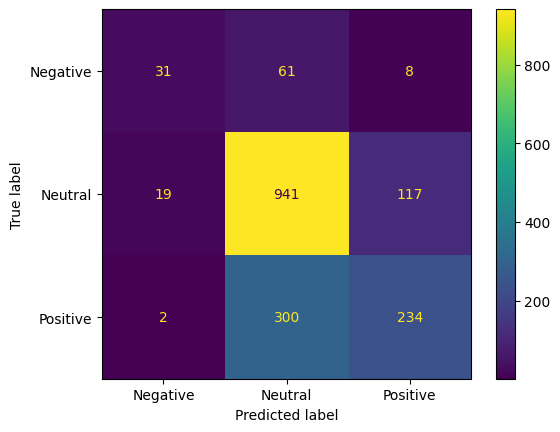

In [ ]:
# Import necessary libraries and packages
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tqdm import tqdm  # For displaying progress bars
import time
import pandas as pd

# Define the SVM pipeline with TF-IDF vectorizer, feature scaler, and SVM classifier with probability estimation
SVM_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Use n-grams and remove stop words
    ('scaler', StandardScaler(with_mean=False)),  # Scale features (important for SVM)
    ('svm', SVC(class_weight='balanced', probability=True))  # SVM classifier with balanced class weights and probability estimation
])

# Define the extended parameter grid for GridSearchCV
param_grid = {
    'tfidf__max_features': [2000, 3000, 4000, 5000],  # Explore a wider range of features
    'svm__C': [1],                      # Expand C values
    'svm__gamma': ['scale'],          # Include more gamma values
    'svm__kernel': ['rbf']               # Try other kernels
}

# Initialize K-Fold cross-validation with 10 splits
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# List to hold the best models for each dataset
models = []

# Assuming you have two datasets: processed_kaggle1 and processed_kaggle_train_2
datasets = [processed_kaggle1, processed_kaggle_train_2]

# Iterate over each dataset with a progress bar
for i, dataset in enumerate(tqdm(datasets, desc="Training on datasets")):
    start_time = time.time()

    # Separate features and target variable
    X = dataset['filtered_text']
    y = dataset['polarity']

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Perform grid search with cross-validation on the current dataset
    grid_search = GridSearchCV(SVM_pipeline, param_grid, cv=kf, n_jobs=-1, verbose=1, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Append the best model to the models list
    models.append(('svm_' + str(i), grid_search.best_estimator_))

    # Calculate elapsed time for this dataset
    elapsed_time = time.time() - start_time
    print(f"Dataset {i+1}: Completed in {elapsed_time:.2f} seconds")
    print(f"Dataset {i+1}: Best Parameters = {grid_search.best_params_}")

# Create a VotingClassifier using the best models from each dataset with soft voting
ensemble_model = VotingClassifier(estimators=models, voting='soft')

# Train the ensemble model on the combined training set
ensemble_model.fit(X_train, y_train)

# Predict on the test set using the ensemble model
y_test_pred = ensemble_model.predict(X_test)

# Print the classification report for the ensemble model
print(classification_report(y_test, y_test_pred))

# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Neutral', 'Positive'])
disp.plot()


In [ ]:
df_ps = pd.read_csv('/content/dataset_reddit-scraper-lite-task_2024-08-26_07-52-20-549.csv')
df_ps.head()

,body,category,communityName,createdAt,dataType,flair,html,id,isAd,isVideo,...,parsedId,postId,scrapedAt,thumbnailUrl,title,upVoteRatio,upVotes,url,userId,username
0,So I had this epiphany the other day playing B...,NaN,r/PS5,2022-12-30T05:48:41.000Z,post,Discussion,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",t3_zysi03,False,False,...,zysi03,NaN,2024-08-26T07:49:47.105Z,self,The PS5 is the first console since PS2 that fe...,0.75,3560,https://www.reddit.com/r/PS5/comments/zysi03/t...,t2_6okblemr,MomentHead
1,I agree with you in principle but I think your...,PS5,r/PS5,2022-12-30T11:55:25.000Z,comment,NaN,"&lt;div class=""md""&gt;&lt;p&gt;I agree with yo...",t1_j28geqi,NaN,NaN,...,t1_j28geqi,t3_zysi03,2024-08-26T07:49:55.352Z,NaN,NaN,NaN,2003,https://www.reddit.com/r/PS5/comments/zysi03/t...,t2_ekccm,hoochiscrazy_
2,I agree with you in principle but I think your...,PS5,r/PS5,2022-12-30T11:55:25.000Z,comment,NaN,"&lt;div class=""md""&gt;&lt;p&gt;I agree with yo...",t1_j28geqi,NaN,NaN,...,t1_j28geqi,t3_zysi03,2024-08-26T07:49:50.751Z,NaN,NaN,NaN,2005,https://www.reddit.com/r/PS5/comments/zysi03/t...,t2_ekccm,hoochiscrazy_
3,And don't forget an actual UI for doing stuff ...,PS5,r/PS5,2022-12-30T13:36:21.000Z,comment,NaN,"&lt;div class=""md""&gt;&lt;p&gt;And don&amp;#39...",t1_j28q47t,NaN,NaN,...,t1_j28q47t,t3_zysi03,2024-08-26T07:49:55.352Z,NaN,NaN,NaN,679,https://www.reddit.com/r/PS5/comments/zysi03/t...,t2_4bl7afza,xBesto
4,I agree with you in principle but I think your...,PS5,r/PS5,2022-12-30T11:55:25.000Z,comment,NaN,"&lt;div class=""md""&gt;&lt;p&gt;I agree with yo...",t1_j28geqi,NaN,NaN,...,t1_j28geqi,t3_zysi03,2024-08-26T07:49:47.137Z,NaN,NaN,NaN,1998,https://www.reddit.com/r/PS5/comments/zysi03/t...,t2_ekccm,hoochiscrazy_


In [ ]:
df_ps_selected = df_ps[['body', 'createdAt', 'url']]
df_ps_selected

,body,createdAt,url
0,So I had this epiphany the other day playing B...,2022-12-30T05:48:41.000Z,https://www.reddit.com/r/PS5/comments/zysi03/t...
1,I agree with you in principle but I think your...,2022-12-30T11:55:25.000Z,https://www.reddit.com/r/PS5/comments/zysi03/t...
2,I agree with you in principle but I think your...,2022-12-30T11:55:25.000Z,https://www.reddit.com/r/PS5/comments/zysi03/t...
3,And don't forget an actual UI for doing stuff ...,2022-12-30T13:36:21.000Z,https://www.reddit.com/r/PS5/comments/zysi03/t...
4,I agree with you in principle but I think your...,2022-12-30T11:55:25.000Z,https://www.reddit.com/r/PS5/comments/zysi03/t...
...,...,...,...
2000,For me it’s the loading times. Playing death s...,2022-12-30T08:47:29.000Z,https://www.reddit.com/r/PS5/comments/zysi03/t...
2001,I truly.miss the ps3's multimedia capabilities...,2022-12-30T17:32:11.000Z,https://www.reddit.com/r/PS5/comments/zysi03/t...
2002,Yea true ! The first time I’m enjoying witcher...,2022-12-30T13:56:22.000Z,https://www.reddit.com/r/PS5/comments/zysi03/t...
2003,I agree. Playing on my ps2 requires much more ...,2022-12-30T18:25:07.000Z,https://www.reddit.com/r/PS5/comments/zysi03/t...


In [ ]:
df_ps_cleaned = clean_text_data_without_emoji(df_ps_selected, 'body')
df_ps_cleaned

,body,createdAt,url
0,so i had this epiphany the other day playing b...,2022-12-30T05:48:41.000Z,https://www.reddit.com/r/PS5/comments/zysi03/t...
1,i agree with you in principle but i think your...,2022-12-30T11:55:25.000Z,https://www.reddit.com/r/PS5/comments/zysi03/t...
3,and do not forget an actual ui for doing stuff...,2022-12-30T13:36:21.000Z,https://www.reddit.com/r/PS5/comments/zysi03/t...
7,was big into torrenting movies back then being...,2022-12-30T13:52:23.000Z,https://www.reddit.com/r/PS5/comments/zysi03/t...
10,same here,2022-12-30T13:56:50.000Z,https://www.reddit.com/r/PS5/comments/zysi03/t...
...,...,...,...
638,your pc cannot play a game browse the web and ...,2022-12-30T14:10:53.000Z,https://www.reddit.com/r/PS5/comments/zysi03/t...
641,you need to upgrade your pc,2022-12-30T06:58:59.000Z,https://www.reddit.com/r/PS5/comments/zysi03/t...
647,i do not know all that feel next gen about the...,2022-12-30T07:54:46.000Z,https://www.reddit.com/r/PS5/comments/zysi03/t...
651,i have to admit that i enjoy the gap between p...,2022-12-30T11:52:02.000Z,https://www.reddit.com/r/PS5/comments/zysi03/t...


In [ ]:
df_ps_processed = preprocess_text(df_ps_cleaned, 'body')
df_ps_processed

,body,createdAt,url,filtered_text
0,so i had this epiphany the other day playing b...,2022-12-30T05:48:41.000Z,https://www.reddit.com/r/PS5/comments/zysi03/t...,epiphany day play bio mutant game a get butter...
1,i agree with you in principle but i think your...,2022-12-30T11:55:25.000Z,https://www.reddit.com/r/PS5/comments/zysi03/t...,agree principle think point apply playstation ...
3,and do not forget an actual ui for doing stuff...,2022-12-30T13:36:21.000Z,https://www.reddit.com/r/PS5/comments/zysi03/t...,forget actual i stuff besides look memory card...
7,was big into torrenting movies back then being...,2022-12-30T13:52:23.000Z,https://www.reddit.com/r/PS5/comments/zysi03/t...,a big tormenting movie back able play memory s...
10,same here,2022-12-30T13:56:50.000Z,https://www.reddit.com/r/PS5/comments/zysi03/t...,
...,...,...,...,...
638,your pc cannot play a game browse the web and ...,2022-12-30T14:10:53.000Z,https://www.reddit.com/r/PS5/comments/zysi03/t...,pc play game browse web watch show
641,you need to upgrade your pc,2022-12-30T06:58:59.000Z,https://www.reddit.com/r/PS5/comments/zysi03/t...,need upgrade pc
647,i do not know all that feel next gen about the...,2022-12-30T07:54:46.000Z,https://www.reddit.com/r/PS5/comments/zysi03/t...,know feel nextgen generation controller
651,i have to admit that i enjoy the gap between p...,2022-12-30T11:52:02.000Z,https://www.reddit.com/r/PS5/comments/zysi03/t...,admit enjoy gap playstation playstation way on...


In [ ]:
X_ps = df_ps_processed['filtered_text']
y_ps_pred = ensemble_model.predict(X_ps)
df_ps_processed['predicted_polarity'] = y_ps_pred
df_ps_processed

,body,createdAt,url,filtered_text,predicted_polarity
0,so i had this epiphany the other day playing b...,2022-12-30T05:48:41.000Z,https://www.reddit.com/r/PS5/comments/zysi03/t...,epiphany day play bio mutant game a get butter...,Neutral
1,i agree with you in principle but i think your...,2022-12-30T11:55:25.000Z,https://www.reddit.com/r/PS5/comments/zysi03/t...,agree principle think point apply playstation ...,Neutral
3,and do not forget an actual ui for doing stuff...,2022-12-30T13:36:21.000Z,https://www.reddit.com/r/PS5/comments/zysi03/t...,forget actual i stuff besides look memory card...,Neutral
7,was big into torrenting movies back then being...,2022-12-30T13:52:23.000Z,https://www.reddit.com/r/PS5/comments/zysi03/t...,a big tormenting movie back able play memory s...,Neutral
10,same here,2022-12-30T13:56:50.000Z,https://www.reddit.com/r/PS5/comments/zysi03/t...,,Neutral
...,...,...,...,...,...
638,your pc cannot play a game browse the web and ...,2022-12-30T14:10:53.000Z,https://www.reddit.com/r/PS5/comments/zysi03/t...,pc play game browse web watch show,Neutral
641,you need to upgrade your pc,2022-12-30T06:58:59.000Z,https://www.reddit.com/r/PS5/comments/zysi03/t...,need upgrade pc,Neutral
647,i do not know all that feel next gen about the...,2022-12-30T07:54:46.000Z,https://www.reddit.com/r/PS5/comments/zysi03/t...,know feel nextgen generation controller,Neutral
651,i have to admit that i enjoy the gap between p...,2022-12-30T11:52:02.000Z,https://www.reddit.com/r/PS5/comments/zysi03/t...,admit enjoy gap playstation playstation way on...,Positive


In [ ]:
df_ps_processed.value_counts('predicted_polarity')

,count
predicted_polarity,
Neutral,152
Positive,42
Negative,2


In [ ]:
df_ps_processed.to_csv('SVM_predicted_ps.csv', index=False)

In [ ]:
df_ns = pd.read_csv('/content/dataset_reddit-scraper-lite-task_2024-08-28_12-18-07-772.csv', encoding='ISO-8859-1')
df_ns.head()

,"ï»¿""body""",category,communityName,createdAt,dataType,flair,html,id,isAd,isVideo,...,parsedId,postId,scrapedAt,thumbnailUrl,title,upVoteRatio,upVotes,url,userId,username
0,The switch concept is genius and Nintendo need...,NaN,r/NintendoSwitch,2020-01-03T03:18:13.000Z,post,Discussion,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",t3_ej9c4w,False,False,...,ej9c4w,NaN,2024-08-28T12:16:51.006Z,self,Switch should be Nintendo's only console conce...,0.86,13331,https://www.reddit.com/r/NintendoSwitch/commen...,t2_30qlmm72,baddieuniverse
1,[deleted],NintendoSwitch,r/NintendoSwitch,2020-01-03T03:49:45.000Z,comment,NaN,"&lt;div class=""md""&gt;&lt;p&gt;[deleted]&lt;/p...",t1_fcwe7u4,NaN,NaN,...,t1_fcwe7u4,t3_ej9c4w,2024-08-28T12:16:51.035Z,NaN,NaN,NaN,5909,https://www.reddit.com/r/NintendoSwitch/commen...,NaN,[deleted]
2,New Switch U Deluxe XL,NintendoSwitch,r/NintendoSwitch,2020-01-03T03:57:51.000Z,comment,NaN,"&lt;div class=""md""&gt;&lt;p&gt;New Switch U De...",t1_fcwewue,NaN,NaN,...,t1_fcwewue,t3_ej9c4w,2024-08-28T12:16:51.035Z,NaN,NaN,NaN,2759,https://www.reddit.com/r/NintendoSwitch/commen...,t2_3qkrw,imyxle
3,Featuring Dante from the Devil May Cry series ...,NintendoSwitch,r/NintendoSwitch,2020-01-03T06:27:40.000Z,comment,NaN,"&lt;div class=""md""&gt;&lt;p&gt;Featuring Dante...",t1_fcwppq3,NaN,NaN,...,t1_fcwppq3,t3_ej9c4w,2024-08-28T12:16:51.035Z,NaN,NaN,NaN,1805,https://www.reddit.com/r/NintendoSwitch/commen...,t2_k7txc,Blaine_Cooper
4,At the Olympics,NintendoSwitch,r/NintendoSwitch,2020-01-03T06:28:27.000Z,comment,NaN,"&lt;div class=""md""&gt;&lt;p&gt;At the Olympics...",t1_fcwprg5,NaN,NaN,...,t1_fcwprg5,t3_ej9c4w,2024-08-28T12:16:51.035Z,NaN,NaN,NaN,761,https://www.reddit.com/r/NintendoSwitch/commen...,t2_dn86l,Alarid


In [ ]:
df_ns_selected = df_ns[['ï»¿"body"', 'createdAt', 'url']]
df_ns_selected = df_ns_selected.rename(columns={
    'ï»¿"body"': 'body',
    'createdAt': 'created_at',
    'url': 'url'
})

df_ns_selected

,body,created_at,url
0,The switch concept is genius and Nintendo need...,2020-01-03T03:18:13.000Z,https://www.reddit.com/r/NintendoSwitch/commen...
1,[deleted],2020-01-03T03:49:45.000Z,https://www.reddit.com/r/NintendoSwitch/commen...
2,New Switch U Deluxe XL,2020-01-03T03:57:51.000Z,https://www.reddit.com/r/NintendoSwitch/commen...
3,Featuring Dante from the Devil May Cry series ...,2020-01-03T06:27:40.000Z,https://www.reddit.com/r/NintendoSwitch/commen...
4,At the Olympics,2020-01-03T06:28:27.000Z,https://www.reddit.com/r/NintendoSwitch/commen...
...,...,...,...
998,Previous version will be known as the Old Swit...,2020-01-03T11:08:05.000Z,https://www.reddit.com/r/NintendoSwitch/commen...
999,Yeah they have a division devoted entirely to ...,2020-01-03T09:04:51.000Z,https://www.reddit.com/r/NintendoSwitch/commen...
1000,available in 100 terrible fluro colours.,2020-01-03T05:05:35.000Z,https://www.reddit.com/r/NintendoSwitch/commen...
1001,Thanks for some common sense. The Switch is am...,2020-01-03T06:26:35.000Z,https://www.reddit.com/r/NintendoSwitch/commen...


In [ ]:
df_ns_cleaned = clean_text_data_without_emoji(df_ns_selected, 'body')
df_ns_cleaned

,body,created_at,url
0,the switch concept is genius and nintendo need...,2020-01-03T03:18:13.000Z,https://www.reddit.com/r/NintendoSwitch/commen...
1,deleted,2020-01-03T03:49:45.000Z,https://www.reddit.com/r/NintendoSwitch/commen...
2,new switch you deluxe xl,2020-01-03T03:57:51.000Z,https://www.reddit.com/r/NintendoSwitch/commen...
3,featuring dante from the devil may cry series ...,2020-01-03T06:27:40.000Z,https://www.reddit.com/r/NintendoSwitch/commen...
4,at the olympics,2020-01-03T06:28:27.000Z,https://www.reddit.com/r/NintendoSwitch/commen...
...,...,...,...
433,innovation comes with a cost but the pay off i...,2020-01-03T16:32:49.000Z,https://www.reddit.com/r/NintendoSwitch/commen...
434,the only innovation they need to worry about i...,2020-01-03T17:49:07.000Z,https://www.reddit.com/r/NintendoSwitch/commen...
436,fix drift permanently,2020-01-03T23:06:43.000Z,https://www.reddit.com/r/NintendoSwitch/commen...
439,ah yes let us stop the company that thrives on...,2020-01-03T09:45:02.000Z,https://www.reddit.com/r/NintendoSwitch/commen...


In [ ]:
df_ns_processed = preprocess_text(df_ns_cleaned, 'body')
df_ns_processed

,body,created_at,url,filtered_text
0,so i had this epiphany the other day playing b...,2022-12-30T05:48:41.000Z,https://www.reddit.com/r/PS5/comments/zysi03/t...,epiphany day play bio mutant game a get butter...
1,i agree with you in principle but i think your...,2022-12-30T11:55:25.000Z,https://www.reddit.com/r/PS5/comments/zysi03/t...,agree principle think point apply playstation ...
3,and do not forget an actual ui for doing stuff...,2022-12-30T13:36:21.000Z,https://www.reddit.com/r/PS5/comments/zysi03/t...,forget actual i stuff besides look memory card...
5,was big into torrenting movies back then being...,2022-12-30T13:52:23.000Z,https://www.reddit.com/r/PS5/comments/zysi03/t...,a big tormenting movie back able play memory s...
7,same here,2022-12-30T13:56:50.000Z,https://www.reddit.com/r/PS5/comments/zysi03/t...,
...,...,...,...,...
381,your pc can t play a game browse the web and w...,2022-12-30T14:10:53.000Z,https://www.reddit.com/r/PS5/comments/zysi03/t...,pc play game browse web watch show
383,you need to upgrade your pc,2022-12-30T06:58:59.000Z,https://www.reddit.com/r/PS5/comments/zysi03/t...,need upgrade pc
385,i do not know all that feel next gen about the...,2022-12-30T07:54:46.000Z,https://www.reddit.com/r/PS5/comments/zysi03/t...,know feel nextgen generation controller
387,i have to admit that i enjoy the gap between p...,2022-12-30T11:52:02.000Z,https://www.reddit.com/r/PS5/comments/zysi03/t...,admit enjoy gap playstation playstation way on...


In [ ]:
X_ns = df_ns_processed['filtered_text']
y_ns_pred = ensemble_model.predict(X_ns)
df_ns_processed['predicted_polarity'] = y_ns_pred
df_ns_processed

,body,created_at,url,filtered_text,predicted_polarity
0,so i had this epiphany the other day playing b...,2022-12-30T05:48:41.000Z,https://www.reddit.com/r/PS5/comments/zysi03/t...,epiphany day play bio mutant game a get butter...,Neutral
1,i agree with you in principle but i think your...,2022-12-30T11:55:25.000Z,https://www.reddit.com/r/PS5/comments/zysi03/t...,agree principle think point apply playstation ...,Neutral
3,and do not forget an actual ui for doing stuff...,2022-12-30T13:36:21.000Z,https://www.reddit.com/r/PS5/comments/zysi03/t...,forget actual i stuff besides look memory card...,Neutral
5,was big into torrenting movies back then being...,2022-12-30T13:52:23.000Z,https://www.reddit.com/r/PS5/comments/zysi03/t...,a big tormenting movie back able play memory s...,Neutral
7,same here,2022-12-30T13:56:50.000Z,https://www.reddit.com/r/PS5/comments/zysi03/t...,,Neutral
...,...,...,...,...,...
381,your pc can t play a game browse the web and w...,2022-12-30T14:10:53.000Z,https://www.reddit.com/r/PS5/comments/zysi03/t...,pc play game browse web watch show,Neutral
383,you need to upgrade your pc,2022-12-30T06:58:59.000Z,https://www.reddit.com/r/PS5/comments/zysi03/t...,need upgrade pc,Neutral
385,i do not know all that feel next gen about the...,2022-12-30T07:54:46.000Z,https://www.reddit.com/r/PS5/comments/zysi03/t...,know feel nextgen generation controller,Neutral
387,i have to admit that i enjoy the gap between p...,2022-12-30T11:52:02.000Z,https://www.reddit.com/r/PS5/comments/zysi03/t...,admit enjoy gap playstation playstation way on...,Positive


In [ ]:
df_ns_processed.value_counts('predicted_polarity')

,count
predicted_polarity,
Neutral,151
Positive,43
Negative,2


In [ ]:
df_ns_processed.to_csv('SVM_predicted_ns.csv', index=False)


In [ ]:
from google.colab import files
files.download('SVM_predicted_ns.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Unused

In [ ]:
import random
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score

# Define features and target
X_train = processed_kaggle_train['filtered_text']
y_train = processed_kaggle_train['polarity']

# Process the test data
X_test = processed_kaggle_test['filtered_text']
y_test = processed_kaggle_test['polarity']

# Define the pipeline for TF-IDF vectorization and SVM model
SVM_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('svm', SVC(kernel='rbf', C=1.0, gamma='scale', probability=True))
])

# Train the model on the training data
SVM_pipeline.fit(X_train, y_train)

# Evaluate the model on the test data
y_pred = SVM_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))
print(f'Validation Accuracy: {accuracy_score(y_test, y_pred):.2%}')


              precision    recall  f1-score   support

    Negative       0.88      0.80      0.84       266
     Neutral       0.80      0.92      0.86       457
    Positive       0.88      0.75      0.81       276

    accuracy                           0.84       999
   macro avg       0.85      0.82      0.83       999
weighted avg       0.84      0.84      0.84       999

Validation Accuracy: 83.98%


In [ ]:
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import classification_report

# Define features and target for the dataset
X = processed_kaggle_train['filtered_text']
y = processed_kaggle_train['polarity']


# Define the pipeline for TF-IDF vectorization and SVM model
SVM_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('svm', SVC(kernel='rbf', C=1.0, gamma='scale', probability=True))
])

param_grid = {
    'tfidf__max_features': [5000],
    'svm__C': [1, 10],
    'svm__gamma': ['scale'],
    'svm__kernel': ['rbf']
}

# Define K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Grid search with K-Fold cross-validation
grid_search = GridSearchCV(SVM_pipeline, param_grid, cv=kf, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search.fit(X, y)

# Get the best model
best_model = grid_search.best_estimator_

# Predict using the best model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_test_pred = best_model.predict(X_test)

# Print results
print(f"Best Parameters = {grid_search.best_params_}")
print(f"Best Cross-Validation Score = {grid_search.best_score_:.2%}")
print(classification_report(y_test, y_test_pred))


Fitting 10 folds for each of 2 candidates, totalling 20 fits
Best Parameters = {'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'rbf', 'tfidf__max_features': 5000}
Best Cross-Validation Score = 59.85%
              precision    recall  f1-score   support

    Negative       0.95      0.91      0.93       730
     Neutral       0.91      0.96      0.93      1013
    Positive       0.93      0.90      0.91       664

    accuracy                           0.93      2407
   macro avg       0.93      0.92      0.93      2407
weighted avg       0.93      0.93      0.93      2407



In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import classification_report

# Define features and target for the dataset
X = processed_kaggle_train['filtered_text']
y = processed_kaggle_train['polarity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

param_grid = {
    'tfidf__max_features': [3000, 4000, 5000],
    'svm__C': [0.1, 1, 10],
    'svm__gamma': ['scale'],
    'svm__kernel': ['rbf']
}

# Define Stratified K-Fold cross-validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Grid search with Stratified K-Fold cross-validation
grid_search = GridSearchCV(SVM_pipeline, param_grid, cv=kf, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Predict using the best model on the test set
y_test_pred = best_model.predict(X_test)

# Print results
print(f"Best Parameters = {grid_search.best_params_}")
print(f"Best Cross-Validation Score = {grid_search.best_score_:.2%}")
print(classification_report(y_test, y_test_pred))

Fitting 10 folds for each of 9 candidates, totalling 90 fits
Best Parameters = {'svm__C': 10, 'svm__gamma': 'scale', 'svm__kernel': 'rbf', 'tfidf__max_features': 5000}
Best Cross-Validation Score = 59.42%
              precision    recall  f1-score   support

    Negative       0.64      0.58      0.61       729
     Neutral       0.58      0.66      0.62      1008
    Positive       0.57      0.50      0.53       670

    accuracy                           0.59      2407
   macro avg       0.60      0.58      0.59      2407
weighted avg       0.60      0.59      0.59      2407



In [ ]:
import random
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import VotingClassifier

models = []
for i, dataset in enumerate([processed_kaggle1, processed_kaggle_train_2, dataset3], 1):
    X = dataset['filtered_text']
    y = dataset['polarity']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    grid_search = GridSearchCV(SVM_pipeline, param_grid, cv=kf, n_jobs=-1, verbose=1, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    models.append(('svm_' + str(i), grid_search.best_estimator_))

# 创建投票分类器
ensemble_model = VotingClassifier(estimators=models, voting='hard')
ensemble_model.fit(X_train, y_train)

# 测试集评估
y_test_pred = ensemble_model.predict(X_test)
print(classification_report(y_test, y_test_pred))

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score

# Define features and target
X = processed_kaggle_train_2['filtered_text']
y = processed_kaggle_train_2['polarity']

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model on the training data
SVM_pipeline.fit(X_train_2, y_train_2)

# Evaluate on the validation data
y_pred_2 = SVM_pipeline.predict(X_test_2)
print(classification_report(y_test_2, y_pred_2))
print(f'Validation Accuracy: {accuracy_score(y_test_2, y_pred_2):.2%}')


              precision    recall  f1-score   support

    Negative       1.00      0.12      0.21       100
     Neutral       0.73      0.93      0.82      1077
    Positive       0.74      0.45      0.56       536

    accuracy                           0.73      1713
   macro avg       0.82      0.50      0.53      1713
weighted avg       0.75      0.73      0.70      1713

Validation Accuracy: 73.26%


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils import resample

# Define KFold cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the list to hold the accuracy of each cross validation
accuracies = []

# Start cross validation
fold = 0
for train_index, val_index in kf.split(X_train):
    fold += 1

    # Divide the training set and validation set
    X_train_split, X_val_split = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_split, y_val_split = y_train.iloc[train_index], y_train.iloc[val_index]

     # Apply Bootstrapping to generate a new training set
    X_train_bootstrap, y_train_bootstrap = resample(X_train_split, y_train_split, replace=True, n_samples=len(X_train_split), random_state=42)

    # Train the model on the bootstrapped training data
    SVM_pipeline.fit(X_train_bootstrap, y_train_bootstrap)

    # Predict on validation set
    y_val_pred = SVM_pipeline.predict(X_val_split)

    # Calculate and print score for each fold
    accuracy = accuracy_score(y_val_split, y_val_pred)
    accuracies.append(accuracy)

    print(f"Fold {fold}: Validation Accuracy = {accuracy:.2%}")
    print(classification_report(y_val_split, y_val_pred))

# Display the average accuracy of all folds
mean_accuracy = sum(accuracies) / len(accuracies)
print(f"Mean Cross-Validation Accuracy: {mean_accuracy:.2%}")


Fold 1: Validation Accuracy = 58.70%
              precision    recall  f1-score   support

    Negative       0.62      0.56      0.59       714
     Neutral       0.57      0.69      0.63       977
    Positive       0.57      0.45      0.51       626

    accuracy                           0.59      2317
   macro avg       0.59      0.57      0.57      2317
weighted avg       0.59      0.59      0.58      2317

Fold 2: Validation Accuracy = 56.32%
              precision    recall  f1-score   support

    Negative       0.59      0.52      0.55       703
     Neutral       0.54      0.67      0.60       977
    Positive       0.58      0.44      0.50       637

    accuracy                           0.56      2317
   macro avg       0.57      0.55      0.55      2317
weighted avg       0.57      0.56      0.56      2317

Fold 3: Validation Accuracy = 55.83%
              precision    recall  f1-score   support

    Negative       0.59      0.51      0.55       691
     Neutral      

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score

# Define KFold cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the list to hold the accuracy of each cross validation
accuracies = []

# Start cross validation
fold = 0
for train_index, val_index in kf.split(X_train_2):
    fold += 1

    # Divide the training set and validation set
    X_train_split_2, X_val_split_2 = X_train_2.iloc[train_index], X_train_2.iloc[val_index]
    y_train_split_2, y_val_split_2 = y_train_2.iloc[train_index], y_train_2.iloc[val_index]

    # Apply Bootstrapping to generate a new training set
    X_train_bootstrap_2, y_train_bootstrap_2 = resample(X_train_split_2, y_train_split_2, replace=True, n_samples=len(X_train_split_2), random_state=42)

    # Train the model on the bootstrapped training data
    SVM_pipeline.fit(X_train_bootstrap_2, y_train_bootstrap_2)

    # Predict on validation set
    y_val_pred_2 = SVM_pipeline.predict(X_val_split_2)

    # Calculate and print score for each fold
    accuracy = accuracy_score(y_val_split_2, y_val_pred_2)
    accuracies.append(accuracy)

    print(f"Fold {fold}: Validation Accuracy = {accuracy:.2%}")
    print(classification_report(y_val_split_2, y_val_pred_2))

# Display the average accuracy of all folds
mean_accuracy = sum(accuracies) / len(accuracies)
print(f"Mean Cross-Validation Accuracy: {mean_accuracy:.2%}")


Fold 1: Validation Accuracy = 71.31%
              precision    recall  f1-score   support

    Negative       0.67      0.05      0.09        79
     Neutral       0.74      0.89      0.81       893
    Positive       0.62      0.44      0.52       398

    accuracy                           0.71      1370
   macro avg       0.68      0.46      0.47      1370
weighted avg       0.70      0.71      0.68      1370

Fold 2: Validation Accuracy = 68.10%
              precision    recall  f1-score   support

    Negative       0.55      0.08      0.14        75
     Neutral       0.70      0.89      0.78       862
    Positive       0.62      0.36      0.46       433

    accuracy                           0.68      1370
   macro avg       0.62      0.45      0.46      1370
weighted avg       0.66      0.68      0.64      1370

Fold 3: Validation Accuracy = 66.13%
              precision    recall  f1-score   support

    Negative       0.73      0.12      0.21        92
     Neutral      

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score


# Define features and target
X_train_3 = processed_kaggle_combined['filtered_text']
y_train_3 = processed_kaggle_combined['polarity']

X_test_3 = processed_kaggle_test['filtered_text']
y_test_3 = processed_kaggle_test['polarity']

# Train the model on the training data
SVM_pipeline.fit(X_train_3, y_train_3)

# Evaluate on the validation data
y_pred_3 = SVM_pipeline.predict(X_test_3)
print(classification_report(y_test_3, y_pred_3))
print(f'Validation Accuracy: {accuracy_score(y_test_3, y_pred_3):.2%}')


              precision    recall  f1-score   support

    Negative       0.77      0.61      0.68       266
     Neutral       0.69      0.84      0.76       457
    Positive       0.76      0.63      0.69       276

    accuracy                           0.72       999
   macro avg       0.74      0.70      0.71       999
weighted avg       0.73      0.72      0.72       999

Validation Accuracy: 72.37%


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score

# Define KFold cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the list to hold the accuracy of each cross validation
accuracies = []

# Start cross validation
fold = 0
for train_index, val_index in kf.split(X_train_3):
    fold += 1

    # Divide the training set and validation set
    X_train_split_3, X_val_split_3 = X_train_3.iloc[train_index], X_train_3.iloc[val_index]
    y_train_split_3, y_val_split_3 = y_train_3.iloc[train_index], y_train_3.iloc[val_index]

    # Apply Bootstrapping to generate a new training set
    X_train_bootstrap_3, y_train_bootstrap_3 = resample(X_train_split_3, y_train_split_3, replace=True, n_samples=len(X_train_split_3), random_state=42)

    # Train the model on the bootstrapped training data
    SVM_pipeline.fit(X_train_bootstrap_3, y_train_bootstrap_3)

    # Predict on validation set
    y_val_pred_3 = SVM_pipeline.predict(X_val_split_3)

    # Calculate and print score for each fold
    accuracy = accuracy_score(y_val_split_3, y_val_pred_3)
    accuracies.append(accuracy)

    print(f"Fold {fold}: Validation Accuracy = {accuracy:.2%}")
    print(classification_report(y_val_split_3, y_val_pred_3))

# Display the average accuracy of all folds
mean_accuracy = sum(accuracies) / len(accuracies)
print(f"Mean Cross-Validation Accuracy: {mean_accuracy:.2%}")


Fold 1: Validation Accuracy = 63.42%
              precision    recall  f1-score   support

    Negative       0.64      0.48      0.54       781
     Neutral       0.64      0.80      0.71      2024
    Positive       0.61      0.47      0.53      1224

    accuracy                           0.63      4029
   macro avg       0.63      0.58      0.59      4029
weighted avg       0.63      0.63      0.62      4029

Fold 2: Validation Accuracy = 62.52%
              precision    recall  f1-score   support

    Negative       0.64      0.44      0.52       833
     Neutral       0.63      0.80      0.70      2017
    Positive       0.60      0.46      0.52      1179

    accuracy                           0.63      4029
   macro avg       0.62      0.57      0.58      4029
weighted avg       0.62      0.63      0.61      4029

Fold 3: Validation Accuracy = 63.91%
              precision    recall  f1-score   support

    Negative       0.65      0.43      0.52       822
     Neutral      

In [ ]:
from joblib import parallel_backend
from sklearn.model_selection import GridSearchCV, train_test_split

# Define features and target for the dataset
X = processed_kaggle_combined['filtered_text']
y = processed_kaggle_combined['polarity']


param_grid = {
    'tfidf__max_features': [3000, 4000, 5000],
    'svm__C': [0.1, 1, 10],
    'svm__gamma': ['scale'],
    'svm__kernel': ['rbf']
}

best_models = []  # used to save the best models

# grid search using the first dataset
for i in range(5):
    # Create a bootstrapped sample
    X_sample, y_sample = resample(X, y, n_samples=5000, random_state=i)
    X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=i)

    with parallel_backend('threading'):
        grid_search = GridSearchCV(SVM_pipeline, param_grid, cv=10, n_jobs=-1, verbose=1, scoring='accuracy')
        grid_search.fit(X_train, y_train)

    # get and store the best model
    best_model = grid_search.best_estimator_
    best_models.append(best_model)

    # predict using the best model
    y_test_pred = best_model.predict(X_test)

    print(f"Iteration {i+1} (Dataset 1): Best Parameters = {grid_search.best_params_}")
    print(f"Iteration {i+1} (Dataset 1): Best Cross-Validation Score = {grid_search.best_score_:.2%}")
    print(classification_report(y_test, y_test_pred))

# show the best models
for i, model in enumerate(best_models):
    print(f"Best model from iteration {i+1}:")
    print(model)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
Iteration 1 (Dataset 1): Best Parameters = {'svm__C': 10, 'svm__gamma': 'scale', 'svm__kernel': 'rbf', 'tfidf__max_features': 5000}
Iteration 1 (Dataset 1): Best Cross-Validation Score = 65.22%
              precision    recall  f1-score   support

    Negative       0.68      0.60      0.64       211
     Neutral       0.68      0.81      0.74       511
    Positive       0.69      0.51      0.59       278

    accuracy                           0.68      1000
   macro avg       0.69      0.64      0.66      1000
weighted avg       0.68      0.68      0.68      1000

Fitting 10 folds for each of 9 candidates, totalling 90 fits
Iteration 2 (Dataset 1): Best Parameters = {'svm__C': 10, 'svm__gamma': 'scale', 'svm__kernel': 'rbf', 'tfidf__max_features': 4000}
Iteration 2 (Dataset 1): Best Cross-Validation Score = 65.40%
              precision    recall  f1-score   support

    Negative       0.65      0.50      0.56       199


In [ ]:
refined_param_grid = {
    'tfidf__max_features': [4000, 4500, 5000],
    'svm__C': [1, 5, 10],
    'svm__gamma': ['scale'],
    'svm__kernel': ['rbf']
}

# grid search using the first dataset
for i in range(10):
    # Create a bootstrapped sample
    X_sample, y_sample = resample(X, y, n_samples=5000, random_state=i)
    X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=i)

    with parallel_backend('threading'):
        grid_search = GridSearchCV(SVM_pipeline, refined_param_grid, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
        grid_search.fit(X_train, y_train)

    # get and store the best model
    best_model = grid_search.best_estimator_
    best_models.append(best_model)

    # predict using the best model
    y_test_pred = best_model.predict(X_test)

    print(f"Iteration {i+1} (Dataset 1): Best Parameters = {grid_search.best_params_}")
    print(f"Iteration {i+1} (Dataset 1): Best Cross-Validation Score = {grid_search.best_score_:.2%}")
    print(classification_report(y_test, y_test_pred))

# show the best models
for i, model in enumerate(best_models):
    print(f"Best model from iteration {i+1}:")
    print(model)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Iteration 1 (Dataset 1): Best Parameters = {'svm__C': 5, 'svm__gamma': 'scale', 'svm__kernel': 'rbf', 'tfidf__max_features': 5000}
Iteration 1 (Dataset 1): Best Cross-Validation Score = 64.42%
              precision    recall  f1-score   support

    Negative       0.69      0.60      0.64       211
     Neutral       0.68      0.82      0.74       511
    Positive       0.69      0.51      0.59       278

    accuracy                           0.69      1000
   macro avg       0.69      0.64      0.66      1000
weighted avg       0.69      0.69      0.68      1000

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [ ]:
from joblib import parallel_backend
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, StratifiedKFold
from imblearn.under_sampling import RandomUnderSampler
from skopt import BayesSearchCV

# 假设 processed_kaggle_combined 是您的数据集，包含 'filtered_text' 和 'polarity' 列
# Define features and target
X = processed_kaggle_combined['filtered_text']
y = processed_kaggle_combined['polarity']

# 将数据分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 使用下采样方法处理数据不平衡
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train.values.reshape(-1, 1), y_train)
X_train_resampled = X_train_resampled.ravel()


# 定义贝叶斯搜索的参数空间
param_space = {
    'tfidf__max_features': [3000, 4000, 5000],
    'svm__C': (1, 20, 'log-uniform'),
    'svm__gamma': ['scale'],
    'svm__kernel': ['rbf']
}

# 使用分层K折交叉验证
strat_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 使用贝叶斯优化进行超参数调优
with parallel_backend('threading'):  # or 'loky' for more complex jobs
    bayes_search = BayesSearchCV(SVM_pipeline, param_space, n_iter=32, cv=strat_kf, n_jobs=-1, scoring='accuracy', random_state=42)
    bayes_search.fit(X_train_resampled, y_train_resampled)

# 输出最优参数和模型
print(f"Best Parameters: {bayes_search.best_params_}")
best_model = bayes_search.best_estimator_

# 在测试集上进行预测和评估
y_test_pred = best_model.predict(X_test)
print(classification_report(y_test, y_test_pred))
print(f"Test Set Accuracy: {accuracy_score(y_test, y_test_pred):.2%}")


In [ ]:
from sklearn.ensemble import VotingClassifier

# Create a voting classifier using all the best models as base models
models_for_voting = [
    ('svm_1', Pipeline([
        ('tfidf', TfidfVectorizer(max_features=5000)),
        ('svm', SVC(kernel='rbf', C=10, gamma='scale', probability=True))
    ])),
    ('svm_2', Pipeline([
        ('tfidf', TfidfVectorizer(max_features=3000)),
        ('svm', SVC(kernel='rbf', C=1, gamma='scale', probability=True))
    ])),
    ('svm_3', Pipeline([
        ('tfidf', TfidfVectorizer(max_features=5000)),
        ('svm', SVC(kernel='rbf', C=100, gamma='scale', probability=True))
    ]))
]

voting_clf_soft = VotingClassifier(estimators=models_for_voting, voting='soft')

# Assuming you already have a training set to train the voting classifier
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=i)
voting_clf_soft.fit(X_train_2, y_train_2)

# Make predictions on the test set
y_test_2_pred_voting_soft = voting_clf_soft.predict(X_test_2)

# Print the classification report
print("Soft Voting Classifier Performance on Test Set:")
print(classification_report(y_test_2, y_test_2_pred_voting_soft))

In [ ]:
from sklearn.ensemble import VotingClassifier

# Create a voting classifier using all the best models as base models
voting_clf_soft = VotingClassifier(estimators=[
    (f'model_{i+1}', model) for i, model in enumerate(best_models)
], voting='soft')  # Use soft voting

# Assuming you already have a training set to train the voting classifier
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.2, random_state=i)
voting_clf_soft.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred_voting_soft = voting_clf_soft.predict(X_test)

# Print the classification report
print("Soft Voting Classifier Performance on Test Set:")
print(classification_report(y_test, y_test_pred_voting_soft))

C-SVC performs as the best

## Transformer

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline
pipe = pipeline("text-classification", model="cardiffnlp/twitter-roberta-base-sentiment-latest")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [ ]:
target_column = 'filtered_text'
label_mapping = {'positive': 'Positive', 'neutral': 'Neutral', 'negative': 'Negative'}
sentiment_results = pipe(processed_kaggle1[target_column].tolist())
processed_kaggle1['Transformer_Sentiment'] = [label_mapping[result['label'].lower()] for result in sentiment_results]

In [ ]:
accuracy_7 = accuracy_score(processed_kaggle1['polarity'], processed_kaggle1['Transformer_Sentiment'])
print(f"Validation Accuracy: {accuracy_7:.2%}")
report_7 = classification_report(processed_kaggle1['polarity'], processed_kaggle1['Transformer_Sentiment'])
print(report_7)

Validation Accuracy: 52.04%
              precision    recall  f1-score   support

    Negative       0.53      0.62      0.57      3912
     Neutral       0.50      0.43      0.46      5495
    Positive       0.53      0.55      0.54      3627

    accuracy                           0.52     13034
   macro avg       0.52      0.53      0.53     13034
weighted avg       0.52      0.52      0.52     13034



In [ ]:
target_column_1 = 'text'
sentiment_results_2 = pipe(cleaned_kaggle1[target_column_1].tolist())
label_mapping = {'positive': 'Positive', 'neutral': 'Neutral', 'negative': 'Negative'}
cleaned_kaggle1['Transformer_Sentiment'] = [label_mapping[result['label'].lower()] for result in sentiment_results_2]

In [ ]:
accuracy_8 = accuracy_score(cleaned_kaggle1['polarity'], cleaned_kaggle1['Transformer_Sentiment'])
print(f"Validation Accuracy: {accuracy_8:.2%}")
report_8 = classification_report(cleaned_kaggle1['polarity'], cleaned_kaggle1['Transformer_Sentiment'])
print(report_8)

Validation Accuracy: 56.42%
              precision    recall  f1-score   support

    Negative       0.55      0.81      0.66      3916
     Neutral       0.60      0.30      0.40      5503
    Positive       0.55      0.70      0.62      3627

    accuracy                           0.56     13046
   macro avg       0.57      0.60      0.56     13046
weighted avg       0.57      0.56      0.54     13046



In [ ]:
sentiment_results_3 = pipe(processed_kaggle_train_2[target_column].tolist())
label_mapping = {'positive': 'Positive', 'neutral': 'Neutral', 'negative': 'Negative'}
processed_kaggle_train_2['Transformer_Sentiment'] = [label_mapping[result['label'].lower()] for result in sentiment_results_3]

In [ ]:
accuracy_9 = accuracy_score(processed_kaggle_train_2['polarity'], processed_kaggle_train_2['Transformer_Sentiment'])
print(f"Validation Accuracy: {accuracy_9:.2%}")
report_9 = classification_report(processed_kaggle_train_2['polarity'], processed_kaggle_train_2['Transformer_Sentiment'])
print(report_9)

Validation Accuracy: 66.79%
              precision    recall  f1-score   support

    Negative       0.34      0.36      0.35       518
     Neutral       0.71      0.86      0.78      5381
    Positive       0.61      0.35      0.44      2662

    accuracy                           0.67      8561
   macro avg       0.55      0.52      0.52      8561
weighted avg       0.66      0.67      0.65      8561



In [ ]:
sentiment_results_4 = pipe(cleaned_df_kaggle_train_2[target_column_1].tolist())
label_mapping = {'positive': 'Positive', 'neutral': 'Neutral', 'negative': 'Negative'}
cleaned_df_kaggle_train_2['Transformer_Sentiment'] = [label_mapping[result['label'].lower()] for result in sentiment_results_4]

In [ ]:
accuracy_10 = accuracy_score(cleaned_df_kaggle_train_2['polarity'], cleaned_df_kaggle_train_2['Transformer_Sentiment'])
print(f"Validation Accuracy: {accuracy_10:.2%}")
report_10 = classification_report(cleaned_df_kaggle_train_2['polarity'], cleaned_df_kaggle_train_2['Transformer_Sentiment'])
print(report_10)

Validation Accuracy: 68.30%
              precision    recall  f1-score   support

    Negative       0.35      0.60      0.45       518
     Neutral       0.76      0.78      0.77      5381
    Positive       0.62      0.50      0.55      2662

    accuracy                           0.68      8561
   macro avg       0.58      0.63      0.59      8561
weighted avg       0.69      0.68      0.68      8561



In [ ]:
sentiment_results_5 = pipe(processed_kaggle_combined[target_column].tolist())
label_mapping = {'positive': 'Positive', 'neutral': 'Neutral', 'negative': 'Negative'}
processed_kaggle_combined['Transformer_Sentiment'] = [label_mapping[result['label'].lower()] for result in sentiment_results_5]

In [ ]:
accuracy_11 = accuracy_score(processed_kaggle_combined['polarity'], processed_kaggle_combined['Transformer_Sentiment'])
print(f"Validation Accuracy: {accuracy_11:.2%}")
report_11 = classification_report(processed_kaggle_combined['polarity'], processed_kaggle_combined['Transformer_Sentiment'])
print(report_11)

Validation Accuracy: 58.13%
              precision    recall  f1-score   support

    Negative       0.52      0.54      0.53      4048
     Neutral       0.62      0.67      0.65     10251
    Positive       0.55      0.45      0.49      5844

    accuracy                           0.58     20143
   macro avg       0.56      0.55      0.56     20143
weighted avg       0.58      0.58      0.58     20143



In [ ]:
sentiment_results_6 = pipe(cleaned_kaggle_combined[target_column_1].tolist())
label_mapping = {'positive': 'Positive', 'neutral': 'Neutral', 'negative': 'Negative'}
cleaned_kaggle_combined['Transformer_Sentiment'] = [label_mapping[result['label'].lower()] for result in sentiment_results_6]

In [ ]:
accuracy_12 = accuracy_score(cleaned_kaggle_combined['polarity'], cleaned_kaggle_combined['Transformer_Sentiment'])
print(f"Validation Accuracy: {accuracy_12:.2%}")
report_12 = classification_report(cleaned_kaggle_combined['polarity'], cleaned_kaggle_combined['Transformer_Sentiment'])
print(report_12)

Validation Accuracy: 61.51%
              precision    recall  f1-score   support

    Negative       0.53      0.78      0.63      4068
     Neutral       0.71      0.56      0.62     10184
    Positive       0.58      0.60      0.59      5891

    accuracy                           0.62     20143
   macro avg       0.60      0.65      0.61     20143
weighted avg       0.63      0.62      0.62     20143



In [ ]:
# Define the maximum length
MAX_LEN = 512

# Truncate input text to the maximum length
def truncate_text(text, max_len=MAX_LEN):
    # Slice the text to the maximum length
    return text[:max_len]

# Perform sentiment analysis on the list of texts
df_ps_cleaned['body'] = df_ps_cleaned['body'].apply(truncate_text)
sentiment_results_ps_trans = pipe(df_ps_cleaned['body'].tolist())

# Map sentiment labels
label_mapping = {'positive': 'Positive', 'neutral': 'Neutral', 'negative': 'Negative'}
df_ps_cleaned['Transformer_Sentiment'] = [label_mapping[result['label'].lower()] for result in sentiment_results_ps_trans]
df_ps_cleaned.head()


In [ ]:
df_ps_cleaned.value_counts('Transformer_Sentiment')

,count
Transformer_Sentiment,
Positive,82
Negative,61
Neutral,53


In [ ]:
# Define the maximum length
MAX_LEN = 512

# Truncate input text to the maximum length
def truncate_text(text, max_len=MAX_LEN):
    # Slice the text to the maximum length
    return text[:max_len]

df_ns_cleaned['body'] = df_ns_cleaned['body'].apply(truncate_text)
sentiment_results_ns_trans = pipe(df_ns_cleaned['body'].tolist())

# Map sentiment labels
label_mapping = {'positive': 'Positive', 'neutral': 'Neutral', 'negative': 'Negative'}
df_ns_cleaned['Transformer_Sentiment'] = [label_mapping[result['label'].lower()] for result in sentiment_results_ns_trans]
df_ns_cleaned.head()


,body,created_at,url,Transformer_Sentiment
0,the switch concept is genius and nintendo need...,2020-01-03T03:18:13.000Z,https://www.reddit.com/r/NintendoSwitch/commen...,Positive
1,deleted,2020-01-03T03:49:45.000Z,https://www.reddit.com/r/NintendoSwitch/commen...,Neutral
2,new switch you deluxe xl,2020-01-03T03:57:51.000Z,https://www.reddit.com/r/NintendoSwitch/commen...,Neutral
3,featuring dante from the devil may cry series ...,2020-01-03T06:27:40.000Z,https://www.reddit.com/r/NintendoSwitch/commen...,Neutral
4,at the olympics,2020-01-03T06:28:27.000Z,https://www.reddit.com/r/NintendoSwitch/commen...,Neutral


In [ ]:
df_ns_cleaned['Transformer_Sentiment'] = [label_mapping[result['label'].lower()] for result in sentiment_results_ns_trans]
df_ns_cleaned.head()

,body,created_at,url,Transformer_Sentiment
0,the switch concept is genius and nintendo need...,2020-01-03T03:18:13.000Z,https://www.reddit.com/r/NintendoSwitch/commen...,Positive
1,deleted,2020-01-03T03:49:45.000Z,https://www.reddit.com/r/NintendoSwitch/commen...,Neutral
2,new switch you deluxe xl,2020-01-03T03:57:51.000Z,https://www.reddit.com/r/NintendoSwitch/commen...,Neutral
3,featuring dante from the devil may cry series ...,2020-01-03T06:27:40.000Z,https://www.reddit.com/r/NintendoSwitch/commen...,Neutral
4,at the olympics,2020-01-03T06:28:27.000Z,https://www.reddit.com/r/NintendoSwitch/commen...,Neutral


In [ ]:
df_ns_cleaned.value_counts('Transformer_Sentiment')

,count
Transformer_Sentiment,
Neutral,88
Negative,49
Positive,49


In [ ]:
df_ps_cleaned.to_csv('ps_Transformer.csv', index=False)

In [ ]:
df_ns_cleaned.to_csv('ns_Transformer.csv', index=False)

In [ ]:
from google.colab import files
files.download('ns_Transformer.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

ps5_launch = pd.read_csv('/content/ps5 launch.csv')
ps5_launch.head()

,url,twitterUrl,id,text,retweetCount,replyCount,likeCount,quoteCount,createdAt,bookmarkCount,isRetweet,isQuote
0,https://x.com/B_Kaws/status/1810019659233828941,https://twitter.com/B_Kaws/status/181001965923...,1810019659233828941,@Rosethesmol @PlayStation @AskPlayStation Maybe,0,0,0,0,Sun Jul 07 18:34:49 +0000 2024,0,False,False
1,https://x.com/Blungusfart/status/1434317891306...,https://twitter.com/Blungusfart/status/1434317...,1434317891306917892,@XPraetor @Mjolnir_1 @ZailmanY @Jmlluna23b @Pl...,0,0,0,0,Sun Sep 05 00:50:08 +0000 2021,0,False,False
2,https://x.com/Dbob93/status/1404422373969956865,https://twitter.com/Dbob93/status/140442237396...,1404422373969956865,@PlayStation Y’all it’s been a year and i stil...,0,0,0,0,Mon Jun 14 12:56:01 +0000 2021,0,False,False
3,https://x.com/Peyton45359569/status/1346281829...,https://twitter.com/Peyton45359569/status/1346...,1346281829146398720,"@AK74785811 @DrGuru23 @PlayStation ""Baddest"" l...",0,0,0,0,Tue Jan 05 02:26:15 +0000 2021,0,False,False
4,https://x.com/liv_mae69/status/131893921240259...,https://twitter.com/liv_mae69/status/131893921...,1318939212402597888,@dion_roberts23 @PlayStation @PlayStationUK iv...,0,0,0,0,Wed Oct 21 15:36:27 +0000 2020,0,False,False


In [ ]:
ps5_launch_cleaned = clean_text_data_without_emoji(ps5_launch, 'text')
ps5_launch_cleaned

,url,twitterUrl,id,text,retweetCount,replyCount,likeCount,quoteCount,createdAt,bookmarkCount,isRetweet,isQuote
0,https://x.com/B_Kaws/status/1810019659233828941,https://twitter.com/B_Kaws/status/181001965923...,1810019659233828941,maybe,0,0,0,0,Sun Jul 07 18:34:49 +0000 2024,0,False,False
1,https://x.com/Blungusfart/status/1434317891306...,https://twitter.com/Blungusfart/status/1434317...,1434317891306917892,ratio,0,0,0,0,Sun Sep 05 00:50:08 +0000 2021,0,False,False
2,https://x.com/Dbob93/status/1404422373969956865,https://twitter.com/Dbob93/status/140442237396...,1404422373969956865,you all it is been a year and i still cannot ...,0,0,0,0,Mon Jun 14 12:56:01 +0000 2021,0,False,False
3,https://x.com/Peyton45359569/status/1346281829...,https://twitter.com/Peyton45359569/status/1346...,1346281829146398720,baddest lmfao,0,0,0,0,Tue Jan 05 02:26:15 +0000 2021,0,False,False
4,https://x.com/liv_mae69/status/131893921240259...,https://twitter.com/liv_mae69/status/131893921...,1318939212402597888,iv never met anyone so stupid in my life,0,0,0,0,Wed Oct 21 15:36:27 +0000 2020,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4994,https://x.com/NoxRaijin/status/127119920726170...,https://twitter.com/NoxRaijin/status/127119920...,1271199207261704197,great now can we get one in black,0,0,0,0,Thu Jun 11 21:54:43 +0000 2020,0,False,False
4995,https://x.com/Cat_In_Da__Box/status/1271199207...,https://twitter.com/Cat_In_Da__Box/status/1271...,1271199207194574849,you sure got them,0,1,1,0,Thu Jun 11 21:54:43 +0000 2020,0,False,False
4996,https://x.com/FireUpUmich/status/1271199204392...,https://twitter.com/FireUpUmich/status/1271199...,1271199204392734723,probably what is they will be or less each,0,0,2,0,Thu Jun 11 21:54:42 +0000 2020,0,False,False
4998,https://x.com/anatoly_amzin/status/12711992023...,https://twitter.com/anatoly_amzin/status/12711...,1271199202366849026,at the end most of the people cannot buy ever...,0,0,0,0,Thu Jun 11 21:54:42 +0000 2020,0,False,False


In [ ]:
# Define the maximum length
MAX_LEN = 256

# Truncate input text to the maximum length
def truncate_text(text, max_len=MAX_LEN):
    # Slice the text to the maximum length
    return text[:max_len]

ps5_launch_cleaned['text'] = ps5_launch_cleaned['text'].apply(truncate_text)
sentiment_results_ps5_launch_trans = pipe(ps5_launch_cleaned['text'].tolist())

# Map sentiment labels
label_mapping = {'positive': 'Positive', 'neutral': 'Neutral', 'negative': 'Negative'}
ps5_launch_cleaned['Transformer_Sentiment'] = [label_mapping[result['label'].lower()] for result in sentiment_results_ps5_launch_trans]
ps5_launch_cleaned.head()


,url,twitterUrl,id,text,retweetCount,replyCount,likeCount,quoteCount,createdAt,bookmarkCount,isRetweet,isQuote,Transformer_Sentiment
0,https://x.com/B_Kaws/status/1810019659233828941,https://twitter.com/B_Kaws/status/181001965923...,1810019659233828941,maybe,0,0,0,0,Sun Jul 07 18:34:49 +0000 2024,0,False,False,Neutral
1,https://x.com/Blungusfart/status/1434317891306...,https://twitter.com/Blungusfart/status/1434317...,1434317891306917892,ratio,0,0,0,0,Sun Sep 05 00:50:08 +0000 2021,0,False,False,Neutral
2,https://x.com/Dbob93/status/1404422373969956865,https://twitter.com/Dbob93/status/140442237396...,1404422373969956865,you all it is been a year and i still cannot ...,0,0,0,0,Mon Jun 14 12:56:01 +0000 2021,0,False,False,Negative
3,https://x.com/Peyton45359569/status/1346281829...,https://twitter.com/Peyton45359569/status/1346...,1346281829146398720,baddest lmfao,0,0,0,0,Tue Jan 05 02:26:15 +0000 2021,0,False,False,Negative
4,https://x.com/liv_mae69/status/131893921240259...,https://twitter.com/liv_mae69/status/131893921...,1318939212402597888,iv never met anyone so stupid in my life,0,0,0,0,Wed Oct 21 15:36:27 +0000 2020,0,False,False,Negative


In [ ]:
ps5_launch_cleaned.to_csv("ps5_launch_sentiment.csv", index=False)

Transformer performs better than VADER

## LSTM

In [ ]:
!pip install datasets
!pip uninstall torch torchtext -y
!pip install torch==1.13.0 torchtext==0.14.0

  Using cached torch-1.13.0-cp310-cp310-manylinux1_x86_64.whl.metadata (23 kB)
  Using cached torchtext-0.14.0-cp310-cp310-manylinux1_x86_64.whl.metadata (6.9 kB)
  Using cached nvidia_cuda_runtime_cu11-11.7.99-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu11-8.5.0.96-2-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu11-11.10.3.66-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cuda_nvrtc_cu11-11.7.99-2-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
Using cached torch-1.13.0-cp310-cp310-manylinux1_x86_64.whl (890.1 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 1.3 MB/s e

.vector_cache/glove.840B.300d.zip: 2.18GB [06:50, 5.31MB/s]                            
evaluating...: 100%|██████████| 4/4 [00:04<00:00,  1.17s/it]


epoch: 0
train_loss: 0.939, train_acc: 0.580
valid_loss: 0.867, valid_acc: 0.611


evaluating...: 100%|██████████| 4/4 [00:04<00:00,  1.10s/it]


epoch: 1
train_loss: 0.844, train_acc: 0.614
valid_loss: 0.827, valid_acc: 0.622


evaluating...: 100%|██████████| 4/4 [00:05<00:00,  1.42s/it]


epoch: 2
train_loss: 0.810, train_acc: 0.640
valid_loss: 0.793, valid_acc: 0.652


evaluating...: 100%|██████████| 4/4 [00:04<00:00,  1.12s/it]


epoch: 3
train_loss: 0.771, train_acc: 0.659
valid_loss: 0.757, valid_acc: 0.662


evaluating...: 100%|██████████| 4/4 [00:04<00:00,  1.06s/it]


epoch: 4
train_loss: 0.736, train_acc: 0.674
valid_loss: 0.756, valid_acc: 0.665


evaluating...: 100%|██████████| 4/4 [00:04<00:00,  1.04s/it]


epoch: 5
train_loss: 0.722, train_acc: 0.679
valid_loss: 0.735, valid_acc: 0.672


evaluating...: 100%|██████████| 4/4 [00:05<00:00,  1.25s/it]


epoch: 6
train_loss: 0.704, train_acc: 0.692
valid_loss: 0.723, valid_acc: 0.670


evaluating...: 100%|██████████| 4/4 [00:05<00:00,  1.43s/it]


epoch: 7
train_loss: 0.692, train_acc: 0.695
valid_loss: 0.722, valid_acc: 0.676


evaluating...: 100%|██████████| 4/4 [00:04<00:00,  1.06s/it]


epoch: 8
train_loss: 0.666, train_acc: 0.708
valid_loss: 0.714, valid_acc: 0.682


evaluating...: 100%|██████████| 4/4 [00:04<00:00,  1.09s/it]


epoch: 9
train_loss: 0.650, train_acc: 0.718
valid_loss: 0.721, valid_acc: 0.681


evaluating...: 100%|██████████| 4/4 [00:04<00:00,  1.17s/it]


epoch: 10
train_loss: 0.639, train_acc: 0.721
valid_loss: 0.717, valid_acc: 0.683


evaluating...: 100%|██████████| 4/4 [00:05<00:00,  1.39s/it]


epoch: 11
train_loss: 0.630, train_acc: 0.725
valid_loss: 0.711, valid_acc: 0.683


evaluating...: 100%|██████████| 4/4 [00:04<00:00,  1.10s/it]


epoch: 12
train_loss: 0.611, train_acc: 0.739
valid_loss: 0.735, valid_acc: 0.677


evaluating...: 100%|██████████| 4/4 [00:05<00:00,  1.28s/it]


epoch: 13
train_loss: 0.608, train_acc: 0.740
valid_loss: 0.726, valid_acc: 0.671


evaluating...: 100%|██████████| 4/4 [00:05<00:00,  1.45s/it]


epoch: 14
train_loss: 0.593, train_acc: 0.743
valid_loss: 0.731, valid_acc: 0.680


evaluating...: 100%|██████████| 4/4 [00:04<00:00,  1.06s/it]


epoch: 15
train_loss: 0.582, train_acc: 0.756
valid_loss: 0.750, valid_acc: 0.676


evaluating...: 100%|██████████| 4/4 [00:04<00:00,  1.09s/it]


epoch: 16
train_loss: 0.570, train_acc: 0.760
valid_loss: 0.734, valid_acc: 0.685


evaluating...: 100%|██████████| 4/4 [00:05<00:00,  1.45s/it]


epoch: 17
train_loss: 0.542, train_acc: 0.770
valid_loss: 0.740, valid_acc: 0.681


evaluating...: 100%|██████████| 4/4 [00:04<00:00,  1.12s/it]


epoch: 18
train_loss: 0.529, train_acc: 0.778
valid_loss: 0.747, valid_acc: 0.690


evaluating...: 100%|██████████| 4/4 [00:04<00:00,  1.11s/it]


epoch: 19
train_loss: 0.519, train_acc: 0.786
valid_loss: 0.743, valid_acc: 0.679


evaluating...: 100%|██████████| 5/5 [00:07<00:00,  1.48s/it]


test_loss: 0.692, test_acc: 0.690


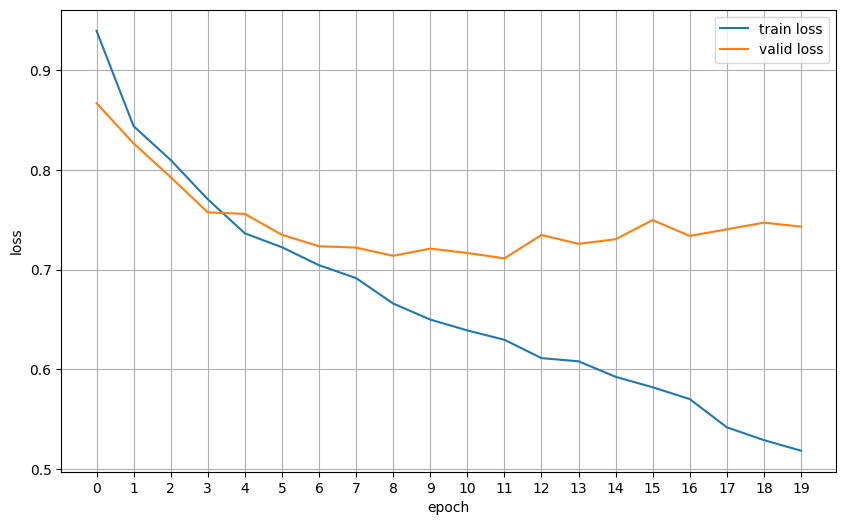

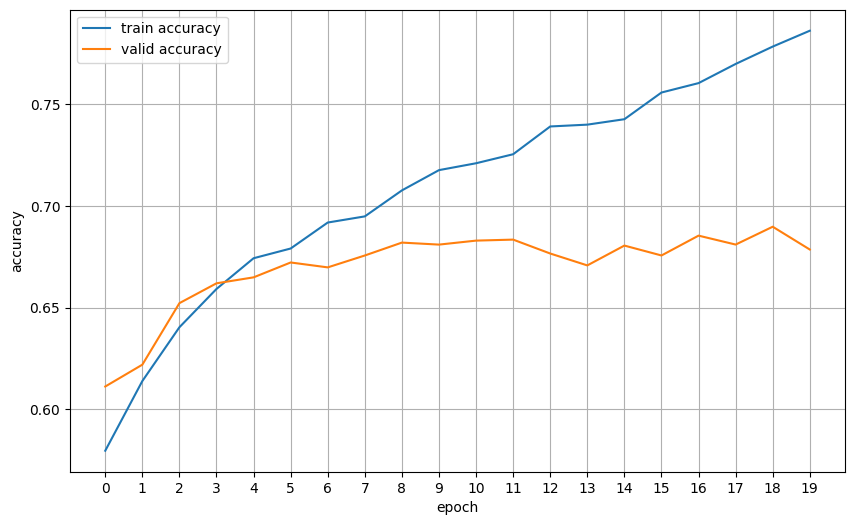

In [ ]:
import collections
import datasets
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchtext
import tqdm
from sklearn.model_selection import train_test_split
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from torch.utils.data import DataLoader, Dataset


# Setting a seed for reproducibility
seed = 1234
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True

# Assuming your dataset is already loaded and preprocessed
# (filtered_text and polarity columns are used)
# Replace with actual loading code as needed
dataset = cleaned_kaggle_combined
train_data, test_data = train_test_split(dataset, test_size=0.25)

# Tokenizer
tokenizer = get_tokenizer("basic_english")

# Tokenization
def tokenize_example(example, tokenizer, max_length):
    tokens = tokenizer(example["text"])[:max_length]
    length = len(tokens)
    return {"tokens": tokens, "length": length}

max_length = 512

train_data[['tokens', 'length']] = train_data.apply(lambda row: pd.Series(tokenize_example(row, tokenizer, max_length)), axis=1)
test_data[['tokens', 'length']] = test_data.apply(lambda row: pd.Series(tokenize_example(row, tokenizer, max_length)), axis=1)


# Further split train data into training and validation sets
train_data, valid_data = train_test_split(train_data, test_size=0.25)
label_mapping = {"Negative": 0, "Neutral": 1, "Positive": 2}
train_data['polarity'] = train_data['polarity'].map(label_mapping)
valid_data['polarity'] = valid_data['polarity'].map(label_mapping)
test_data['polarity'] = test_data['polarity'].map(label_mapping)

# Filter out samples with zero length
train_data = train_data[train_data['length'] > 0]
valid_data = valid_data[valid_data['length'] > 0]
test_data = test_data[test_data['length'] > 0]

# Build Vocabulary
min_freq = 5
special_tokens = ["<unk>", "<pad>"]

vocab = build_vocab_from_iterator(
    train_data["tokens"],
    min_freq=min_freq,
    specials=special_tokens,
)
unk_index = vocab["<unk>"]
pad_index = vocab["<pad>"]
vocab.set_default_index(unk_index)

# Numericalize tokens
def numericalize_example(example, vocab):
    ids = vocab.lookup_indices(example["tokens"])
    return ids

train_data["ids"] = train_data.apply(lambda row: numericalize_example(row, vocab), axis=1)
valid_data["ids"] = valid_data.apply(lambda row: numericalize_example(row, vocab), axis=1)
test_data["ids"] = test_data.apply(lambda row: numericalize_example(row, vocab), axis=1)

# Create a custom Dataset class
class TextDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        ids = torch.tensor(self.data.iloc[idx]["ids"], dtype=torch.long)
        length = torch.tensor(self.data.iloc[idx]["length"], dtype=torch.long)
        label = torch.tensor(self.data.iloc[idx]["polarity"], dtype=torch.long)
        return {"ids": ids, "length": length, "label": label}

# Define collate_fn for padding
def collate_fn(batch):
    ids = [item['ids'] for item in batch]
    lengths = [item['length'] for item in batch]
    labels = [item['label'] for item in batch]

    # Use pad_sequence to pad the ids
    padded_ids = nn.utils.rnn.pad_sequence(ids, batch_first=True, padding_value=pad_index)
    lengths = torch.tensor(lengths, dtype=torch.long)
    labels = torch.tensor(labels, dtype=torch.long)

    return {"ids": padded_ids, "length": lengths, "label": labels}

# Create DataLoader
batch_size = 512

train_dataset = TextDataset(train_data)
valid_dataset = TextDataset(valid_data)
test_dataset = TextDataset(test_data)

train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
valid_data_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)
test_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)


# LSTM Model
class LSTM(nn.Module):
    def __init__(
        self,
        vocab_size,
        embedding_dim,
        hidden_dim,
        output_dim,
        n_layers,
        bidirectional,
        dropout_rate,
        pad_index,
    ):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=pad_index)
        self.lstm = nn.LSTM(
            embedding_dim,
            hidden_dim,
            n_layers,
            bidirectional=bidirectional,
            dropout=dropout_rate,
            batch_first=True,
        )
        self.fc = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, output_dim)
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, ids, length):
        embedded = self.dropout(self.embedding(ids))
        packed_embedded = nn.utils.rnn.pack_padded_sequence(
            embedded, length, batch_first=True, enforce_sorted=False
        )
        packed_output, (hidden, cell) = self.lstm(packed_embedded)
        if self.lstm.bidirectional:
            hidden = self.dropout(torch.cat([hidden[-1], hidden[-2]], dim=-1))
        else:
            hidden = self.dropout(hidden[-1])
        prediction = self.fc(hidden)
        return prediction

vocab_size = len(vocab)
embedding_dim = 300
hidden_dim = 300
output_dim = 3  # Assuming 3 classes: Neutral, Positive, Negative
n_layers = 2
bidirectional = True
dropout_rate = 0.5

model = LSTM(
    vocab_size,
    embedding_dim,
    hidden_dim,
    output_dim,
    n_layers,
    bidirectional,
    dropout_rate,
    pad_index,
)

# Initialize model parameters
def initialize_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_normal_(m.weight)
        nn.init.zeros_(m.bias)
    elif isinstance(m, nn.LSTM):
        for name, param in m.named_parameters():
            if "bias" in name:
                nn.init.zeros_(param)
            elif "weight" in name:
                nn.init.orthogonal_(param)

model.apply(initialize_weights)

# Load GloVe vectors and initialize the embedding layer
vectors = torchtext.vocab.GloVe(name="840B", dim=300)
pretrained_embedding = vectors.get_vecs_by_tokens(vocab.get_itos())
model.embedding.weight.data = pretrained_embedding

# Training setup
lr = 5e-4
optimizer = optim.Adam(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
criterion = criterion.to(device)

# Training and Evaluation Functions
def train(dataloader, model, criterion, optimizer, device):
    model.train()
    epoch_losses = []
    epoch_accs = []
    for batch in tqdm.tqdm(dataloader, desc="training..."):
        ids = batch["ids"].to(device)
        length = batch["length"]
        polarity = batch["label"].to(device)
        prediction = model(ids, length)
        loss = criterion(prediction, polarity)
        accuracy = get_accuracy(prediction, polarity)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_losses.append(loss.item())
        epoch_accs.append(accuracy.item())
    return np.mean(epoch_losses), np.mean(epoch_accs)

def evaluate(dataloader, model, criterion, device):
    model.eval()
    epoch_losses = []
    epoch_accs = []
    with torch.no_grad():
        for batch in tqdm.tqdm(dataloader, desc="evaluating..."):
            ids = batch["ids"].to(device)
            length = batch["length"]
            polarity = batch["label"].to(device)
            prediction = model(ids, length)
            loss = criterion(prediction, polarity)
            accuracy = get_accuracy(prediction, polarity)
            epoch_losses.append(loss.item())
            epoch_accs.append(accuracy.item())
    return np.mean(epoch_losses), np.mean(epoch_accs)

def get_accuracy(prediction, label):
    batch_size, _ = prediction.shape
    predicted_classes = prediction.argmax(dim=-1)
    correct_predictions = predicted_classes.eq(label).sum()
    accuracy = correct_predictions / batch_size
    return accuracy

# Training Loop
n_epochs = 20
best_valid_loss = float("inf")

metrics = collections.defaultdict(list)

for epoch in range(n_epochs):
    train_loss, train_acc = train(
        train_data_loader, model, criterion, optimizer, device
    )
    valid_loss, valid_acc = evaluate(valid_data_loader, model, criterion, device)
    metrics["train_losses"].append(train_loss)
    metrics["train_accs"].append(train_acc)
    metrics["valid_losses"].append(valid_loss)
    metrics["valid_accs"].append(valid_acc)
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), "lstm.pt")
    print(f"epoch: {epoch}")
    print(f"train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}")
    print(f"valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}")

# Plotting the results
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(metrics["train_losses"], label="train loss")
ax.plot(metrics["valid_losses"], label="valid loss")
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_xticks(range(n_epochs))
ax.legend()
ax.grid()

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(metrics["train_accs"], label="train accuracy")
ax.plot(metrics["valid_accs"], label="valid accuracy")
ax.set_xlabel("epoch")
ax.set_ylabel("accuracy")
ax.set_xticks(range(n_epochs))
ax.legend()
ax.grid()

# Load the best model and evaluate on the test set
model.load_state_dict(torch.load("lstm.pt"))
test_loss, test_acc = evaluate(test_data_loader, model, criterion, device)
print(f"test_loss: {test_loss:.3f}, test_acc: {test_acc:.3f}")

# Prediction function
def predict_sentiment(text, model, tokenizer, vocab, device):
    tokens = tokenizer(text)
    ids = vocab.lookup_indices(tokens)
    length = torch.LongTensor([len(ids)])
    tensor = torch.LongTensor(ids).unsqueeze(dim=0).to(device)
    prediction = model(tensor, length).squeeze(dim=0)
    probability = torch.softmax(prediction, dim=-1)
    predicted_class = prediction.argmax(dim=-1).item()
    predicted_probability = probability[predicted_class].item()
    return predicted_class, predicted_probability


In [ ]:
ps_for_LSTM = preprocess_for_lstm(df_ps, 'body')
results_1 = ps_for_LSTM['body'].apply(lambda text: predict_sentiment(text, model, tokenizer, vocab, device))
ps_for_LSTM['LSTM_Sentiment'] = results_1.apply(lambda x: x[0])
ps_for_LSTM['LSTM_Sentiment_Probability'] = results_1.apply(lambda x: x[1])
ps_for_LSTM.value_counts('LSTM_Sentiment')

,count
LSTM_Sentiment,
1,109
0,48
2,39


In [ ]:
ns_for_LSTM = preprocess_for_lstm(df_ns, 'ï»¿"body"')
results_2 = ns_for_LSTM['ï»¿"body"'].apply(lambda text: predict_sentiment(text, model, tokenizer, vocab, device))
ns_for_LSTM['LSTM_Sentiment'] = results_2.apply(lambda x: x[0])
ns_for_LSTM['LSTM_Sentiment_Probability'] = results_2.apply(lambda x: x[1])
ns_for_LSTM.value_counts('LSTM_Sentiment')

,count
LSTM_Sentiment,
1,127
2,31
0,28


evaluating...: 100%|██████████| 4/4 [00:05<00:00,  1.43s/it]


epoch: 0
train_loss: 0.940, train_acc: 0.580
valid_loss: 0.869, valid_acc: 0.610


evaluating...: 100%|██████████| 4/4 [00:04<00:00,  1.17s/it]


epoch: 1
train_loss: 0.847, train_acc: 0.613
valid_loss: 0.831, valid_acc: 0.618


evaluating...: 100%|██████████| 4/4 [00:04<00:00,  1.06s/it]


epoch: 2
train_loss: 0.816, train_acc: 0.640
valid_loss: 0.796, valid_acc: 0.655


evaluating...: 100%|██████████| 4/4 [00:05<00:00,  1.49s/it]


epoch: 3
train_loss: 0.778, train_acc: 0.655
valid_loss: 0.764, valid_acc: 0.660


evaluating...: 100%|██████████| 4/4 [00:04<00:00,  1.11s/it]


epoch: 4
train_loss: 0.747, train_acc: 0.667
valid_loss: 0.761, valid_acc: 0.660


evaluating...: 100%|██████████| 4/4 [00:04<00:00,  1.25s/it]


epoch: 5
train_loss: 0.735, train_acc: 0.675
valid_loss: 0.751, valid_acc: 0.665


evaluating...: 100%|██████████| 4/4 [00:04<00:00,  1.22s/it]


epoch: 6
train_loss: 0.726, train_acc: 0.679
valid_loss: 0.735, valid_acc: 0.670


evaluating...: 100%|██████████| 4/4 [00:04<00:00,  1.17s/it]


epoch: 7
train_loss: 0.722, train_acc: 0.677
valid_loss: 0.731, valid_acc: 0.668


evaluating...: 100%|██████████| 4/4 [00:05<00:00,  1.50s/it]


epoch: 8
train_loss: 0.708, train_acc: 0.690
valid_loss: 0.727, valid_acc: 0.667


evaluating...: 100%|██████████| 4/4 [00:04<00:00,  1.10s/it]


epoch: 9
train_loss: 0.696, train_acc: 0.691
valid_loss: 0.725, valid_acc: 0.675


evaluating...: 100%|██████████| 4/4 [00:04<00:00,  1.12s/it]


epoch: 10
train_loss: 0.693, train_acc: 0.691
valid_loss: 0.723, valid_acc: 0.675


evaluating...: 100%|██████████| 4/4 [00:04<00:00,  1.14s/it]


epoch: 11
train_loss: 0.693, train_acc: 0.700
valid_loss: 0.725, valid_acc: 0.668


evaluating...: 100%|██████████| 4/4 [00:05<00:00,  1.36s/it]


epoch: 12
train_loss: 0.682, train_acc: 0.706
valid_loss: 0.719, valid_acc: 0.675


evaluating...: 100%|██████████| 4/4 [00:04<00:00,  1.08s/it]


epoch: 13
train_loss: 0.687, train_acc: 0.703
valid_loss: 0.721, valid_acc: 0.675


evaluating...: 100%|██████████| 4/4 [00:05<00:00,  1.39s/it]


epoch: 14
train_loss: 0.680, train_acc: 0.699
valid_loss: 0.718, valid_acc: 0.677


evaluating...: 100%|██████████| 4/4 [00:04<00:00,  1.14s/it]


epoch: 15
train_loss: 0.678, train_acc: 0.705
valid_loss: 0.718, valid_acc: 0.679


evaluating...: 100%|██████████| 4/4 [00:04<00:00,  1.12s/it]


epoch: 16
train_loss: 0.679, train_acc: 0.708
valid_loss: 0.717, valid_acc: 0.678


evaluating...: 100%|██████████| 4/4 [00:05<00:00,  1.31s/it]


epoch: 17
train_loss: 0.664, train_acc: 0.714
valid_loss: 0.718, valid_acc: 0.678


evaluating...: 100%|██████████| 4/4 [00:05<00:00,  1.29s/it]


epoch: 18
train_loss: 0.661, train_acc: 0.714
valid_loss: 0.718, valid_acc: 0.680


evaluating...: 100%|██████████| 4/4 [00:04<00:00,  1.15s/it]


Early stopping triggered


evaluating...: 100%|██████████| 5/5 [00:07<00:00,  1.44s/it]


test_loss: 0.701, test_acc: 0.680


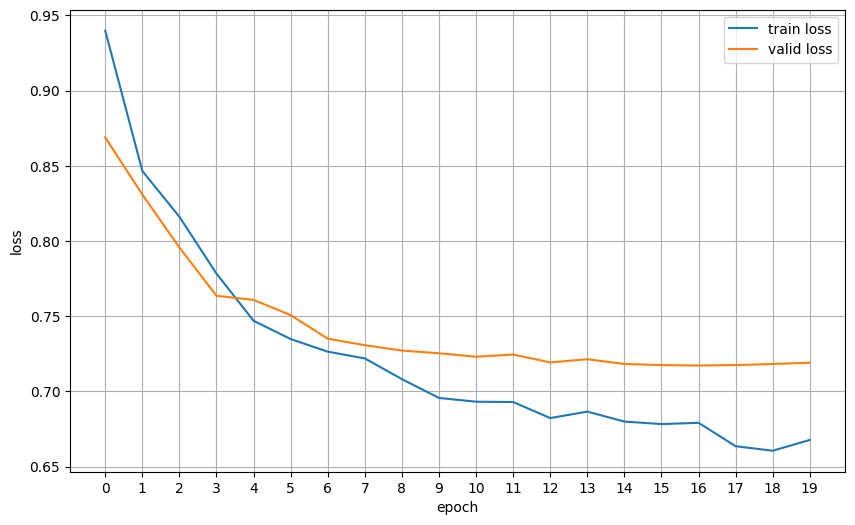

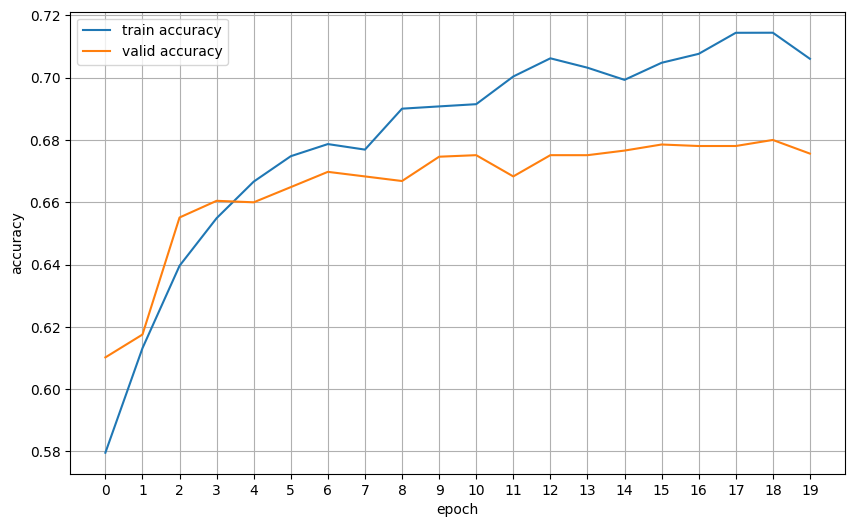

In [ ]:
# Setting a seed for reproducibility
seed = 1234
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True

# Assuming your dataset is already loaded and preprocessed
# (filtered_text and polarity columns are used)
# Replace with actual loading code as needed
dataset = cleaned_kaggle_combined
train_data, test_data = train_test_split(dataset, test_size=0.25)

# Tokenizer
tokenizer = get_tokenizer("basic_english")

# Tokenization
def tokenize_example(example, tokenizer, max_length):
    tokens = tokenizer(example["text"])[:max_length]
    length = len(tokens)
    return {"tokens": tokens, "length": length}

max_length = 512

train_data[['tokens', 'length']] = train_data.apply(lambda row: pd.Series(tokenize_example(row, tokenizer, max_length)), axis=1)
test_data[['tokens', 'length']] = test_data.apply(lambda row: pd.Series(tokenize_example(row, tokenizer, max_length)), axis=1)

# Further split train data into training and validation sets
train_data, valid_data = train_test_split(train_data, test_size=0.25)
label_mapping = {"Negative": 0, "Neutral": 1, "Positive": 2}
train_data['polarity'] = train_data['polarity'].map(label_mapping)
valid_data['polarity'] = valid_data['polarity'].map(label_mapping)
test_data['polarity'] = test_data['polarity'].map(label_mapping)

# Filter out samples with zero length
train_data = train_data[train_data['length'] > 0]
valid_data = valid_data[valid_data['length'] > 0]
test_data = test_data[test_data['length'] > 0]

# Build Vocabulary
min_freq = 5
special_tokens = ["<unk>", "<pad>"]

vocab = build_vocab_from_iterator(
    train_data["tokens"],
    min_freq=min_freq,
    specials=special_tokens,
)
unk_index = vocab["<unk>"]
pad_index = vocab["<pad>"]
vocab.set_default_index(unk_index)

# Numericalize tokens
def numericalize_example(example, vocab):
    ids = vocab.lookup_indices(example["tokens"])
    return ids

train_data["ids"] = train_data.apply(lambda row: numericalize_example(row, vocab), axis=1)
valid_data["ids"] = valid_data.apply(lambda row: numericalize_example(row, vocab), axis=1)
test_data["ids"] = test_data.apply(lambda row: numericalize_example(row, vocab), axis=1)

# Create a custom Dataset class
class TextDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        ids = torch.tensor(self.data.iloc[idx]["ids"], dtype=torch.long)
        length = torch.tensor(self.data.iloc[idx]["length"], dtype=torch.long)
        label = torch.tensor(self.data.iloc[idx]["polarity"], dtype=torch.long)
        return {"ids": ids, "length": length, "label": label}

# Define collate_fn for padding
def collate_fn(batch):
    ids = [item['ids'] for item in batch]
    lengths = [item['length'] for item in batch]
    labels = [item['label'] for item in batch]

    # Use pad_sequence to pad the ids
    padded_ids = nn.utils.rnn.pad_sequence(ids, batch_first=True, padding_value=pad_index)
    lengths = torch.tensor(lengths, dtype=torch.long)
    labels = torch.tensor(labels, dtype=torch.long)

    return {"ids": padded_ids, "length": lengths, "label": labels}

# Create DataLoader
batch_size = 512

train_dataset = TextDataset(train_data)
valid_dataset = TextDataset(valid_data)
test_dataset = TextDataset(test_data)

train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
valid_data_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)
test_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)

# LSTM Model with increased complexity
class LSTM(nn.Module):
    def __init__(
        self,
        vocab_size,
        embedding_dim,
        hidden_dim,
        output_dim,
        n_layers=2,  # Increase the number of layers to 2
        bidirectional=True,  # Re-enable bidirectional LSTM
        dropout_rate=0.5,
        pad_index=1,
    ):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=pad_index)
        self.lstm = nn.LSTM(
            embedding_dim,
            hidden_dim,
            n_layers,
            bidirectional=bidirectional,
            dropout=dropout_rate,
            batch_first=True,
        )
        self.fc = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, output_dim)
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, ids, length):
        embedded = self.dropout(self.embedding(ids))
        packed_embedded = nn.utils.rnn.pack_padded_sequence(
            embedded, length, batch_first=True, enforce_sorted=False
        )
        packed_output, (hidden, cell) = self.lstm(packed_embedded)
        if self.lstm.bidirectional:
            hidden = self.dropout(torch.cat([hidden[-1], hidden[-2]], dim=-1))
        else:
            hidden = self.dropout(hidden[-1])
        prediction = self.fc(hidden)
        return prediction

vocab_size = len(vocab)
embedding_dim = 300
output_dim = 3  # Assuming 3 classes: Neutral, Positive, Negative

# Initialize the model with increased complexity
model = LSTM(
    vocab_size=vocab_size,
    embedding_dim=embedding_dim,
    hidden_dim=300,  # Increased hidden dimension
    output_dim=output_dim,
    n_layers=2,
    bidirectional=True,  # Bidirectional LSTM
    dropout_rate=0.5,  # Maintain dropout
    pad_index=pad_index,
)

# Initialize model parameters
def initialize_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_normal_(m.weight)
        nn.init.zeros_(m.bias)
    elif isinstance(m, nn.LSTM):
        for name, param in m.named_parameters():
            if "bias" in name:
                nn.init.zeros_(param)
            elif "weight" in name:
                nn.init.orthogonal_(param)

model.apply(initialize_weights)

# Load GloVe vectors and initialize the embedding layer
vectors = torchtext.vocab.GloVe(name="840B", dim=300)
pretrained_embedding = vectors.get_vecs_by_tokens(vocab.get_itos())
model.embedding.weight.data = pretrained_embedding

# Training setup
lr = 5e-4  # Reduced learning rate
optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)  # Further reduce LR
criterion = nn.CrossEntropyLoss()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
criterion = criterion.to(device)

# Training and Evaluation Functions
def train(dataloader, model, criterion, optimizer, device):
    model.train()
    epoch_losses = []
    epoch_accs = []
    for batch in tqdm.tqdm(dataloader, desc="training..."):
        ids = batch["ids"].to(device)
        length = batch["length"]
        polarity = batch["label"].to(device)
        prediction = model(ids, length)
        loss = criterion(prediction, polarity)
        accuracy = get_accuracy(prediction, polarity)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_losses.append(loss.item())
        epoch_accs.append(accuracy.item())
    return np.mean(epoch_losses), np.mean(epoch_accs)

def evaluate(dataloader, model, criterion, device):
    model.eval()
    epoch_losses = []
    epoch_accs = []
    with torch.no_grad():
        for batch in tqdm.tqdm(dataloader, desc="evaluating..."):
            ids = batch["ids"].to(device)
            length = batch["length"]
            polarity = batch["label"].to(device)
            prediction = model(ids, length)
            loss = criterion(prediction, polarity)
            accuracy = get_accuracy(prediction, polarity)
            epoch_losses.append(loss.item())
            epoch_accs.append(accuracy.item())
    return np.mean(epoch_losses), np.mean(epoch_accs)

def get_accuracy(prediction, label):
    batch_size, _ = prediction.shape
    predicted_classes = prediction.argmax(dim=-1)
    correct_predictions = predicted_classes.eq(label).sum()
    accuracy = correct_predictions / batch_size
    return accuracy

# Training Loop with Early Stopping
n_epochs = 20
best_valid_loss = float("inf")
early_stop_count = 0
early_stop_patience = 3  # Number of epochs to wait before stopping

metrics = collections.defaultdict(list)

for epoch in range(n_epochs):
    train_loss, train_acc = train(
        train_data_loader, model, criterion, optimizer, device
    )
    valid_loss, valid_acc = evaluate(valid_data_loader, model, criterion, device)
    scheduler.step()  # Adjust learning rate

    metrics["train_losses"].append(train_loss)
    metrics["train_accs"].append(train_acc)
    metrics["valid_losses"].append(valid_loss)
    metrics["valid_accs"].append(valid_acc)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), "lstm.pt")
        early_stop_count = 0  # Reset the counter if validation loss improves
    else:
        early_stop_count += 1  # Increment the counter if no improvement
        if early_stop_count >= early_stop_patience:
            print("Early stopping triggered")
            break  # Stop training if no improvement for 'early_stop_patience' epochs

    print(f"epoch: {epoch}")
    print(f"train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}")
    print(f"valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}")

# Plotting the results
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(metrics["train_losses"], label="train loss")
ax.plot(metrics["valid_losses"], label="valid loss")
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_xticks(range(n_epochs))
ax.legend()
ax.grid()

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(metrics["train_accs"], label="train accuracy")
ax.plot(metrics["valid_accs"], label="valid accuracy")
ax.set_xlabel("epoch")
ax.set_ylabel("accuracy")
ax.set_xticks(range(n_epochs))
ax.legend()
ax.grid()

# Load the best model and evaluate on the test set
model.load_state_dict(torch.load("lstm.pt"))
test_loss, test_acc = evaluate(test_data_loader, model, criterion, device)
print(f"test_loss: {test_loss:.3f}, test_acc: {test_acc:.3f}")

# Prediction function
def predict_sentiment(text, model, tokenizer, vocab, device):
    tokens = tokenizer(text)
    ids = vocab.lookup_indices(tokens)
    length = torch.LongTensor([len(ids)])
    tensor = torch.LongTensor(ids).unsqueeze(dim=0).to(device)
    prediction = model(tensor, length).squeeze(dim=0)
    probability = torch.softmax(prediction, dim=-1)
    predicted_class = prediction.argmax(dim=-1).item()
    predicted_probability = probability[predicted_class].item()
    return predicted_class, predicted_probability


In [ ]:
results_3 = ps_for_LSTM['body'].apply(lambda text: predict_sentiment(text, model, tokenizer, vocab, device))
ps_for_LSTM['LSTM2_Sentiment'] = results_3.apply(lambda x: x[0])
ps_for_LSTM['LSTM2_Sentiment_Probability'] = results_3.apply(lambda x: x[1])
ps_for_LSTM.value_counts('LSTM2_Sentiment')

,count
LSTM2_Sentiment,
1,109
0,46
2,41


In [ ]:
results_4 = ns_for_LSTM['ï»¿"body"'].apply(lambda text: predict_sentiment(text, model, tokenizer, vocab, device))
ns_for_LSTM['LSTM2_Sentiment'] = results_4.apply(lambda x: x[0])
ns_for_LSTM['LSTM2_Sentiment_Probability'] = results_4.apply(lambda x: x[1])
ns_for_LSTM.value_counts('LSTM2_Sentiment')

,count
LSTM2_Sentiment,
1,127
2,30
0,29


evaluating...: 100%|██████████| 4/4 [00:04<00:00,  1.01s/it]


epoch: 0
train_loss: 1.049, train_acc: 0.542
valid_loss: 0.983, valid_acc: 0.609


evaluating...: 100%|██████████| 4/4 [00:04<00:00,  1.02s/it]


epoch: 1
train_loss: 0.935, train_acc: 0.608
valid_loss: 0.891, valid_acc: 0.609


evaluating...: 100%|██████████| 4/4 [00:04<00:00,  1.20s/it]


epoch: 2
train_loss: 0.891, train_acc: 0.607
valid_loss: 0.874, valid_acc: 0.609


evaluating...: 100%|██████████| 4/4 [00:03<00:00,  1.03it/s]


epoch: 3
train_loss: 0.876, train_acc: 0.607
valid_loss: 0.863, valid_acc: 0.609


evaluating...: 100%|██████████| 4/4 [00:05<00:00,  1.28s/it]


epoch: 4
train_loss: 0.859, train_acc: 0.610
valid_loss: 0.852, valid_acc: 0.610


evaluating...: 100%|██████████| 4/4 [00:04<00:00,  1.20s/it]


epoch: 5
train_loss: 0.848, train_acc: 0.609
valid_loss: 0.846, valid_acc: 0.611


evaluating...: 100%|██████████| 4/4 [00:03<00:00,  1.05it/s]


epoch: 6
train_loss: 0.849, train_acc: 0.608
valid_loss: 0.840, valid_acc: 0.615


evaluating...: 100%|██████████| 4/4 [00:03<00:00,  1.03it/s]


epoch: 7
train_loss: 0.837, train_acc: 0.616
valid_loss: 0.834, valid_acc: 0.620


evaluating...: 100%|██████████| 4/4 [00:05<00:00,  1.30s/it]


epoch: 8
train_loss: 0.831, train_acc: 0.620
valid_loss: 0.827, valid_acc: 0.626


evaluating...: 100%|██████████| 4/4 [00:03<00:00,  1.03it/s]


epoch: 9
train_loss: 0.820, train_acc: 0.629
valid_loss: 0.820, valid_acc: 0.631


evaluating...: 100%|██████████| 4/4 [00:05<00:00,  1.32s/it]


epoch: 10
train_loss: 0.815, train_acc: 0.631
valid_loss: 0.816, valid_acc: 0.636


evaluating...: 100%|██████████| 4/4 [00:03<00:00,  1.06it/s]


epoch: 11
train_loss: 0.815, train_acc: 0.637
valid_loss: 0.813, valid_acc: 0.643


evaluating...: 100%|██████████| 4/4 [00:04<00:00,  1.13s/it]


epoch: 12
train_loss: 0.805, train_acc: 0.640
valid_loss: 0.809, valid_acc: 0.645


evaluating...: 100%|██████████| 4/4 [00:03<00:00,  1.04it/s]


epoch: 13
train_loss: 0.806, train_acc: 0.639
valid_loss: 0.806, valid_acc: 0.643


evaluating...: 100%|██████████| 4/4 [00:05<00:00,  1.25s/it]


epoch: 14
train_loss: 0.804, train_acc: 0.646
valid_loss: 0.802, valid_acc: 0.653


evaluating...: 100%|██████████| 4/4 [00:03<00:00,  1.05it/s]


epoch: 15
train_loss: 0.801, train_acc: 0.650
valid_loss: 0.800, valid_acc: 0.652


evaluating...: 100%|██████████| 4/4 [00:03<00:00,  1.00it/s]


epoch: 16
train_loss: 0.801, train_acc: 0.650
valid_loss: 0.799, valid_acc: 0.651


evaluating...: 100%|██████████| 4/4 [00:04<00:00,  1.21s/it]


epoch: 17
train_loss: 0.794, train_acc: 0.649
valid_loss: 0.797, valid_acc: 0.653


evaluating...: 100%|██████████| 4/4 [00:05<00:00,  1.26s/it]


epoch: 18
train_loss: 0.788, train_acc: 0.661
valid_loss: 0.795, valid_acc: 0.657


evaluating...: 100%|██████████| 4/4 [00:03<00:00,  1.05it/s]


epoch: 19
train_loss: 0.792, train_acc: 0.648
valid_loss: 0.794, valid_acc: 0.652


evaluating...: 100%|██████████| 5/5 [00:06<00:00,  1.22s/it]


test_loss: 0.783, test_acc: 0.651


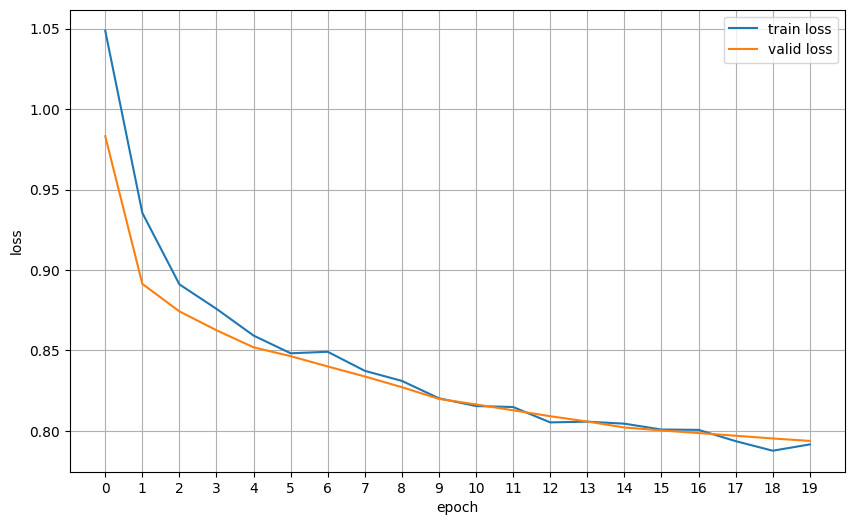

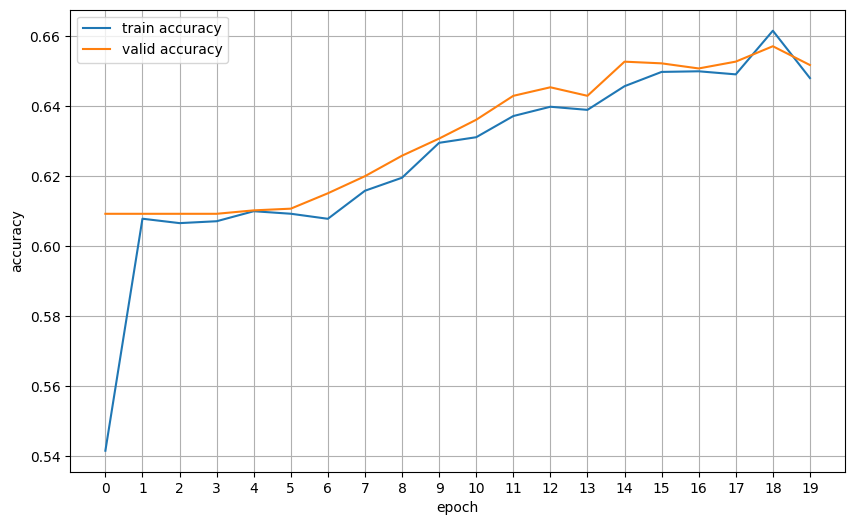

In [ ]:
# Setting a seed for reproducibility
seed = 1234
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True

# Assuming your dataset is already loaded and preprocessed
# (filtered_text and polarity columns are used)
# Replace with actual loading code as needed
dataset = cleaned_kaggle_combined
train_data, test_data = train_test_split(dataset, test_size=0.25)

# Tokenizer
tokenizer = get_tokenizer("basic_english")

# Tokenization
def tokenize_example(example, tokenizer, max_length):
    tokens = tokenizer(example["text"])[:max_length]
    length = len(tokens)
    return {"tokens": tokens, "length": length}

max_length = 512

train_data[['tokens', 'length']] = train_data.apply(lambda row: pd.Series(tokenize_example(row, tokenizer, max_length)), axis=1)
test_data[['tokens', 'length']] = test_data.apply(lambda row: pd.Series(tokenize_example(row, tokenizer, max_length)), axis=1)


# Further split train data into training and validation sets
train_data, valid_data = train_test_split(train_data, test_size=0.25)
label_mapping = {"Negative": 0, "Neutral": 1, "Positive": 2}
train_data['polarity'] = train_data['polarity'].map(label_mapping)
valid_data['polarity'] = valid_data['polarity'].map(label_mapping)
test_data['polarity'] = test_data['polarity'].map(label_mapping)

# Filter out samples with zero length
train_data = train_data[train_data['length'] > 0]
valid_data = valid_data[valid_data['length'] > 0]
test_data = test_data[test_data['length'] > 0]

# Build Vocabulary
min_freq = 5
special_tokens = ["<unk>", "<pad>"]

vocab = build_vocab_from_iterator(
    train_data["tokens"],
    min_freq=min_freq,
    specials=special_tokens,
)
unk_index = vocab["<unk>"]
pad_index = vocab["<pad>"]
vocab.set_default_index(unk_index)

# Numericalize tokens
def numericalize_example(example, vocab):
    ids = vocab.lookup_indices(example["tokens"])
    return ids

train_data["ids"] = train_data.apply(lambda row: numericalize_example(row, vocab), axis=1)
valid_data["ids"] = valid_data.apply(lambda row: numericalize_example(row, vocab), axis=1)
test_data["ids"] = test_data.apply(lambda row: numericalize_example(row, vocab), axis=1)

# Create a custom Dataset class
class TextDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        ids = torch.tensor(self.data.iloc[idx]["ids"], dtype=torch.long)
        length = torch.tensor(self.data.iloc[idx]["length"], dtype=torch.long)
        label = torch.tensor(self.data.iloc[idx]["polarity"], dtype=torch.long)
        return {"ids": ids, "length": length, "label": label}

# Define collate_fn for padding
def collate_fn(batch):
    ids = [item['ids'] for item in batch]
    lengths = [item['length'] for item in batch]
    labels = [item['label'] for item in batch]

    # Use pad_sequence to populate the ids
    padded_ids = nn.utils.rnn.pad_sequence(ids, batch_first=True, padding_value=pad_index)
    lengths = torch.tensor(lengths, dtype=torch.long)
    labels = torch.tensor(labels, dtype=torch.long)

    return {"ids": padded_ids, "length": lengths, "label": labels}

# Create DataLoader
batch_size = 512

train_dataset = TextDataset(train_data)
valid_dataset = TextDataset(valid_data)
test_dataset = TextDataset(test_data)

train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
valid_data_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)
test_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)


# LSTM Model with increased complexity
class LSTM(nn.Module):
    def __init__(
        self,
        vocab_size,
        embedding_dim,
        hidden_dim,
        output_dim,
        n_layers=2,  # Increase the number of layers to 2
        bidirectional=True,  # Re-enable bidirectional LSTM
        dropout_rate=0.5,
        pad_index=1,
    ):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=pad_index)
        self.lstm = nn.LSTM(
            embedding_dim,
            hidden_dim,
            n_layers,
            bidirectional=bidirectional,
            dropout=dropout_rate,
            batch_first=True,
        )
        self.fc = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, output_dim)
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, ids, length):
        embedded = self.dropout(self.embedding(ids))
        packed_embedded = nn.utils.rnn.pack_padded_sequence(
            embedded, length, batch_first=True, enforce_sorted=False
        )
        packed_output, (hidden, cell) = self.lstm(packed_embedded)
        if self.lstm.bidirectional:
            hidden = self.dropout(torch.cat([hidden[-1], hidden[-2]], dim=-1))
        else:
            hidden = self.dropout(hidden[-1])
        prediction = self.fc(hidden)
        return prediction

vocab_size = len(vocab)
embedding_dim = 300
output_dim = 3  # Assuming 3 classes: Neutral, Positive, Negative

# Initialize the model with increased complexity
model = LSTM(
    vocab_size=vocab_size,
    embedding_dim=embedding_dim,
    hidden_dim=300,  # Increased hidden dimension
    output_dim=output_dim,
    n_layers=2,
    bidirectional=True,  # Bidirectional LSTM
    dropout_rate=0.5,  # Maintain dropout
    pad_index=pad_index,
)


# Initialize model parameters
def initialize_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_normal_(m.weight)
        nn.init.zeros_(m.bias)
    elif isinstance(m, nn.LSTM):
        for name, param in m.named_parameters():
            if "bias" in name:
                nn.init.zeros_(param)
            elif "weight" in name:
                nn.init.orthogonal_(param)

model.apply(initialize_weights)

# Load GloVe vectors and initialize the embedding layer
vectors = torchtext.vocab.GloVe(name="840B", dim=300)
pretrained_embedding = vectors.get_vecs_by_tokens(vocab.get_itos())
model.embedding.weight.data = pretrained_embedding

# Training setup
lr = 1e-4  # Reduced learning rate
optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=1e-5)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)  # Further reduce LR
criterion = nn.CrossEntropyLoss()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
criterion = criterion.to(device)

# Training and Evaluation Functions
def train(dataloader, model, criterion, optimizer, device):
    model.train()
    epoch_losses = []
    epoch_accs = []
    for batch in tqdm.tqdm(dataloader, desc="training..."):
        ids = batch["ids"].to(device)
        length = batch["length"]
        polarity = batch["label"].to(device)
        prediction = model(ids, length)
        loss = criterion(prediction, polarity)
        accuracy = get_accuracy(prediction, polarity)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_losses.append(loss.item())
        epoch_accs.append(accuracy.item())
    return np.mean(epoch_losses), np.mean(epoch_accs)

def evaluate(dataloader, model, criterion, device):
    model.eval()
    epoch_losses = []
    epoch_accs = []
    with torch.no_grad():
        for batch in tqdm.tqdm(dataloader, desc="evaluating..."):
            ids = batch["ids"].to(device)
            length = batch["length"]
            polarity = batch["label"].to(device)
            prediction = model(ids, length)
            loss = criterion(prediction, polarity)
            accuracy = get_accuracy(prediction, polarity)
            epoch_losses.append(loss.item())
            epoch_accs.append(accuracy.item())
    return np.mean(epoch_losses), np.mean(epoch_accs)

def get_accuracy(prediction, label):
    batch_size, _ = prediction.shape
    predicted_classes = prediction.argmax(dim=-1)
    correct_predictions = predicted_classes.eq(label).sum()
    accuracy = correct_predictions / batch_size
    return accuracy

# Training Loop with Early Stopping
n_epochs = 20
best_valid_loss = float("inf")
early_stop_count = 0
early_stop_patience = 3  # Number of epochs to wait before stopping

metrics = collections.defaultdict(list)

for epoch in range(n_epochs):
    train_loss, train_acc = train(
        train_data_loader, model, criterion, optimizer, device
    )
    valid_loss, valid_acc = evaluate(valid_data_loader, model, criterion, device)
    scheduler.step()  # Adjust learning rate

    metrics["train_losses"].append(train_loss)
    metrics["train_accs"].append(train_acc)
    metrics["valid_losses"].append(valid_loss)
    metrics["valid_accs"].append(valid_acc)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), "lstm.pt")
        early_stop_count = 0  # Reset the counter if validation loss improves
    else:
        early_stop_count += 1  # Increment the counter if no improvement
        if early_stop_count >= early_stop_patience:
            print("Early stopping triggered")
            break  # Stop training if no improvement for 'early_stop_patience' epochs

    print(f"epoch: {epoch}")
    print(f"train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}")
    print(f"valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}")

# Plotting the results
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(metrics["train_losses"], label="train loss")
ax.plot(metrics["valid_losses"], label="valid loss")
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_xticks(range(n_epochs))
ax.legend()
ax.grid()

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(metrics["train_accs"], label="train accuracy")
ax.plot(metrics["valid_accs"], label="valid accuracy")
ax.set_xlabel("epoch")
ax.set_ylabel("accuracy")
ax.set_xticks(range(n_epochs))
ax.legend()
ax.grid()

# Load the best model and evaluate on the test set
model.load_state_dict(torch.load("lstm.pt"))
test_loss, test_acc = evaluate(test_data_loader, model, criterion, device)
print(f"test_loss: {test_loss:.3f}, test_acc: {test_acc:.3f}")

# Prediction function
def predict_sentiment(text, model, tokenizer, vocab, device):
    tokens = tokenizer(text)
    ids = vocab.lookup_indices(tokens)
    length = torch.LongTensor([len(ids)])
    tensor = torch.LongTensor(ids).unsqueeze(dim=0).to(device)
    prediction = model(tensor, length).squeeze(dim=0)
    probability = torch.softmax(prediction, dim=-1)
    predicted_class = prediction.argmax(dim=-1).item()
    predicted_probability = probability[predicted_class].item()
    return predicted_class, predicted_probability


In [ ]:
results_5 = ps_for_LSTM['body'].apply(lambda text: predict_sentiment(text, model, tokenizer, vocab, device))
ps_for_LSTM['LSTM3_Sentiment'] = results_5.apply(lambda x: x[0])
ps_for_LSTM['LSTM3_Sentiment_Probability'] = results_5.apply(lambda x: x[1])
ps_for_LSTM.value_counts('LSTM3_Sentiment')

,count
LSTM3_Sentiment,
1,140
2,56


In [ ]:
results_6 = ns_for_LSTM['body'].apply(lambda text: predict_sentiment(text, model, tokenizer, vocab, device))
ns_for_LSTM['LSTM3_Sentiment'] = results_6.apply(lambda x: x[0])
ns_for_LSTM['LSTM3_Sentiment_Probability'] = results_6.apply(lambda x: x[1])
ns_for_LSTM.value_counts('LSTM3_Sentiment')

,count
LSTM3_Sentiment,
1,153
2,43


evaluating...: 100%|██████████| 8/8 [00:06<00:00,  1.30it/s]


epoch: 0
train_loss: 0.910, train_acc: 0.590
valid_loss: 0.811, valid_acc: 0.653


evaluating...: 100%|██████████| 8/8 [00:04<00:00,  1.64it/s]


epoch: 1
train_loss: 0.818, train_acc: 0.628
valid_loss: 0.806, valid_acc: 0.567


evaluating...: 100%|██████████| 8/8 [00:04<00:00,  1.69it/s]


epoch: 2
train_loss: 0.767, train_acc: 0.660
valid_loss: 0.834, valid_acc: 0.583


evaluating...: 100%|██████████| 8/8 [00:06<00:00,  1.33it/s]


epoch: 3
train_loss: 0.730, train_acc: 0.676
valid_loss: 0.821, valid_acc: 0.575


evaluating...: 100%|██████████| 8/8 [00:04<00:00,  1.63it/s]


epoch: 4
train_loss: 0.714, train_acc: 0.688
valid_loss: 0.788, valid_acc: 0.584


evaluating...: 100%|██████████| 8/8 [00:04<00:00,  1.78it/s]


epoch: 5
train_loss: 0.695, train_acc: 0.699
valid_loss: 0.817, valid_acc: 0.584


evaluating...: 100%|██████████| 8/8 [00:04<00:00,  1.76it/s]


epoch: 6
train_loss: 0.677, train_acc: 0.705
valid_loss: 0.814, valid_acc: 0.587


evaluating...: 100%|██████████| 8/8 [00:04<00:00,  1.68it/s]


epoch: 7
train_loss: 0.672, train_acc: 0.708
valid_loss: 0.780, valid_acc: 0.593


evaluating...: 100%|██████████| 8/8 [00:06<00:00,  1.33it/s]


epoch: 8
train_loss: 0.661, train_acc: 0.713
valid_loss: 0.773, valid_acc: 0.591


evaluating...: 100%|██████████| 8/8 [00:04<00:00,  1.77it/s]


epoch: 9
train_loss: 0.649, train_acc: 0.712
valid_loss: 0.762, valid_acc: 0.585


evaluating...: 100%|██████████| 8/8 [00:04<00:00,  1.84it/s]


epoch: 10
train_loss: 0.643, train_acc: 0.725
valid_loss: 0.768, valid_acc: 0.592


evaluating...: 100%|██████████| 8/8 [00:05<00:00,  1.60it/s]


epoch: 11
train_loss: 0.637, train_acc: 0.730
valid_loss: 0.808, valid_acc: 0.591


evaluating...: 100%|██████████| 8/8 [00:06<00:00,  1.30it/s]


Early stopping triggered


evaluating...: 100%|██████████| 10/10 [00:06<00:00,  1.60it/s]


test_loss: 0.693, test_acc: 0.690


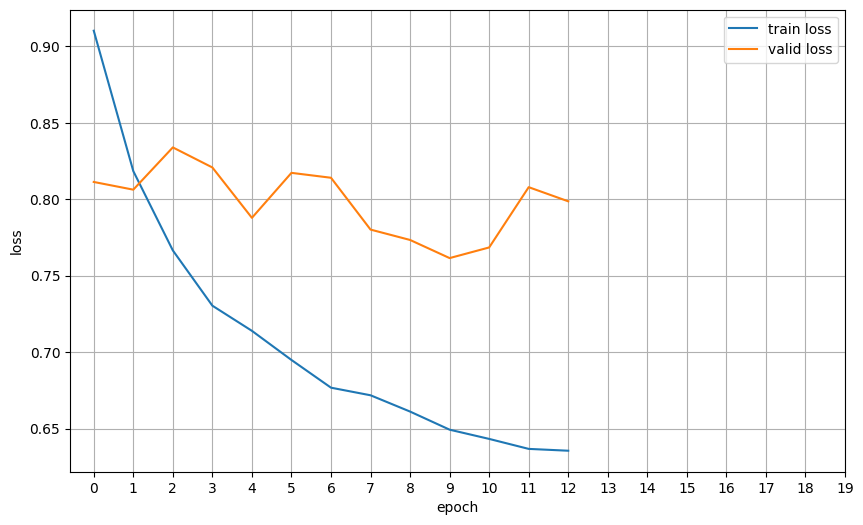

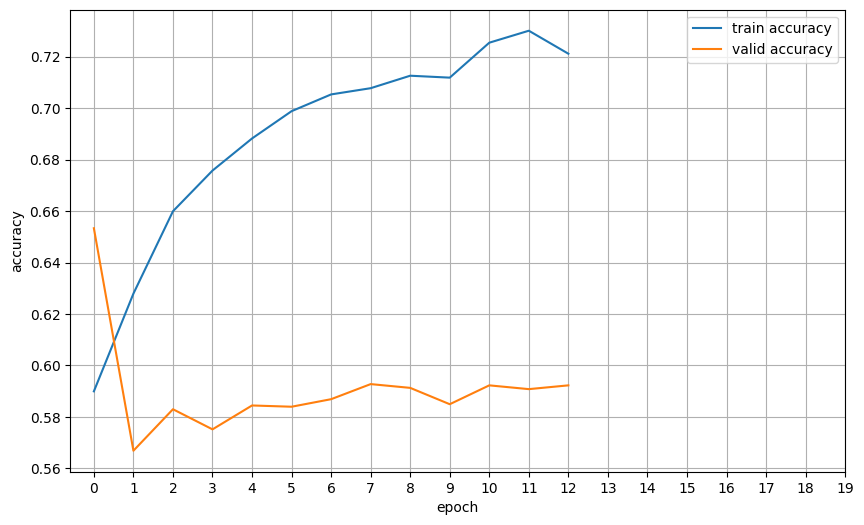

In [ ]:
# Setting a seed for reproducibility
seed = 1234
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True

# Assuming your dataset is already loaded and preprocessed
dataset = cleaned_kaggle_combined
train_data, test_data = train_test_split(dataset, test_size=0.25)

# Tokenizer
tokenizer = get_tokenizer("basic_english")

# Tokenization
def tokenize_example(example, tokenizer, max_length):
    tokens = tokenizer(example["text"])[:max_length]
    length = len(tokens)
    return {"tokens": tokens, "length": length}

max_length = 512

train_data[['tokens', 'length']] = train_data.apply(lambda row: pd.Series(tokenize_example(row, tokenizer, max_length)), axis=1)
test_data[['tokens', 'length']] = test_data.apply(lambda row: pd.Series(tokenize_example(row, tokenizer, max_length)), axis=1)

# Further split train data into training and validation sets
train_data, valid_data = train_test_split(train_data, test_size=0.25)
label_mapping = {"Negative": 0, "Neutral": 1, "Positive": 2}
train_data['polarity'] = train_data['polarity'].map(label_mapping)
valid_data['polarity'] = valid_data['polarity'].map(label_mapping)
test_data['polarity'] = test_data['polarity'].map(label_mapping)

# Filter out samples with zero length
train_data = train_data[train_data['length'] > 0]
valid_data = valid_data[valid_data['length'] > 0]
test_data = test_data[test_data['length'] > 0]

# Build Vocabulary
min_freq = 5
special_tokens = ["<unk>", "<pad>"]

vocab = build_vocab_from_iterator(
    train_data["tokens"],
    min_freq=min_freq,
    specials=special_tokens,
)
unk_index = vocab["<unk>"]
pad_index = vocab["<pad>"]
vocab.set_default_index(unk_index)

# Numericalize tokens
def numericalize_example(example, vocab):
    ids = vocab.lookup_indices(example["tokens"])
    return ids

train_data["ids"] = train_data.apply(lambda row: numericalize_example(row, vocab), axis=1)
valid_data["ids"] = valid_data.apply(lambda row: numericalize_example(row, vocab), axis=1)
test_data["ids"] = test_data.apply(lambda row: numericalize_example(row, vocab), axis=1)

# Create a custom Dataset class
class TextDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        ids = torch.tensor(self.data.iloc[idx]["ids"], dtype=torch.long)
        length = torch.tensor(self.data.iloc[idx]["length"], dtype=torch.long)
        label = torch.tensor(self.data.iloc[idx]["polarity"], dtype=torch.long)
        return {"ids": ids, "length": length, "label": label}

# Define collate_fn to perform padding
def collate_fn(batch):
    ids = [item['ids'] for item in batch]
    lengths = [item['length'] for item in batch]
    labels = [item['label'] for item in batch]

    # Use pad_sequence to pad the ids
    padded_ids = nn.utils.rnn.pad_sequence(ids, batch_first=True, padding_value=pad_index)
    lengths = torch.tensor(lengths, dtype=torch.long)
    labels = torch.tensor(labels, dtype=torch.long)

    return {"ids": padded_ids, "length": lengths, "label": labels}

# Create DataLoader
batch_size = 256  # Adjust batch size

train_dataset = TextDataset(train_data)
valid_dataset = TextDataset(valid_data)
test_dataset = TextDataset(test_data)

train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
valid_data_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)
test_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)


# LSTM Model with optimized structure
class LSTM(nn.Module):
    def __init__(
        self,
        vocab_size,
        embedding_dim,
        hidden_dim,
        output_dim,
        n_layers=2,  # Using two-layer LSTM
        bidirectional=True,  # Bidirectional LSTM
        dropout_rate=0.5,
        pad_index=1,
    ):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=pad_index)
        self.lstm = nn.LSTM(
            embedding_dim,
            hidden_dim,
            n_layers,
            bidirectional=bidirectional,
            dropout=dropout_rate,
            batch_first=True,
        )
        self.fc = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, output_dim)
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, ids, length):
        embedded = self.dropout(self.embedding(ids))
        packed_embedded = nn.utils.rnn.pack_padded_sequence(
            embedded, length, batch_first=True, enforce_sorted=False
        )
        packed_output, (hidden, cell) = self.lstm(packed_embedded)
        if self.lstm.bidirectional:
            hidden = self.dropout(torch.cat([hidden[-1], hidden[-2]], dim=-1))
        else:
            hidden = self.dropout(hidden[-1])
        prediction = self.fc(hidden)
        return prediction

vocab_size = len(vocab)
embedding_dim = 300
output_dim = 3  # Assuming 3 classes: Neutral, Positive, Negative

# Initialize the model with optimized structure
model = LSTM(
    vocab_size=vocab_size,
    embedding_dim=embedding_dim,
    hidden_dim=300,  # Increase hidden layer dimension
    output_dim=output_dim,
    n_layers=2,  # Using two-layer LSTM
    bidirectional=True,  # Bidirectional LSTM
    dropout_rate=0.5,  # Maintain dropout
    pad_index=pad_index,
)


# Initialize model parameters
def initialize_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_normal_(m.weight)
        nn.init.zeros_(m.bias)
    elif isinstance(m, nn.LSTM):
        for name, param in m.named_parameters():
            if "bias" in name:
                nn.init.zeros_(param)
            elif "weight" in name:
                nn.init.orthogonal_(param)

model.apply(initialize_weights)

# Load GloVe vectors and initialize the embedding layer
vectors = torchtext.vocab.GloVe(name="840B", dim=300)
pretrained_embedding = vectors.get_vecs_by_tokens(vocab.get_itos())
model.embedding.weight.data = pretrained_embedding

# Training setup
lr = 5e-4  # Slightly increase the learning rate
optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=1e-4)  # Enhance L2 regularization
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)  # Use learning rate scheduler
criterion = nn.CrossEntropyLoss()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
criterion = criterion.to(device)

# Training and Evaluation Functions
def train(dataloader, model, criterion, optimizer, device):
    model.train()
    epoch_losses = []
    epoch_accs = []
    for batch in tqdm.tqdm(dataloader, desc="training..."):
        ids = batch["ids"].to(device)
        length = batch["length"]
        polarity = batch["label"].to(device)
        prediction = model(ids, length)
        loss = criterion(prediction, polarity)
        accuracy = get_accuracy(prediction, polarity)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_losses.append(loss.item())
        epoch_accs.append(accuracy.item())
    return np.mean(epoch_losses), np.mean(epoch_accs)

def evaluate(dataloader, model, criterion, device):
    model.eval()
    epoch_losses = []
    epoch_accs = []
    with torch.no_grad():
        for batch in tqdm.tqdm(dataloader, desc="evaluating..."):
            ids = batch["ids"].to(device)
            length = batch["length"]
            polarity = batch["label"].to(device)
            prediction = model(ids, length)
            loss = criterion(prediction, polarity)
            accuracy = get_accuracy(prediction, polarity)
            epoch_losses.append(loss.item())
            epoch_accs.append(accuracy.item())
    return np.mean(epoch_losses), np.mean(epoch_accs)

def get_accuracy(prediction, label):
    batch_size, _ = prediction.shape
    predicted_classes = prediction.argmax(dim=-1)
    correct_predictions = predicted_classes.eq(label).sum()
    accuracy = correct_predictions / batch_size
    return accuracy

# Training Loop with Early Stopping
n_epochs = 20
best_valid_loss = float("inf")
early_stop_count = 0
early_stop_patience = 3  # Number of epochs to wait before stopping

metrics = collections.defaultdict(list)

for epoch in range(n_epochs):
    train_loss, train_acc = train(
        train_data_loader, model, criterion, optimizer, device
    )
    valid_loss, valid_acc = evaluate(valid_data_loader, model, criterion, device)
    scheduler.step()  # Adjust learning rate

    metrics["train_losses"].append(train_loss)
    metrics["train_accs"].append(train_acc)
    metrics["valid_losses"].append(valid_loss)
    metrics["valid_accs"].append(valid_acc)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), "lstm.pt")
        early_stop_count = 0  # Reset the counter if validation loss improves
    else:
        early_stop_count += 1  # Increment the counter if no improvement
        if early_stop_count >= early_stop_patience:
            print("Early stopping triggered")
            break  # Stop training if no improvement for 'early_stop_patience' epochs

    print(f"epoch: {epoch}")
    print(f"train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}")
    print(f"valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}")

# Plotting the results
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(metrics["train_losses"], label="train loss")
ax.plot(metrics["valid_losses"], label="valid loss")
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_xticks(range(n_epochs))
ax.legend()
ax.grid()

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(metrics["train_accs"], label="train accuracy")
ax.plot(metrics["valid_accs"], label="valid accuracy")
ax.set_xlabel("epoch")
ax.set_ylabel("accuracy")
ax.set_xticks(range(n_epochs))
ax.legend()
ax.grid()

# Load the best model and evaluate on the test set
model.load_state_dict(torch.load("lstm.pt"))
test_loss, test_acc = evaluate(test_data_loader, model, criterion, device)
print(f"test_loss: {test_loss:.3f}, test_acc: {test_acc:.3f}")

# Prediction function
def predict_sentiment(text, model, tokenizer, vocab, device):
    tokens = tokenizer(text)
    ids = vocab.lookup_indices(tokens)
    length = torch.LongTensor([len(ids)])
    tensor = torch.LongTensor(ids).unsqueeze(dim=0).to(device)
    prediction = model(tensor, length).squeeze(dim=0)
    probability = torch.softmax(prediction, dim=-1)
    predicted_class = prediction.argmax(dim=-1).item()
    predicted_probability = probability[predicted_class].item()
    return predicted_class, predicted_probability


In [ ]:
results_7 = ps_for_LSTM['body'].apply(lambda text: predict_sentiment(text, model, tokenizer, vocab, device))
ps_for_LSTM['LSTM4_Sentiment'] = results_7.apply(lambda x: x[0])
ps_for_LSTM['LSTM4_Sentiment_Probability'] = results_7.apply(lambda x: x[1])
ps_for_LSTM.value_counts('LSTM4_Sentiment')

,count
LSTM4_Sentiment,
1,108
2,56
0,32


In [ ]:
results_8 = ns_for_LSTM['ï»¿"body"'].apply(lambda text: predict_sentiment(text, model, tokenizer, vocab, device))
ns_for_LSTM['LSTM4_Sentiment'] = results_8.apply(lambda x: x[0])
ns_for_LSTM['LSTM4_Sentiment_Probability'] = results_8.apply(lambda x: x[1])
ns_for_LSTM.value_counts('LSTM4_Sentiment')

,count
LSTM4_Sentiment,
1,128
2,38
0,20


evaluating...: 100%|██████████| 8/8 [00:05<00:00,  1.57it/s]


epoch: 0
train_loss: 1.057, train_acc: 0.525
valid_loss: 0.991, valid_acc: 0.652


evaluating...: 100%|██████████| 8/8 [00:03<00:00,  2.06it/s]


epoch: 1
train_loss: 0.960, train_acc: 0.607
valid_loss: 0.878, valid_acc: 0.652


evaluating...: 100%|██████████| 8/8 [00:04<00:00,  1.67it/s]


epoch: 2
train_loss: 0.897, train_acc: 0.608
valid_loss: 0.832, valid_acc: 0.652


evaluating...: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]


epoch: 3
train_loss: 0.879, train_acc: 0.608
valid_loss: 0.827, valid_acc: 0.652


evaluating...: 100%|██████████| 8/8 [00:04<00:00,  1.90it/s]


epoch: 4
train_loss: 0.873, train_acc: 0.608
valid_loss: 0.821, valid_acc: 0.652


evaluating...: 100%|██████████| 8/8 [00:05<00:00,  1.59it/s]


epoch: 5
train_loss: 0.863, train_acc: 0.608
valid_loss: 0.812, valid_acc: 0.652


evaluating...: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]


epoch: 6
train_loss: 0.858, train_acc: 0.609
valid_loss: 0.807, valid_acc: 0.655


evaluating...: 100%|██████████| 8/8 [00:03<00:00,  2.09it/s]


epoch: 7
train_loss: 0.851, train_acc: 0.612
valid_loss: 0.804, valid_acc: 0.656


evaluating...: 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]


epoch: 8
train_loss: 0.845, train_acc: 0.612
valid_loss: 0.801, valid_acc: 0.657


evaluating...: 100%|██████████| 8/8 [00:03<00:00,  2.07it/s]


epoch: 9
train_loss: 0.840, train_acc: 0.616
valid_loss: 0.798, valid_acc: 0.661


evaluating...: 100%|██████████| 8/8 [00:04<00:00,  1.73it/s]


epoch: 10
train_loss: 0.835, train_acc: 0.618
valid_loss: 0.795, valid_acc: 0.662


evaluating...: 100%|██████████| 8/8 [00:04<00:00,  1.88it/s]


epoch: 11
train_loss: 0.829, train_acc: 0.624
valid_loss: 0.791, valid_acc: 0.667


evaluating...: 100%|██████████| 8/8 [00:04<00:00,  1.93it/s]


epoch: 12
train_loss: 0.826, train_acc: 0.623
valid_loss: 0.791, valid_acc: 0.668


evaluating...: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]


epoch: 13
train_loss: 0.818, train_acc: 0.632
valid_loss: 0.791, valid_acc: 0.678


evaluating...: 100%|██████████| 8/8 [00:04<00:00,  1.86it/s]


epoch: 14
train_loss: 0.819, train_acc: 0.633
valid_loss: 0.790, valid_acc: 0.680


evaluating...: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]


epoch: 15
train_loss: 0.813, train_acc: 0.636
valid_loss: 0.793, valid_acc: 0.678


evaluating...: 100%|██████████| 8/8 [00:04<00:00,  1.86it/s]


epoch: 16
train_loss: 0.810, train_acc: 0.639
valid_loss: 0.793, valid_acc: 0.680


evaluating...: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]


Early stopping triggered


evaluating...: 100%|██████████| 10/10 [00:06<00:00,  1.49it/s]


test_loss: 0.799, test_acc: 0.655


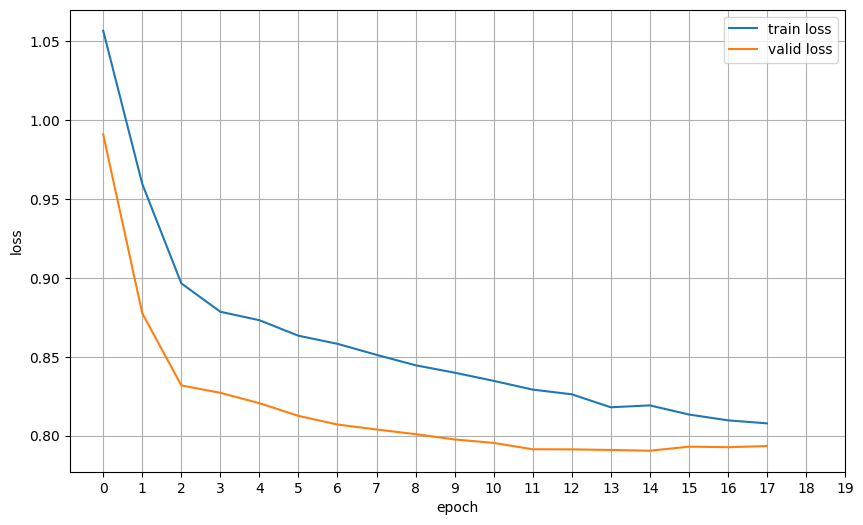

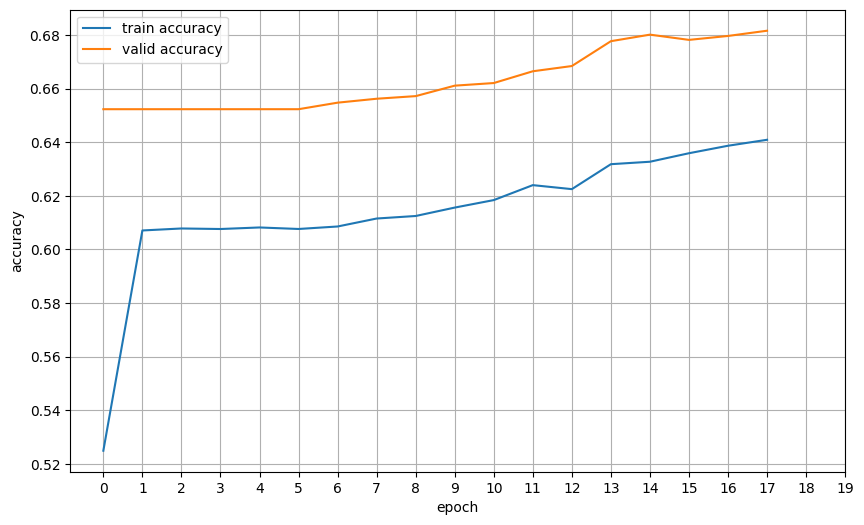

In [ ]:
# Setting a seed for reproducibility
seed = 1234
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True

# Assuming your dataset is already loaded and preprocessed
dataset = cleaned_kaggle_combined
train_data, test_data = train_test_split(dataset, test_size=0.25)

# Tokenizer
tokenizer = get_tokenizer("basic_english")

# Tokenization
def tokenize_example(example, tokenizer, max_length):
    tokens = tokenizer(example["text"])[:max_length]
    length = len(tokens)
    return {"tokens": tokens, "length": length}

max_length = 512

train_data[['tokens', 'length']] = train_data.apply(lambda row: pd.Series(tokenize_example(row, tokenizer, max_length)), axis=1)
test_data[['tokens', 'length']] = test_data.apply(lambda row: pd.Series(tokenize_example(row, tokenizer, max_length)), axis=1)

# Further split train data into training and validation sets
train_data, valid_data = train_test_split(train_data, test_size=0.25)
label_mapping = {"Negative": 0, "Neutral": 1, "Positive": 2}
train_data['polarity'] = train_data['polarity'].map(label_mapping)
valid_data['polarity'] = valid_data['polarity'].map(label_mapping)
test_data['polarity'] = test_data['polarity'].map(label_mapping)

# Filter out samples with zero length
train_data = train_data[train_data['length'] > 0]
valid_data = valid_data[valid_data['length'] > 0]
test_data = test_data[test_data['length'] > 0]

# Build Vocabulary
min_freq = 5
special_tokens = ["<unk>", "<pad>"]

vocab = build_vocab_from_iterator(
    train_data["tokens"],
    min_freq=min_freq,
    specials=special_tokens,
)
unk_index = vocab["<unk>"]
pad_index = vocab["<pad>"]
vocab.set_default_index(unk_index)

# Numericalize tokens
def numericalize_example(example, vocab):
    ids = vocab.lookup_indices(example["tokens"])
    return ids

train_data["ids"] = train_data.apply(lambda row: numericalize_example(row, vocab), axis=1)
valid_data["ids"] = valid_data.apply(lambda row: numericalize_example(row, vocab), axis=1)
test_data["ids"] = test_data.apply(lambda row: numericalize_example(row, vocab), axis=1)

# Create a custom Dataset class
class TextDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        ids = torch.tensor(self.data.iloc[idx]["ids"], dtype=torch.long)
        length = torch.tensor(self.data.iloc[idx]["length"], dtype=torch.long)
        label = torch.tensor(self.data.iloc[idx]["polarity"], dtype=torch.long)
        return {"ids": ids, "length": length, "label": label}

# Define collate_fn to perform padding
def collate_fn(batch):
    ids = [item['ids'] for item in batch]
    lengths = [item['length'] for item in batch]
    labels = [item['label'] for item in batch]

    # Use pad_sequence to pad the ids
    padded_ids = nn.utils.rnn.pad_sequence(ids, batch_first=True, padding_value=pad_index)
    lengths = torch.tensor(lengths, dtype=torch.long)
    labels = torch.tensor(labels, dtype=torch.long)

    return {"ids": padded_ids, "length": lengths, "label": labels}

# Create DataLoader
batch_size = 256  # Adjust batch size

train_dataset = TextDataset(train_data)
valid_dataset = TextDataset(valid_data)
test_dataset = TextDataset(test_data)

train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
valid_data_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)
test_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)


# LSTM Model with optimized structure
class LSTM(nn.Module):
    def __init__(
        self,
        vocab_size,
        embedding_dim,
        hidden_dim,
        output_dim,
        n_layers=2,  # Use two-layer LSTM
        bidirectional=True,  # Bidirectional LSTM
        dropout_rate=0.5,
        pad_index=1,
    ):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=pad_index)
        self.lstm = nn.LSTM(
            embedding_dim,
            hidden_dim,
            n_layers,
            bidirectional=bidirectional,
            dropout=dropout_rate,
            batch_first=True,
        )
        self.fc = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, output_dim)
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, ids, length):
        embedded = self.dropout(self.embedding(ids))
        packed_embedded = nn.utils.rnn.pack_padded_sequence(
            embedded, length, batch_first=True, enforce_sorted=False
        )
        packed_output, (hidden, cell) = self.lstm(packed_embedded)
        if self.lstm.bidirectional:
            hidden = self.dropout(torch.cat([hidden[-1], hidden[-2]], dim=-1))
        else:
            hidden = self.dropout(hidden[-1])
        prediction = self.fc(hidden)
        return prediction

vocab_size = len(vocab)
embedding_dim = 300
output_dim = 3  # Assuming 3 classes: Neutral, Positive, Negative

# Initialize the model with optimized structure
model = LSTM(
    vocab_size=vocab_size,
    embedding_dim=embedding_dim,
    hidden_dim=300,  # Increase hidden layer dimension
    output_dim=output_dim,
    n_layers=2,  # Use two-layer LSTM
    bidirectional=True,  # Bidirectional LSTM
    dropout_rate=0.6,  # Maintain dropout
    pad_index=pad_index,
)


# Initialize model parameters
def initialize_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_normal_(m.weight)
        nn.init.zeros_(m.bias)
    elif isinstance(m, nn.LSTM):
        for name, param in m.named_parameters():
            if "bias" in name:
                nn.init.zeros_(param)
            elif "weight" in name:
                nn.init.orthogonal_(param)

model.apply(initialize_weights)

# Load GloVe vectors and initialize the embedding layer
vectors = torchtext.vocab.GloVe(name="840B", dim=300)
pretrained_embedding = vectors.get_vecs_by_tokens(vocab.get_itos())
model.embedding.weight.data = pretrained_embedding

# Training setup
lr = 5e-5  # Slightly increase learning rate
optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=1e-4)  # Enhance L2 regularization
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.5)  # Use learning rate scheduler
criterion = nn.CrossEntropyLoss()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
criterion = criterion.to(device)

# Training and Evaluation Functions
def train(dataloader, model, criterion, optimizer, device):
    model.train()
    epoch_losses = []
    epoch_accs = []
    for batch in tqdm.tqdm(dataloader, desc="training..."):
        ids = batch["ids"].to(device)
        length = batch["length"]
        polarity = batch["label"].to(device)
        prediction = model(ids, length)
        loss = criterion(prediction, polarity)
        accuracy = get_accuracy(prediction, polarity)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_losses.append(loss.item())
        epoch_accs.append(accuracy.item())
    return np.mean(epoch_losses), np.mean(epoch_accs)

def evaluate(dataloader, model, criterion, device):
    model.eval()
    epoch_losses = []
    epoch_accs = []
    with torch.no_grad():
        for batch in tqdm.tqdm(dataloader, desc="evaluating..."):
            ids = batch["ids"].to(device)
            length = batch["length"]
            polarity = batch["label"].to(device)
            prediction = model(ids, length)
            loss = criterion(prediction, polarity)
            accuracy = get_accuracy(prediction, polarity)
            epoch_losses.append(loss.item())
            epoch_accs.append(accuracy.item())
    return np.mean(epoch_losses), np.mean(epoch_accs)

def get_accuracy(prediction, label):
    batch_size, _ = prediction.shape
    predicted_classes = prediction.argmax(dim=-1)
    correct_predictions = predicted_classes.eq(label).sum()
    accuracy = correct_predictions / batch_size
    return accuracy

# Training Loop with Early Stopping
n_epochs = 20
best_valid_loss = float("inf")
early_stop_count = 0
early_stop_patience = 3  # Number of epochs to wait before stopping

metrics = collections.defaultdict(list)

for epoch in range(n_epochs):
    train_loss, train_acc = train(
        train_data_loader, model, criterion, optimizer, device
    )
    valid_loss, valid_acc = evaluate(valid_data_loader, model, criterion, device)
    scheduler.step()  # Adjust learning rate

    metrics["train_losses"].append(train_loss)
    metrics["train_accs"].append(train_acc)
    metrics["valid_losses"].append(valid_loss)
    metrics["valid_accs"].append(valid_acc)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), "lstm.pt")
        early_stop_count = 0  # Reset the counter if validation loss improves
    else:
        early_stop_count += 1  # Increment the counter if no improvement
        if early_stop_count >= early_stop_patience:
            print("Early stopping triggered")
            break  # Stop training if no improvement for 'early_stop_patience' epochs

    print(f"epoch: {epoch}")
    print(f"train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}")
    print(f"valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}")

# Plotting the results
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(metrics["train_losses"], label="train loss")
ax.plot(metrics["valid_losses"], label="valid loss")
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_xticks(range(n_epochs))
ax.legend()
ax.grid()

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(metrics["train_accs"], label="train accuracy")
ax.plot(metrics["valid_accs"], label="valid accuracy")
ax.set_xlabel("epoch")
ax.set_ylabel("accuracy")
ax.set_xticks(range(n_epochs))
ax.legend()
ax.grid()

# Load the best model and evaluate on the test set
model.load_state_dict(torch.load("lstm.pt"))
test_loss, test_acc = evaluate(test_data_loader, model, criterion, device)
print(f"test_loss: {test_loss:.3f}, test_acc: {test_acc:.3f}")

# Prediction function
def predict_sentiment(text, model, tokenizer, vocab, device):
    tokens = tokenizer(text)
    ids = vocab.lookup_indices(tokens)
    length = torch.LongTensor([len(ids)])
    tensor = torch.LongTensor(ids).unsqueeze(dim=0).to(device)
    prediction = model(tensor, length).squeeze(dim=0)
    probability = torch.softmax(prediction, dim=-1)
    predicted_class = prediction.argmax(dim=-1).item()
    predicted_probability = probability[predicted_class].item()
    return predicted_class, predicted_probability


In [ ]:
results_9 = ps_for_LSTM['body'].apply(lambda text: predict_sentiment(text, model, tokenizer, vocab, device))
ps_for_LSTM['LSTM5_Sentiment'] = results_9.apply(lambda x: x[0])
ps_for_LSTM['LSTM5_Sentiment_Probability'] = results_9.apply(lambda x: x[1])
ps_for_LSTM.value_counts('LSTM5_Sentiment')

,count
LSTM5_Sentiment,
1,148
2,48


In [ ]:
results_10 = ns_for_LSTM['body'].apply(lambda text: predict_sentiment(text, model, tokenizer, vocab, device))
ns_for_LSTM['LSTM5_Sentiment'] = results_10.apply(lambda x: x[0])
ns_for_LSTM['LSTM5_Sentiment_Probability'] = results_10.apply(lambda x: x[1])
ns_for_LSTM.value_counts('LSTM5_Sentiment')

,count
LSTM5_Sentiment,
1,157
2,39


In [ ]:
from google.colab import files

# Save the dataframe to a CSV file
ps_for_LSTM.to_csv('ps_LSTM.csv', index=False)

# Automatically download the CSV file to your local machine
files.download('ps_LSTM.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
# Save the dataframe to a CSV file
ns_for_LSTM.to_csv('ns_LSTM.csv', index=False)

# Automatically download the CSV file to your local machine
files.download('ns_LSTM.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Kappa value

In [ ]:
SVM_ps = pd.read_csv('/content/SVM_predicted_ps.csv', encoding='ISO-8859-1')
SVM_ns = pd.read_csv('/content/SVM_predicted_ns.csv', encoding='ISO-8859-1')

FileNotFoundError: [Errno 2] No such file or directory: '/content/SVM_predicted_ns.csv'

In [ ]:
SVM_ps_polarity = SVM_ps['predicted_polarity']
SVM_ns_polarity = SVM_ns['predicted_polarity']

NameError: name 'SVM_ns' is not defined

In [ ]:
Transformer_ps = pd.read_csv('/content/ps_Transformer.csv', encoding='ISO-8859-1')
Transformer_ns = pd.read_csv('/content/ns_Transformer.csv', encoding='ISO-8859-1')
Transformer_ps_polarity = Transformer_ps['Transformer_Sentiment']
Transformer_ns_polarity = Transformer_ns['Transformer_Sentiment']

In [ ]:
LSTM_ps = pd.read_csv('/content/ps_LSTM.csv', encoding='ISO-8859-1')
LSTM_ns = pd.read_csv('/content/ns_LSTM.csv', encoding='ISO-8859-1')

In [ ]:
LSTM_ps.head()
LSTM_ps['LSTM_Sentiment'].dtype

dtype('int64')

In [ ]:
reverse_label_mapping = {0: "Negative", 1: "Neutral", 2: "Positive"}
LSTM_ps['LSTM_Sentiment'] = LSTM_ps['LSTM_Sentiment'].map(reverse_label_mapping)
LSTM_ps['LSTM2_Sentiment'] = LSTM_ps['LSTM2_Sentiment'].map(reverse_label_mapping)
LSTM_ps['LSTM4_Sentiment'] = LSTM_ps['LSTM4_Sentiment'].map(reverse_label_mapping)
LSTM_ps['LSTM_Sentiment'].dtype

dtype('O')

In [ ]:
missing_values = LSTM_ps[LSTM_ps['LSTM_Sentiment'].isna()]
print(missing_values)


Empty DataFrame
Columns: [body, category, communityName, createdAt, dataType, flair, html, id, isAd, isVideo, numberOfComments, numberOfreplies, over18, parentId, parsedCommunityName, parsedId, postId, scrapedAt, thumbnailUrl, title, upVoteRatio, upVotes, url, userId, username, LSTM_Sentiment, LSTM_Sentiment_Probability, LSTM2_Sentiment, LSTM2_Sentiment_Probability, LSTM3_Sentiment, LSTM3_Sentiment_Probability, LSTM4_Sentiment, LSTM4_Sentiment_Probability, LSTM5_Sentiment, LSTM5_Sentiment_Probability]
Index: []

[0 rows x 35 columns]


In [ ]:
reverse_label_mapping = {0: "Negative", 1: "Neutral", 2: "Positive"}
LSTM_ns['LSTM_Sentiment'] = LSTM_ns['LSTM_Sentiment'].map(reverse_label_mapping)
LSTM_ns['LSTM2_Sentiment'] = LSTM_ns['LSTM2_Sentiment'].map(reverse_label_mapping)
LSTM_ns['LSTM4_Sentiment'] = LSTM_ns['LSTM4_Sentiment'].map(reverse_label_mapping)
LSTM_ns['LSTM_Sentiment'].dtype

dtype('O')

In [ ]:
missing_values = LSTM_ns[LSTM_ns['LSTM_Sentiment'].isna()]
print(missing_values)


Empty DataFrame
Columns: [Ã¯Â»Â¿"body", category, communityName, createdAt, dataType, flair, html, id, isAd, isVideo, numberOfComments, numberOfreplies, over18, parentId, parsedCommunityName, parsedId, postId, scrapedAt, thumbnailUrl, title, upVoteRatio, upVotes, url, userId, username, LSTM_Sentiment, LSTM_Sentiment_Probability, LSTM2_Sentiment, LSTM2_Sentiment_Probability, LSTM4_Sentiment, LSTM4_Sentiment_Probability]
Index: []

[0 rows x 31 columns]


In [ ]:
ps_LSTM_Sentiment = LSTM_ps['LSTM_Sentiment']
ps_LSTM2_Sentiment = LSTM_ps['LSTM2_Sentiment']
ps_LSTM4_Sentiment = LSTM_ps['LSTM4_Sentiment']

In [ ]:
ns_LSTM_Sentiment = LSTM_ns['LSTM_Sentiment']
ns_LSTM2_Sentiment = LSTM_ns['LSTM2_Sentiment']
ns_LSTM4_Sentiment = LSTM_ns['LSTM4_Sentiment']

In [ ]:
ps_df = pd.DataFrame({
    'SVM_ps_polarity': SVM_ps_polarity,
    'Transformer_ps_polarity': Transformer_ps_polarity,
    'ps_LSTM_Sentiment': ps_LSTM_Sentiment,
    'ps_LSTM2_Sentiment': ps_LSTM2_Sentiment,
    'ps_LSTM4_Sentiment': ps_LSTM4_Sentiment
})


In [ ]:
ns_df = pd.DataFrame({
    'SVM_ns_polarity': SVM_ns_polarity,
    'Transformer_ns_polarity': Transformer_ns_polarity,
    'ns_LSTM_Sentiment': ns_LSTM_Sentiment,
    'ns_LSTM2_Sentiment': ns_LSTM2_Sentiment,
    'ns_LSTM4_Sentiment': ns_LSTM4_Sentiment
})

In [ ]:
ps_df

,SVM_ps_polarity,Transformer_ps_polarity,ps_LSTM_Sentiment,ps_LSTM2_Sentiment,ps_LSTM4_Sentiment
0,Neutral,Neutral,Neutral,Neutral,Neutral
1,Neutral,Positive,Neutral,Neutral,Neutral
2,Neutral,Neutral,Neutral,Neutral,Neutral
3,Neutral,Positive,Neutral,Neutral,Neutral
4,Neutral,Neutral,Neutral,Neutral,Neutral
...,...,...,...,...,...
191,Neutral,Negative,Neutral,Neutral,Neutral
192,Neutral,Neutral,Negative,Neutral,Neutral
193,Neutral,Neutral,Neutral,Neutral,Neutral
194,Positive,Positive,Positive,Positive,Positive


In [ ]:
from sklearn.metrics import cohen_kappa_score
import numpy as np
import pandas as pd

# Get the prediction results from all models, including the predictions from the Transformer model
predictions = [
    'SVM_ps_polarity',
    'Transformer_ps_polarity',
    'ps_LSTM_Sentiment',
    'ps_LSTM2_Sentiment',
    'ps_LSTM4_Sentiment'
]

# Initialize an empty matrix
kappa_matrix = np.zeros((len(predictions), len(predictions)))

# Calculate the Kappa coefficient between the predictions of each pair of models
for i in range(len(predictions)):
    for j in range(len(predictions)):
        if i != j:
            kappa_matrix[i, j] = cohen_kappa_score(ps_df[predictions[i]], ps_df[predictions[j]])
        else:
            kappa_matrix[i, j] = 1  # Set the diagonal values to 1, indicating complete agreement

# Convert the matrix to a DataFrame for easier viewing
kappa_df = pd.DataFrame(kappa_matrix, index=predictions, columns=predictions)
print(kappa_df)


                         SVM_ps_polarity  Transformer_ps_polarity  \
SVM_ps_polarity                 1.000000                 0.092931   
Transformer_ps_polarity         0.092931                 1.000000   
ps_LSTM_Sentiment               0.035299                 0.245955   
ps_LSTM2_Sentiment              0.060797                 0.259567   
ps_LSTM4_Sentiment              0.079248                 0.265412   

                         ps_LSTM_Sentiment  ps_LSTM2_Sentiment  \
SVM_ps_polarity                   0.035299            0.060797   
Transformer_ps_polarity           0.245955            0.259567   
ps_LSTM_Sentiment                 1.000000            0.836149   
ps_LSTM2_Sentiment                0.836149            1.000000   
ps_LSTM4_Sentiment                0.752050            0.811506   

                         ps_LSTM4_Sentiment  
SVM_ps_polarity                    0.079248  
Transformer_ps_polarity            0.265412  
ps_LSTM_Sentiment                  0.752050  
ps_L

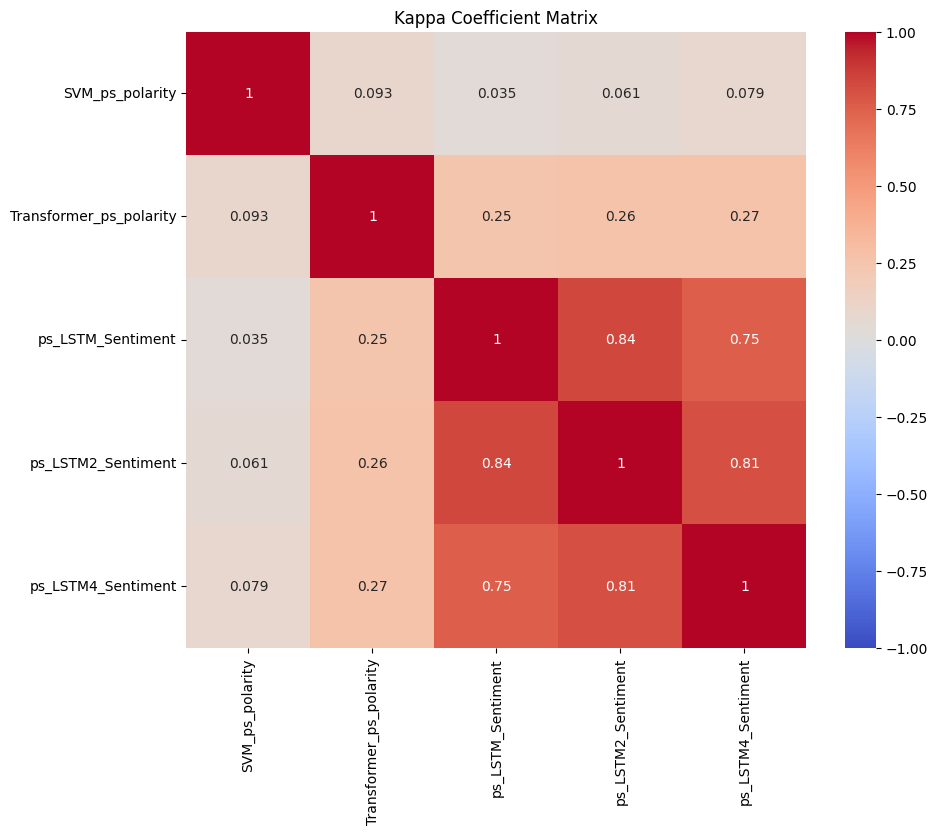

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(kappa_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Kappa Coefficient Matrix')
plt.show()


In [ ]:
from sklearn.metrics import cohen_kappa_score
import numpy as np
import pandas as pd

# Get the prediction results from all models, including the predictions from the Transformer model
predictions = [
    'SVM_ns_polarity',
    'Transformer_ns_polarity',
    'ns_LSTM_Sentiment',
    'ns_LSTM2_Sentiment',
    'ns_LSTM4_Sentiment'
]

# Initialize an empty matrix
kappa_matrix = np.zeros((len(predictions), len(predictions)))

# Calculate the Kappa coefficient between the predictions of each pair of models
for i in range(len(predictions)):
    for j in range(len(predictions)):
        if i != j:
            kappa_matrix[i, j] = cohen_kappa_score(ns_df[predictions[i]], ns_df[predictions[j]])
        else:
            kappa_matrix[i, j] = 1  # Set the diagonal values to 1, indicating complete agreement

# Convert the matrix to a DataFrame for easier viewing
kappa_df = pd.DataFrame(kappa_matrix, index=predictions, columns=predictions)
print(kappa_df)


                         Transformer_ns_polarity  ns_LSTM_Sentiment  \
Transformer_ns_polarity                 1.000000           0.302353   
ns_LSTM_Sentiment                       0.302353           1.000000   
ns_LSTM2_Sentiment                      0.302353           0.877668   
ns_LSTM4_Sentiment                      0.346413           0.809541   

                         ns_LSTM2_Sentiment  ns_LSTM4_Sentiment  
Transformer_ns_polarity            0.302353            0.346413  
ns_LSTM_Sentiment                  0.877668            0.809541  
ns_LSTM2_Sentiment                 1.000000            0.854513  
ns_LSTM4_Sentiment                 0.854513            1.000000  


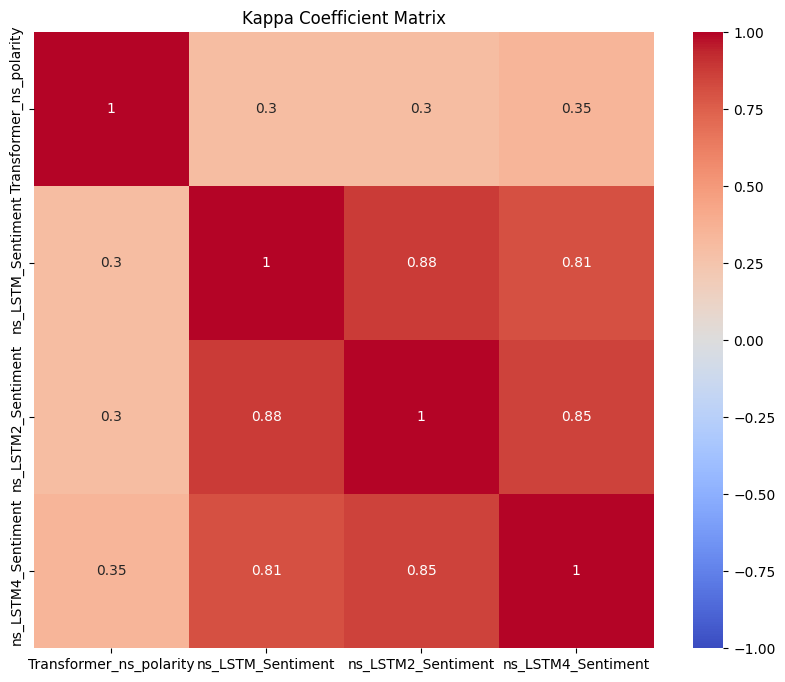

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(kappa_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Kappa Coefficient Matrix')
plt.show()


In [ ]:
#df_ps_cleaned.reset_index(drop=True, inplace=True)
df_ns_cleaned.reset_index(drop=True, inplace=True)
#ps = pd.concat([df_ps_cleaned, ps_df], axis=1)
ns = pd.concat([df_ns_cleaned, ns_df], axis=1)

In [ ]:
ps

,body,createdAt,url,SVM_ps_polarity,Transformer_ps_polarity,ps_LSTM_Sentiment,ps_LSTM2_Sentiment,ps_LSTM4_Sentiment
0,so i had this epiphany the other day playing b...,2022-12-30T05:48:41.000Z,https://www.reddit.com/r/PS5/comments/zysi03/t...,Neutral,Neutral,Neutral,Neutral,Neutral
1,i agree with you in principle but i think your...,2022-12-30T11:55:25.000Z,https://www.reddit.com/r/PS5/comments/zysi03/t...,Neutral,Positive,Neutral,Neutral,Neutral
2,and do not forget an actual ui for doing stuff...,2022-12-30T13:36:21.000Z,https://www.reddit.com/r/PS5/comments/zysi03/t...,Neutral,Neutral,Neutral,Neutral,Neutral
3,was big into torrenting movies back then being...,2022-12-30T13:52:23.000Z,https://www.reddit.com/r/PS5/comments/zysi03/t...,Neutral,Positive,Neutral,Neutral,Neutral
4,same here,2022-12-30T13:56:50.000Z,https://www.reddit.com/r/PS5/comments/zysi03/t...,Neutral,Neutral,Neutral,Neutral,Neutral
...,...,...,...,...,...,...,...,...
191,your pc cannot play a game browse the web and ...,2022-12-30T14:10:53.000Z,https://www.reddit.com/r/PS5/comments/zysi03/t...,Neutral,Negative,Neutral,Neutral,Neutral
192,you need to upgrade your pc,2022-12-30T06:58:59.000Z,https://www.reddit.com/r/PS5/comments/zysi03/t...,Neutral,Neutral,Negative,Neutral,Neutral
193,i do not know all that feel next gen about the...,2022-12-30T07:54:46.000Z,https://www.reddit.com/r/PS5/comments/zysi03/t...,Neutral,Neutral,Neutral,Neutral,Neutral
194,i have to admit that i enjoy the gap between p...,2022-12-30T11:52:02.000Z,https://www.reddit.com/r/PS5/comments/zysi03/t...,Positive,Positive,Positive,Positive,Positive


In [ ]:
#ps.to_csv('ps_prediction.csv', index=False)
ns.to_csv('ns_prediction.csv', index=False)

need further analysis for optimisation

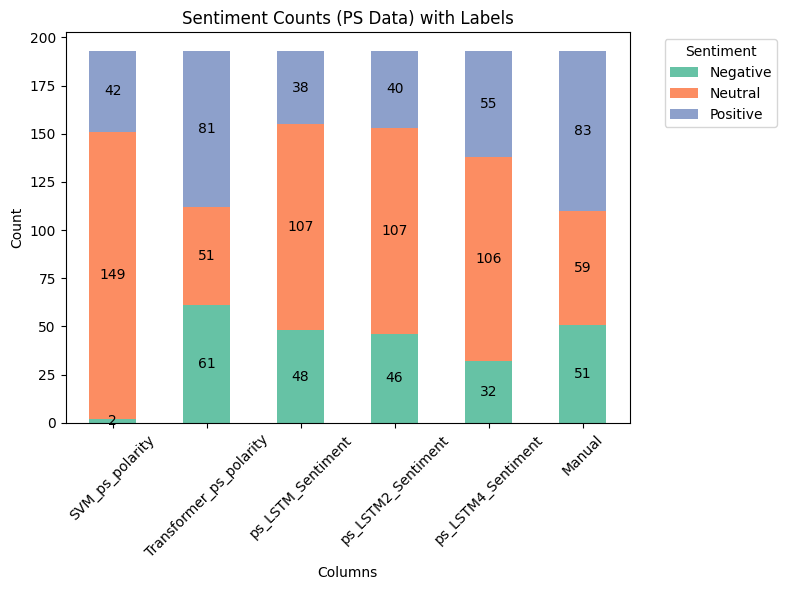

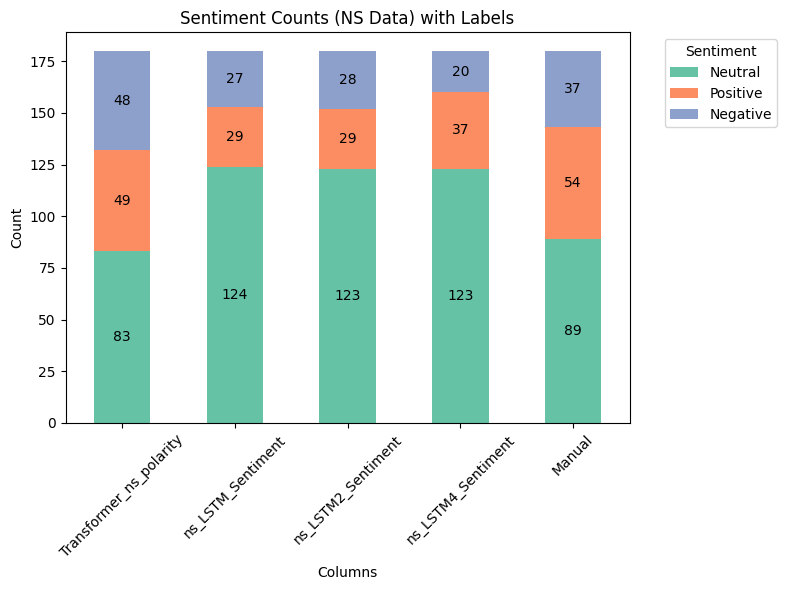

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


ps_data = pd.read_csv('/content/ps_prediction(1).csv')
ns_data = pd.read_csv('/content/ns_prediction (3).csv',encoding='ISO-8859-1')

ps_last_5_columns = ps_data.iloc[:, -6:]
ns_last_5_columns = ns_data.iloc[:, -5:]

def count_sentiments(data):
    return data.apply(lambda x: x.value_counts()).T.fillna(0)

ps_sentiment_counts = count_sentiments(ps_last_5_columns)
ns_sentiment_counts = count_sentiments(ns_last_5_columns)

import matplotlib.pyplot as plt

def plot_sentiment_counts_with_labels(sentiment_counts, title):
    colors = sns.color_palette("Set2")
    ax = sentiment_counts.plot(kind='bar', stacked=True, color=colors, figsize=(8, 6))

    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        if height > 0:
            x, y = p.get_xy()
            ax.text(x + width/2,
                    y + height/2,
                    f'{int(height)}',
                    ha='center',
                    va='center')

    plt.title(title)
    plt.ylabel('Count')
    plt.xlabel('Columns')
    plt.xticks(rotation=45)
    plt.legend(title="Sentiment", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


plot_sentiment_counts_with_labels(ps_sentiment_counts, 'Sentiment Counts (PS Data) with Labels')
plot_sentiment_counts_with_labels(ns_sentiment_counts, 'Sentiment Counts (NS Data) with Labels')



                         SVM_ps_polarity  Transformer_ps_polarity  \
SVM_ps_polarity                 1.000000                 0.091365   
Transformer_ps_polarity         0.091365                 1.000000   
ps_LSTM_Sentiment               0.035689                 0.236562   
ps_LSTM2_Sentiment              0.061380                 0.250369   
ps_LSTM4_Sentiment              0.079556                 0.256408   
Manual                          0.092039                 0.572974   

                         ps_LSTM_Sentiment  ps_LSTM2_Sentiment  \
SVM_ps_polarity                   0.035689            0.061380   
Transformer_ps_polarity           0.236562            0.250369   
ps_LSTM_Sentiment                 1.000000            0.833862   
ps_LSTM2_Sentiment                0.833862            1.000000   
ps_LSTM4_Sentiment                0.748799            0.809040   
Manual                            0.192469            0.228611   

                         ps_LSTM4_Sentiment    Manual

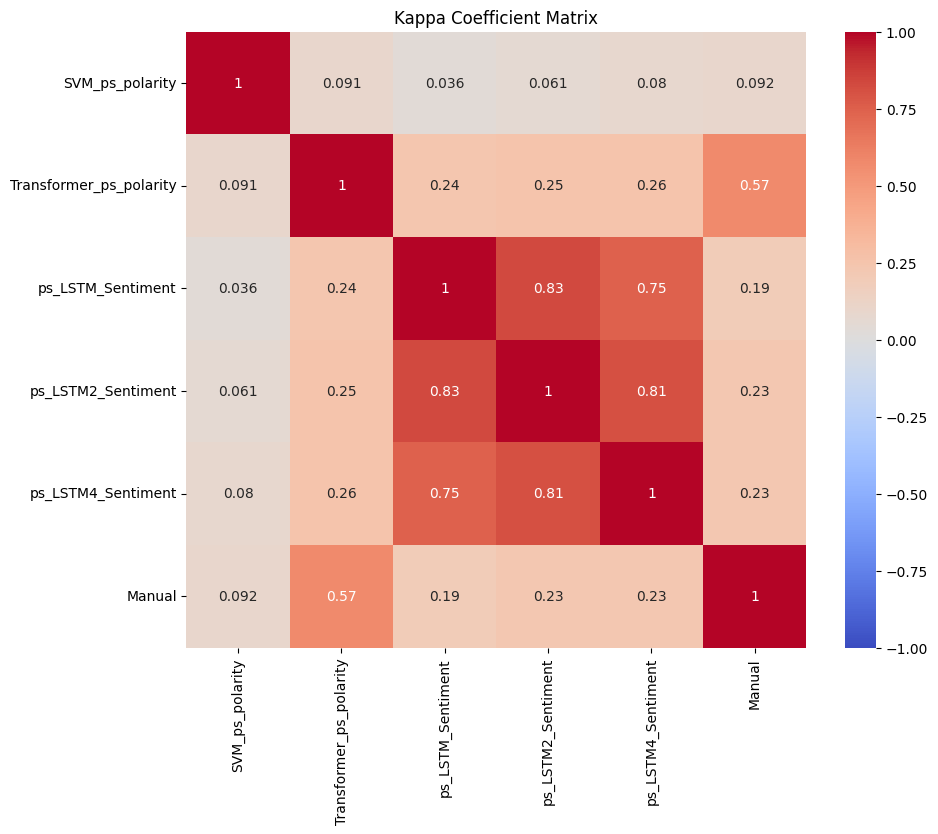

In [ ]:
from sklearn.metrics import cohen_kappa_score
import numpy as np
import pandas as pd

# Get the prediction results from all models, including the Transformer model and the manual annotations
predictions = [
    'SVM_ps_polarity',
    'Transformer_ps_polarity',
    'ps_LSTM_Sentiment',
    'ps_LSTM2_Sentiment',
    'ps_LSTM4_Sentiment',
    'Manual'
]

# Initialize an empty matrix
kappa_matrix = np.zeros((len(predictions), len(predictions)))

# Calculate the Kappa coefficient between the predictions of each pair of models
for i in range(len(predictions)):
    for j in range(len(predictions)):
        if i != j:
            kappa_matrix[i, j] = cohen_kappa_score(ps_data[predictions[i]], ps_data[predictions[j]])
        else:
            kappa_matrix[i, j] = 1  # Set the diagonal values to 1, indicating complete agreement

# Convert the matrix to a DataFrame for easier viewing
kappa_df = pd.DataFrame(kappa_matrix, index=predictions, columns=predictions)
print(kappa_df)

import seaborn as sns
import matplotlib.pyplot as plt

# Plot the Kappa coefficient matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(kappa_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Kappa Coefficient Matrix')
plt.show()


                         Transformer_ns_polarity  ns_LSTM_Sentiment  \
Transformer_ns_polarity                 1.000000           0.313083   
ns_LSTM_Sentiment                       0.313083           1.000000   
ns_LSTM2_Sentiment                      0.305055           0.884252   
ns_LSTM4_Sentiment                      0.341848           0.826199   
Manual                                  0.659074           0.310602   

                         ns_LSTM2_Sentiment  ns_LSTM4_Sentiment    Manual  
Transformer_ns_polarity            0.305055            0.341848  0.659074  
ns_LSTM_Sentiment                  0.884252            0.826199  0.310602  
ns_LSTM2_Sentiment                 1.000000            0.861875  0.312503  
ns_LSTM4_Sentiment                 0.861875            1.000000  0.345979  
Manual                             0.312503            0.345979  1.000000  


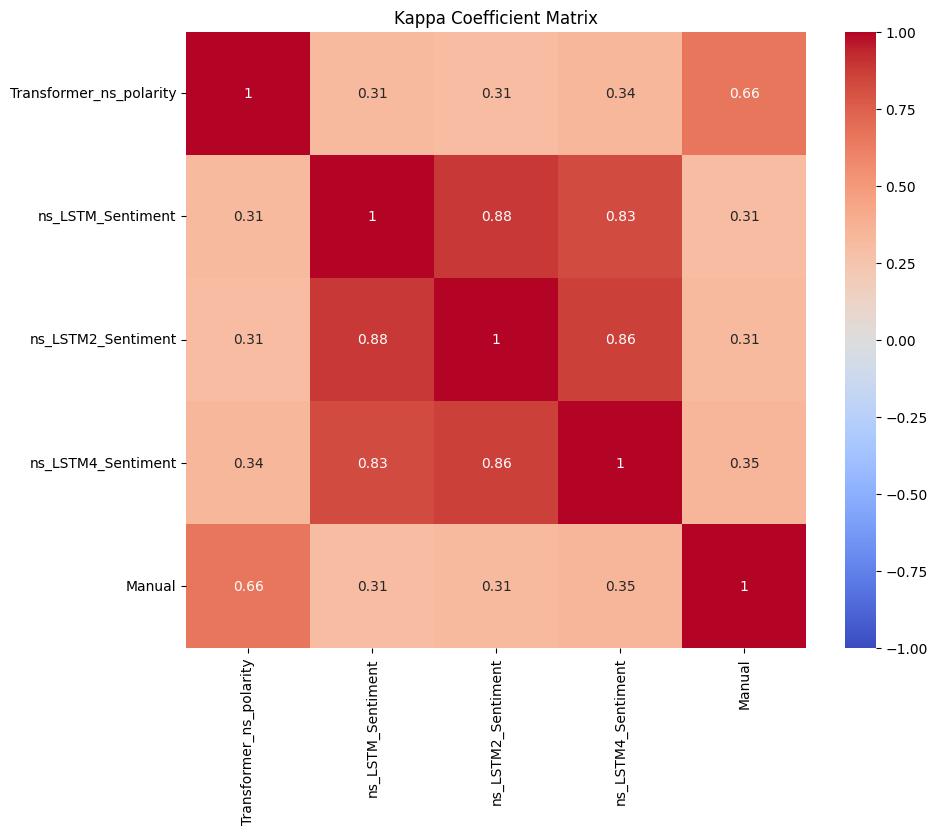

In [ ]:
from sklearn.metrics import cohen_kappa_score
import numpy as np
import pandas as pd

# Get the prediction results from all models, including the Transformer model and the manual annotations
predictions = [
    'Transformer_ns_polarity',
    'ns_LSTM_Sentiment',
    'ns_LSTM2_Sentiment',
    'ns_LSTM4_Sentiment',
    'Manual'
]

# Initialize an empty matrix
kappa_matrix = np.zeros((len(predictions), len(predictions)))

# Calculate the Kappa coefficient between the predictions of each pair of models
for i in range(len(predictions)):
    for j in range(len(predictions)):
        if i != j:
            kappa_matrix[i, j] = cohen_kappa_score(ns_data[predictions[i]], ns_data[predictions[j]])
        else:
            kappa_matrix[i, j] = 1  # Set the diagonal values to 1, indicating complete agreement

# Convert the matrix to a DataFrame for easier viewing
kappa_df = pd.DataFrame(kappa_matrix, index=predictions, columns=predictions)
print(kappa_df)

import seaborn as sns
import matplotlib.pyplot as plt

# Plot the Kappa coefficient matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(kappa_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Kappa Coefficient Matrix')
plt.show()
